<a href="https://colab.research.google.com/github/hameeza/Analyzing-compiler-toolchain/blob/main/RISC_V_compiler_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This notebook guides you through step by step tutorial of processing Python scripts for analyzing RISC-V compiler toolchain using topic modeling.**

## **🛠 Prerequisites**
Before running this notebook, you will require or make sure following python libraries are installed:
  
---
- Pandas
- Numpy
-  Matplotlib
-  Seaborn
-  Gensim
-  Wordcloud
-  ScikitLearn
-  Top2vec
-  Tomotopy
-  Whoosh
-  OCTIS


The results of topic modelling and its evaluation metrics can be different from this tutorial if code is executed on GPU.

Let's get started! 🎯


## ** ⌛ Step 1: Load the Data and visualize the datasets**


*   To load data → import google drive, upload the data and mount the google drive.
* Import Required Libraries
* Load Data from Google Drive
* Set visualization preferences
* Explore the Data

In [8]:
from google.colab import drive
import pandas as pd
import json
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive') # This will prompt you to click a link and authorize access

import json
import pandas as pd
import seaborn as sns

file_path1 = '/content/drive/MyDrive/kirat/commits_data_combinedlatest.json'
with open(file_path1, 'r',encoding='utf-8') as f1:
    data1 = json.load(f1)
    df = pd.DataFrame(data1)


file_path2 = '/content/drive/MyDrive/kirat/gccmoredata.json'
with open(file_path2, 'r',encoding='utf-8') as f2:
    data2 = json.load(f2)
    df1 = pd.DataFrame(data2)


sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.max_colwidth', 100)  # Set column width


print("First dataset:")
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First dataset:


commit_id                                                                                       commit_message        author_name     committer_name         committer_email     author_date_time  committer_date_time    branch            repo_name  merge                                                                                           patch_info
0  a504f73f40d556aaa9a55b3d4377abba0176c2b5  Merge pull request #1475 from CARV-ICS-FORTH/uclibc\n\n Add uClibc-ng support for NOMMU Linux bu...         Kito Cheng             GitHub      noreply@github.com  2024-08-27 14:49:50  2024-08-27 14:49:50  [master]  riscv-gnu-toolchain   True                                                                                                   []
1  dada8f1b7222d3213749ea6e91f473d8bea886bc  Bump qemu from 9.0.1 to 9.0.2\n\nTest results (with --enable-multilib):\n```\n               ===...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:15:20  2024-08-27 08:44:04  [master]  riscv-gnu-toolchain  False  [{'file_name': 'qemu', 'change_type': 'MODIFY', 'patch': '@@ -1 +1 @@
-Subproject commit 60b4f3a...
2  f656fc5a7219a5245d1791c2d20d1e07d30177bd  Bump glibc from 2.39 to 2.40\n\nTest results (with --enable-multilib):\n```\n               ====...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:10:56  2024-08-27 08:43:51  [master]  riscv-gnu-toolchain  False  [{'file_name': 'glibc', 'change_type': 'MODIFY', 'patch': '@@ -1 +1 @@
-Subproject commit ef321e...
3  2838c1c7cf556697deb9c9588844044a3f73ccab  Bump binutils from 2.43 to 2.43.1\n\nTest results (with --enable-multilib):\n```\n              ...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:08:58  2024-08-27 08:43:41  [master]  riscv-gnu-toolchain  False  [{'file_name': '.gitmodules', 'change_type': 'MODIFY', 'patch': '@@ -1,7 +1,7 @@
 [submodule "bi...
4  211df88ef07e4d43c3e362246d781a37ab6cbbf6                                                                  Bump gdb into 15.1 release version.             Jiawei  Christoph Müllner  christophm30@gmail.com  2024-08-23 00:06:36  2024-08-26 16:10:13  [master]  riscv-gnu-toolchain  False  [{'file_name': '.gitmodules', 'change_type': 'MODIFY', 'patch': '@@ -20,7 +20,7 @@
 [submodule "...

In [9]:
print("\nSecond dataset:")
df1.head(10)


Second dataset:


subject        date               author                                                                                           patch_text
0                 [COMMITTED] Re: Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases  2024-07-31            Xiao Zeng  2024-08-01 09:53  Jeff Law <jeffreya...@gmail.com> wrote:\n>\n>\n>\n>On 7/30/24 7:05 PM, Xiao Ze...
1                                 Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases  2024-07-31             Jeff Law  On 7/30/24 7:05 PM, Xiao Zeng wrote:\n\n2024-07-31 03:10  Jeff Law <jeffreya...@gmail.com> wrote...
2                 Re: [PATCH] RISC-V: Correct mode_idx attribute for viwalu wx variants [PR116149].  2024-07-31             Jeff Law  On 7/31/24 9:55 AM, Robin Dapp wrote:\n\nHi,\n\nin PR116149 we choose a wrong vector length whic...
3                     [PATCH] RISC-V: Correct mode_idx attribute for viwalu wx variants [PR116149].  2024-07-31           Robin Dapp  Hi,\n\nin PR116149 we choose a wrong vector length which causes wrong values in\na reduction.  T...
4  RE: Support streaming of poly_int for offloading when it's degree <= accel's NUM_POLY_INT_COEFFS  2024-07-31  Prathamesh Kulkarni  > -----Original Message-----\n> From: Tobias Burnus <tbur...@baylibre.com>\n> Sent: Tuesday, Jul...
5  RE: Support streaming of poly_int for offloading when it's degree <= accel's NUM_POLY_INT_COEFFS  2024-07-31  Prathamesh Kulkarni  > -----Original Message-----\n> From: Prathamesh Kulkarni <prathame...@nvidia.com>\n> Sent: Tues...
6                         Re: [PATCH] RISC-V: Expand subreg move via slide if necessary [PR116086].  2024-07-31           Robin Dapp  > > Like aarch64 we set REGMODE_NATURAL_SIZE for fixed-size modes to\n> > UNITS_PER_WORD.  Isn't...
7                                               Re: [RFC] RISC-V: Add support for Profiles RVA/B23.  2024-07-30               Jiawei  在 2024/7/31 4:48, Jeff Law 写道:\n\n\n\nOn 7/28/24 9:24 PM, Jiawei wrote:\n\nThis patch adds suppo...
8                           RE: [PATCH v1] RISC-V: Implement the quad and oct .SAT_TRUNC for scalar  2024-07-30             Li, Pan2  Kindly ping.\n\nPan\n\n-----Original Message-----\nFrom: Li, Pan2 <pan2...@intel.com> \nSent: Tu...
9                             Re: Re: [PATCH] RISC-V: NFC: Do not use zicond for pr105314 testcases  2024-07-30            Xiao Zeng  2024-07-31 03:10  Jeff Law <jeffreya...@gmail.com> wrote:\n>\n>\n>\n>On 7/28/24 7:58 PM, Xiao Ze...

# **Step 2: 📊 Data Exploration & Preprocessing**

# **Step 2.1: Extracting Patch Information**

This code section extracts details such as:

*  File Name (file_name)
*   Change Type (change_type)
*   Patch Content (patch)



In [10]:
# Define a function to extract file_name, change_type, and patch from patch_info
def extract_patch_info(patch_info):
    # Check if patch_info is not empty
    if patch_info:
        # Extract file_name, change_type, and patch
        file_name = patch_info[0]['file_name']
        change_type = patch_info[0]['change_type']
        patch = patch_info[0]['patch']
        return file_name, change_type, patch
    else:
        return None, None, None

# Apply the function to extract file_name, change_type, and patch
df['file_name'], df['change_type'], df['patch'] = zip(*df['patch_info'].apply(extract_patch_info))

# Drop the original patch_info column
df = df.drop(columns=['patch_info'])

**Step 2.2: Handling Lists in Columns**

Some columns contain lists, which are simplified

In [11]:
df['branch'] = df['branch'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
df.applymap(lambda x: isinstance(x, list)).any().any()
df.head(5)

/tmp/ipython-input-27843477.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, list)).any().any()


commit_id                                                                                       commit_message        author_name     committer_name         committer_email     author_date_time  committer_date_time  branch            repo_name  merge    file_name change_type                                                                                                patch
0  a504f73f40d556aaa9a55b3d4377abba0176c2b5  Merge pull request #1475 from CARV-ICS-FORTH/uclibc\n\n Add uClibc-ng support for NOMMU Linux bu...         Kito Cheng             GitHub      noreply@github.com  2024-08-27 14:49:50  2024-08-27 14:49:50  master  riscv-gnu-toolchain   True         None        None                                                                                                 None
1  dada8f1b7222d3213749ea6e91f473d8bea886bc  Bump qemu from 9.0.1 to 9.0.2\n\nTest results (with --enable-multilib):\n```\n               ===...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:15:20  2024-08-27 08:44:04  master  riscv-gnu-toolchain  False         qemu      MODIFY  @@ -1 +1 @@\n-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f\n+Subproject commit 5eb...
2  f656fc5a7219a5245d1791c2d20d1e07d30177bd  Bump glibc from 2.39 to 2.40\n\nTest results (with --enable-multilib):\n```\n               ====...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:10:56  2024-08-27 08:43:51  master  riscv-gnu-toolchain  False        glibc      MODIFY  @@ -1 +1 @@\n-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f\n+Subproject commit 3d1...
3  2838c1c7cf556697deb9c9588844044a3f73ccab  Bump binutils from 2.43 to 2.43.1\n\nTest results (with --enable-multilib):\n```\n              ...  Christoph Müllner  Christoph Müllner  christophm30@gmail.com  2024-08-26 13:08:58  2024-08-27 08:43:41  master  riscv-gnu-toolchain  False  .gitmodules      MODIFY  @@ -1,7 +1,7 @@\n [submodule "binutils"]\n \tpath = binutils\n \turl = https://sourceware.org/gi...
4  211df88ef07e4d43c3e362246d781a37ab6cbbf6                                                                  Bump gdb into 15.1 release version.             Jiawei  Christoph Müllner  christophm30@gmail.com  2024-08-23 00:06:36  2024-08-26 16:10:13  master  riscv-gnu-toolchain  False  .gitmodules      MODIFY  @@ -20,7 +20,7 @@\n [submodule "gdb"]\n \tpath = gdb\n \turl = https://sourceware.org/git/binuti...

**Step 2.3: Convert Date Columns**

This section of code converts timestamps to a proper datetime format

In [12]:
df['author_date_time'] = pd.to_datetime(df['author_date_time'])
df['committer_date_time'] = pd.to_datetime(df['committer_date_time'])

In [13]:
duplicates_countm = df.duplicated(subset='commit_message').sum()

print(f"Number of duplicates based on commit_message: {duplicates_countm}")

Number of duplicates based on commit_message: 8983


In [14]:
duplicates_countp = df.duplicated(subset='patch').sum()

print(f"Number of duplicates based on patch: {duplicates_countp}")

Number of duplicates based on patch: 9286


In [15]:
print(df['commit_id'].nunique())
print(df['commit_message'].nunique())
print(df['patch'].nunique())

1287
1256
952


In [16]:
df1.nunique()

subject       7428
date          1328
author         331
patch_text    9938
dtype: int64

# **Step 3: Data Analysis & Visualization**

This section analyzes trends in commit activity, top contributors, and change types over time.


1.  **Step 3.1 Group Commits by Year**
2.  **Step 3.2 Visualize Commit Trends**


The section calculates and plots:

* The data by year is grouped for further analysis
* The total number of commits per year
* The number of unique committers and authors per year

/tmp/ipython-input-736025064.py:80: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


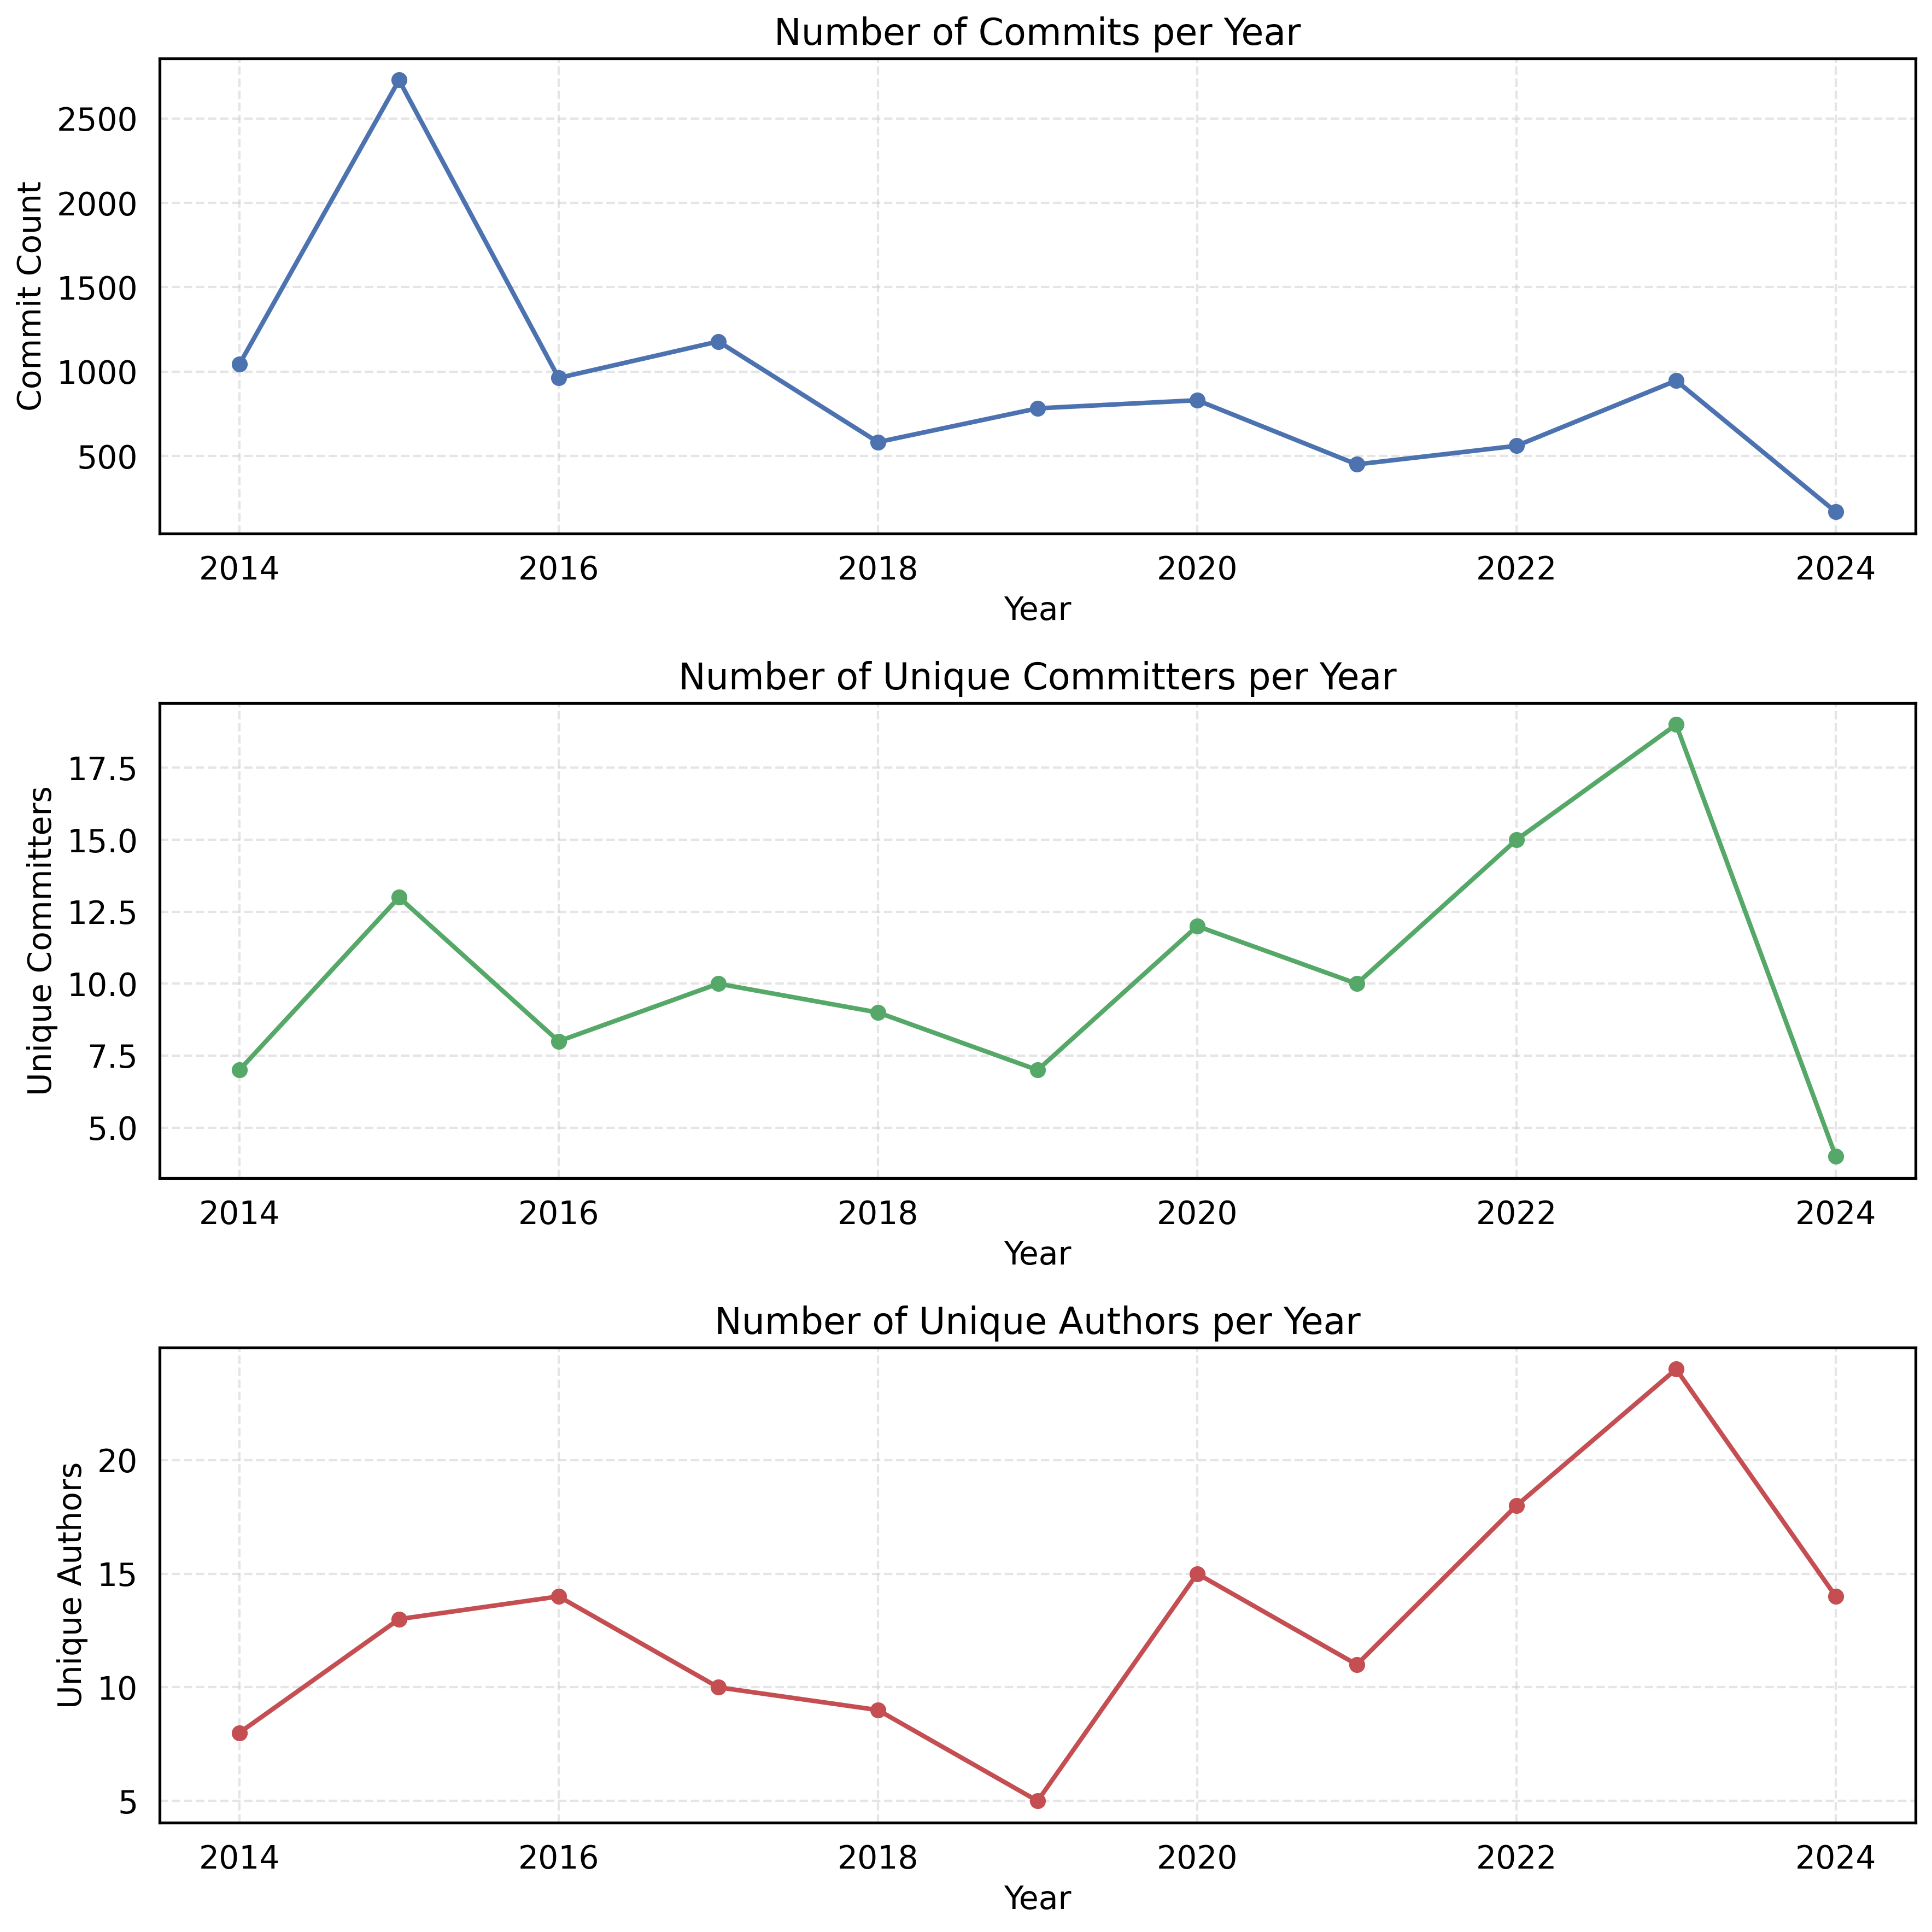

In [32]:
# df['year'] = df['committer_date_time'].dt.year
# grouped_by_year = df.groupby('year')
# commit_counts_per_year = grouped_by_year.size().reset_index(name='commit_count')
# print(commit_counts_per_year)
# unique_committers_per_year = grouped_by_year['committer_name'].nunique().reset_index(name='unique_committers')
# unique_authors_per_year = grouped_by_year['author_name'].nunique().reset_index(name='unique_authors')

# plt.figure(figsize=(12, 8))


# plt.subplot(3, 1, 1)
# plt.plot(commit_counts_per_year['year'], commit_counts_per_year['commit_count'], marker='o', color='b')
# plt.title('Number of Commits per Year')
# plt.xlabel('Year')
# plt.ylabel('Commit Count')
# plt.grid(True)


# plt.subplot(3, 1, 2)
# plt.plot(unique_committers_per_year['year'], unique_committers_per_year['unique_committers'], marker='o', color='g')
# plt.title('Number of Unique Committers per Year')
# plt.xlabel('Year')
# plt.ylabel('Unique Committers')
# plt.grid(True)
# plt.subplot(3, 1, 3)
# plt.plot(unique_authors_per_year['year'], unique_authors_per_year['unique_authors'], marker='o', color='r')
# plt.title('Number of Unique Authors per Year')
# plt.xlabel('Year')
# plt.ylabel('Unique Authors')
# plt.grid(True)

# plt.tight_layout()


# plt.show()

import matplotlib.pyplot as plt

# Ensure high-quality vector output and black text
plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 14,
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.color": "black",
    "ytick.color": "black",
})

# Create figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), constrained_layout=True)

# 1️⃣ Commits per year
axes[0].plot(commit_counts_per_year['year'], commit_counts_per_year['commit_count'],
             marker='o', color='b', linewidth=2)
axes[0].set_title('Number of Commits per Year', color='black')
axes[0].set_xlabel('Year', color='black')
axes[0].set_ylabel('Commit Count', color='black')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2️⃣ Unique committers per year
axes[1].plot(unique_committers_per_year['year'], unique_committers_per_year['unique_committers'],
             marker='o', color='g', linewidth=2)
axes[1].set_title('Number of Unique Committers per Year', color='black')
axes[1].set_xlabel('Year', color='black')
axes[1].set_ylabel('Unique Committers', color='black')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3️⃣ Unique authors per year
axes[2].plot(unique_authors_per_year['year'], unique_authors_per_year['unique_authors'],
             marker='o', color='r', linewidth=2)
axes[2].set_title('Number of Unique Authors per Year', color='black')
axes[2].set_xlabel('Year', color='black')
axes[2].set_ylabel('Unique Authors', color='black')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Adjust spacing
plt.tight_layout()

# --- SAVE AS HIGH-QUALITY PDF ---
plt.savefig("committers_authors_per_year.pdf", format="pdf", bbox_inches="tight")

# Optional: display the plot
plt.show()


**Step 3.4 : Identify Top Committers & Authors**

This section extracts the top contributors per year

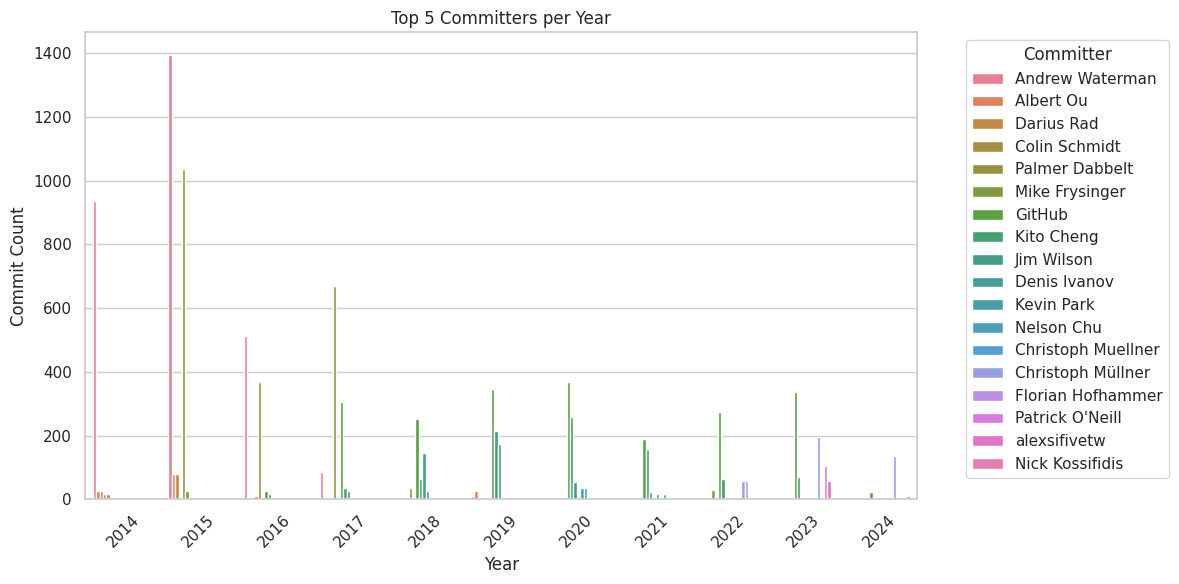

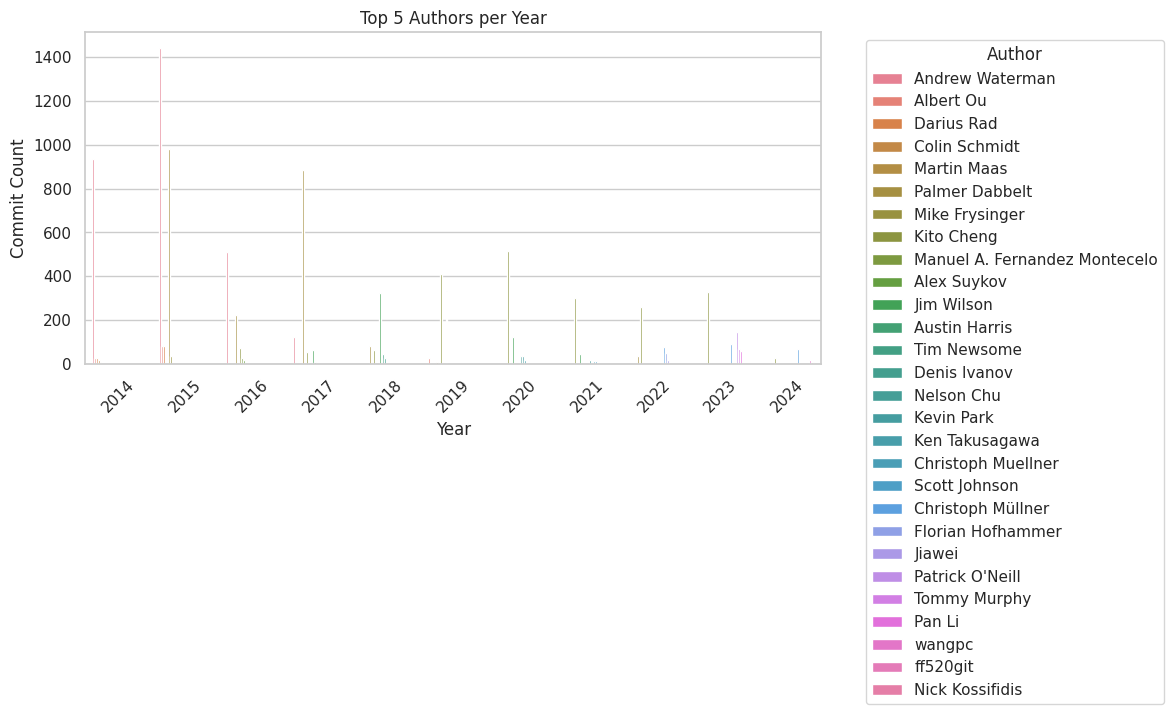

In [18]:
top_committers_per_year = grouped_by_year['committer_name'].value_counts().groupby(level=0).head(5).reset_index(name='commit_count')
top_authors_per_year = grouped_by_year['author_name'].value_counts().groupby(level=0).head(5).reset_index(name='commit_count')
plt.figure(figsize=(12, 6))


sns.barplot(x='year', y='commit_count', hue='committer_name', data=top_committers_per_year, dodge=True)
plt.title('Top 5 Committers per Year')
plt.xlabel('Year')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.legend(title="Committer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='commit_count', hue='author_name', data=top_authors_per_year, dodge=True)
plt.title('Top 5 Authors per Year')
plt.xlabel('Year')
plt.ylabel('Commit Count')
plt.xticks(rotation=45)
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Step 3.5 : Analyze File Changes**

The most modified files and types of code changes are visualized in this section

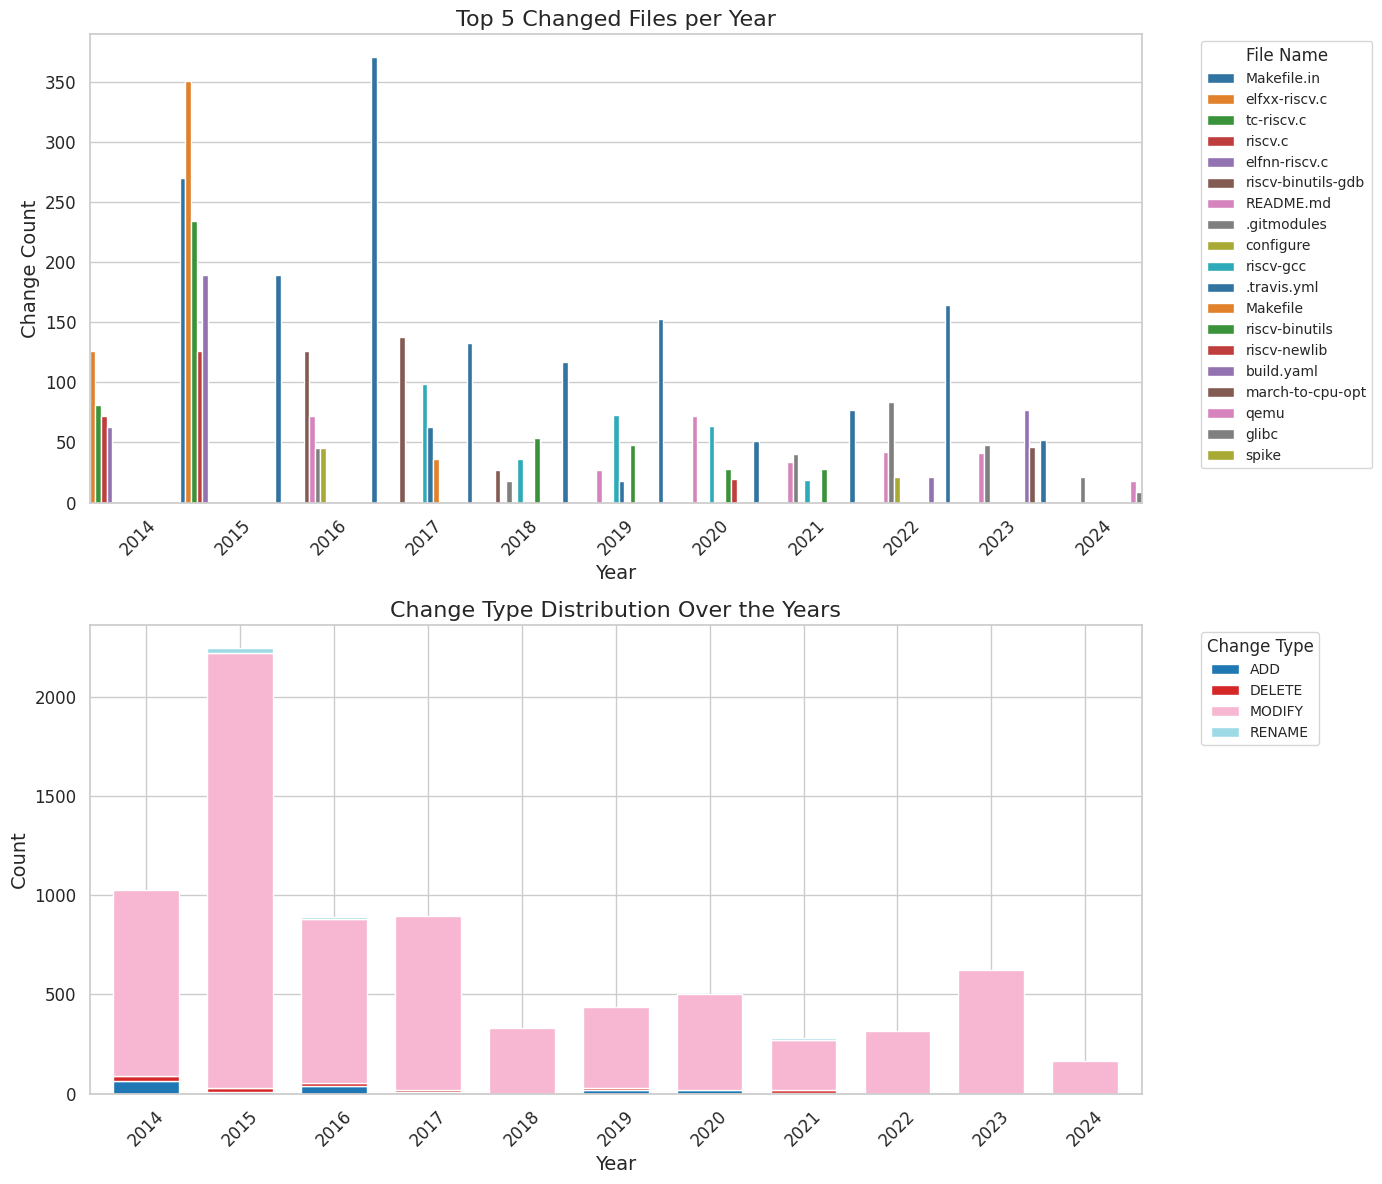

In [19]:
top_files_per_year = grouped_by_year['file_name'].value_counts().groupby(level=0).head(5).reset_index(name='change_count')
change_type_distribution = grouped_by_year['change_type'].value_counts().unstack().fillna(0)


plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 1, figsize=(14, 12))


sns.barplot(x='year', y='change_count', hue='file_name', data=top_files_per_year, dodge=True, ax=axes[0], palette='tab10',width=1.12)


axes[0].set_title('Top 5 Changed Files per Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Change Count', fontsize=14)


axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


axes[0].legend(title="File Name", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


change_type_distribution.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20', width=0.7)


axes[1].set_title('Change Type Distribution Over the Years', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)


axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)


axes[1].legend(title="Change Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()

plt.show()

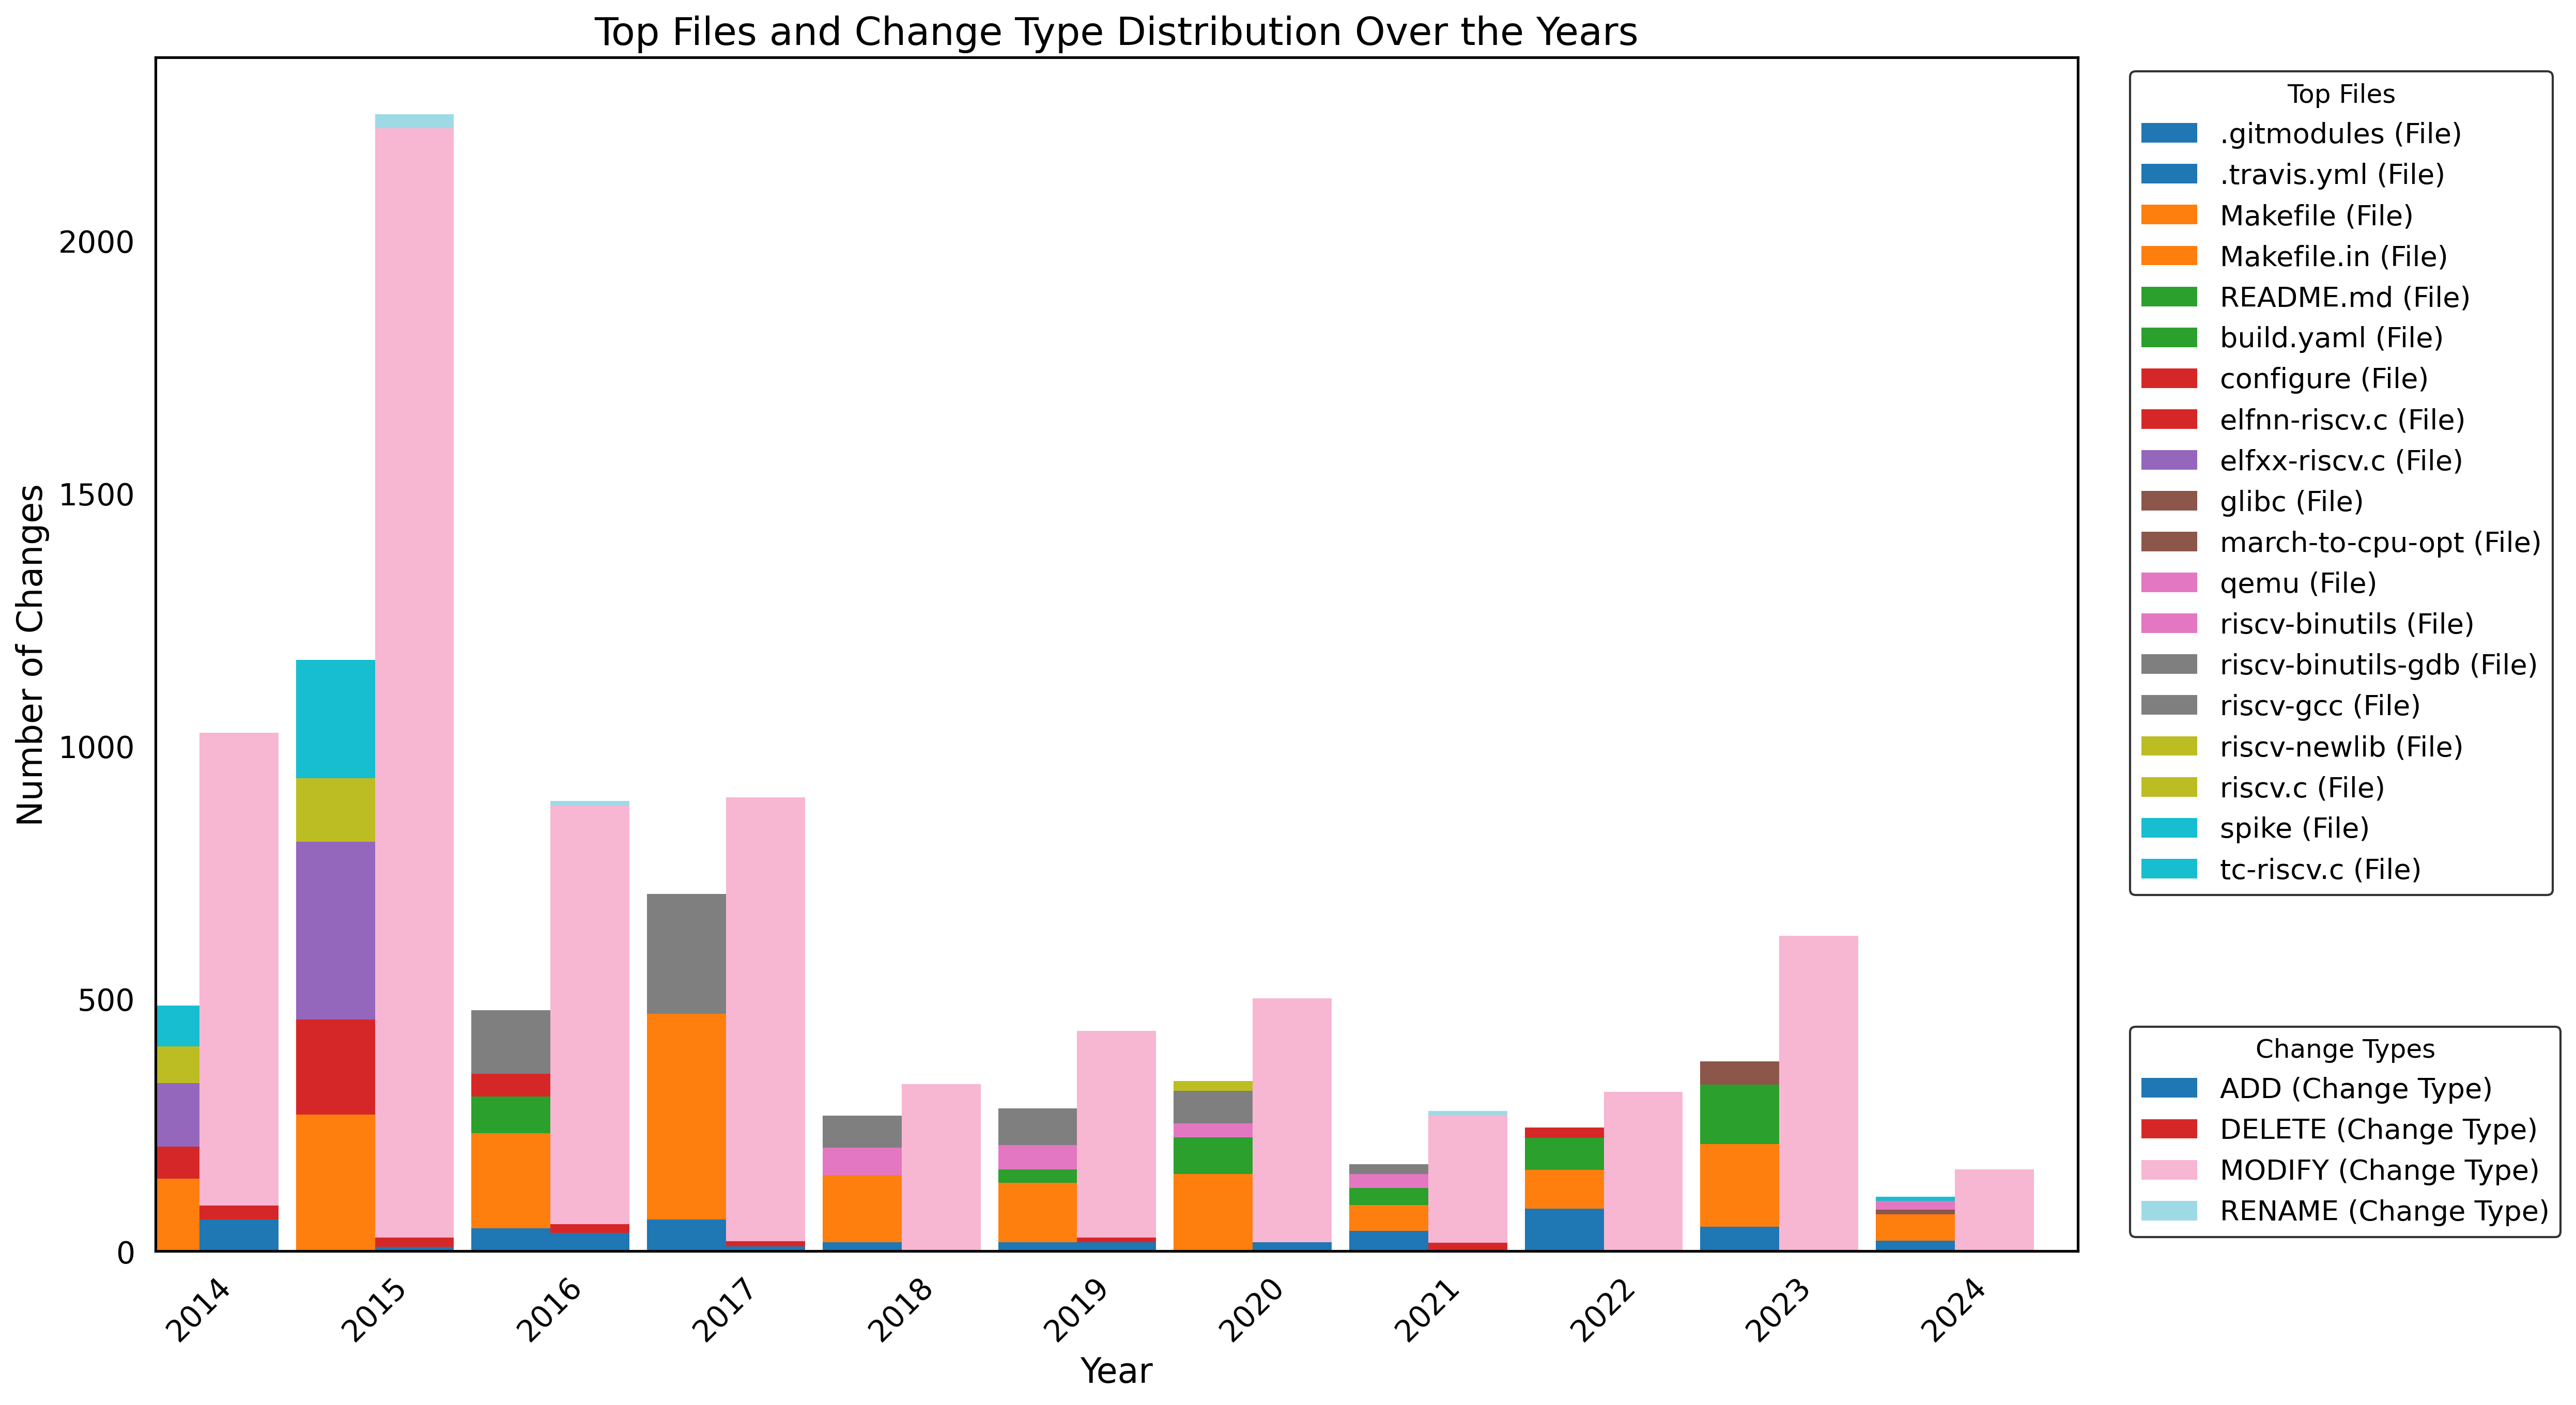

In [31]:


# # Prepare data for top files
# top_files_per_year = grouped_by_year['file_name'].value_counts().groupby(level=0).head(5).reset_index(name='change_count')
# top_files_matrix = top_files_per_year.pivot_table(index='year', columns='file_name', values='change_count', fill_value=0)

# # Prepare data for change type distribution
# change_type_distribution = grouped_by_year['change_type'].value_counts().unstack().fillna(0)
# change_type_matrix = change_type_distribution

# # Combine top files and change types data
# combined_matrix = pd.concat([top_files_matrix, change_type_matrix], axis=1, keys=['Files', 'Change Types'])

# # Set up the plotting area
# fig, ax = plt.subplots(figsize=(14, 10))

# # Plot stacked bar chart for files
# top_files_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', width=0.4, position=1, label='Files')
# # Plot stacked bar chart for change types
# change_type_matrix.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', width=0.4, position=0, label='Change Types')

# # Titles and labels
# ax.set_title('Top Files and Change Type Distribution Over the Years', fontsize=16)
# ax.set_xlabel('Year', fontsize=15)
# ax.set_ylabel('Count', fontsize=15)
# ax.tick_params(axis='x', rotation=45, labelsize=15)
# ax.tick_params(axis='y', labelsize=15)

# # Create custom legends
# file_labels = [f"{col} (File)" for col in top_files_matrix.columns]
# change_type_labels = [f"{col} (Change Type)" for col in change_type_matrix.columns]
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, file_labels + change_type_labels, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# # Adjust layout to avoid overlapping elements
# plt.tight_layout()

# # Display the plot
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Clean white style, force black text
sns.set_style("white")

plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 14,
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black",
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.color": "black",
    "ytick.color": "black",
    "legend.edgecolor": "black"
})

# Prepare data
top_files_per_year = (
    grouped_by_year['file_name']
    .value_counts()
    .groupby(level=0)
    .head(5)
    .reset_index(name='change_count')
)

top_files_matrix = top_files_per_year.pivot_table(
    index='year',
    columns='file_name',
    values='change_count',
    fill_value=0
)

change_type_matrix = (
    grouped_by_year['change_type']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# Plot stacked bars WITHOUT outlines
top_files_matrix.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.45,
    position=1,
    colormap='tab10',
    edgecolor='none',
    linewidth=0
)

change_type_matrix.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.45,
    position=0,
    colormap='tab20',
    edgecolor='none',
    linewidth=0
)

# Titles and labels
ax.set_title(
    "Top Files and Change Type Distribution Over the Years",
    color="black"
)
ax.set_xlabel("Year", color="black")
ax.set_ylabel("Number of Changes", color="black")

# Tick formatting
ax.tick_params(axis='x', rotation=45, labelcolor="black")
ax.tick_params(axis='y', labelcolor="black")

# No grid (clean print look)
ax.grid(False)

# Legends (black text, framed)
file_legend = ax.legend(
    handles=ax.containers[:len(top_files_matrix.columns)],
    labels=[f"{c} (File)" for c in top_files_matrix.columns],
    title="Top Files",
    frameon=True,
    loc="upper left",
    bbox_to_anchor=(1.02, 1)
)

change_type_legend = ax.legend(
    handles=ax.containers[len(top_files_matrix.columns):],
    labels=[f"{c} (Change Type)" for c in change_type_matrix.columns],
    title="Change Types",
    frameon=True,
    loc="lower left",
    bbox_to_anchor=(1.02, 0)
)

ax.add_artist(file_legend)

# Save as high-quality vector PDF
plt.savefig(
    "top_files_change_types.pdf",
    format="pdf",
    bbox_inches="tight"
)

plt.show()




**Step 3.6 :Merge vs. Non-Merge Commits**

The section compares merge commits against normal commits

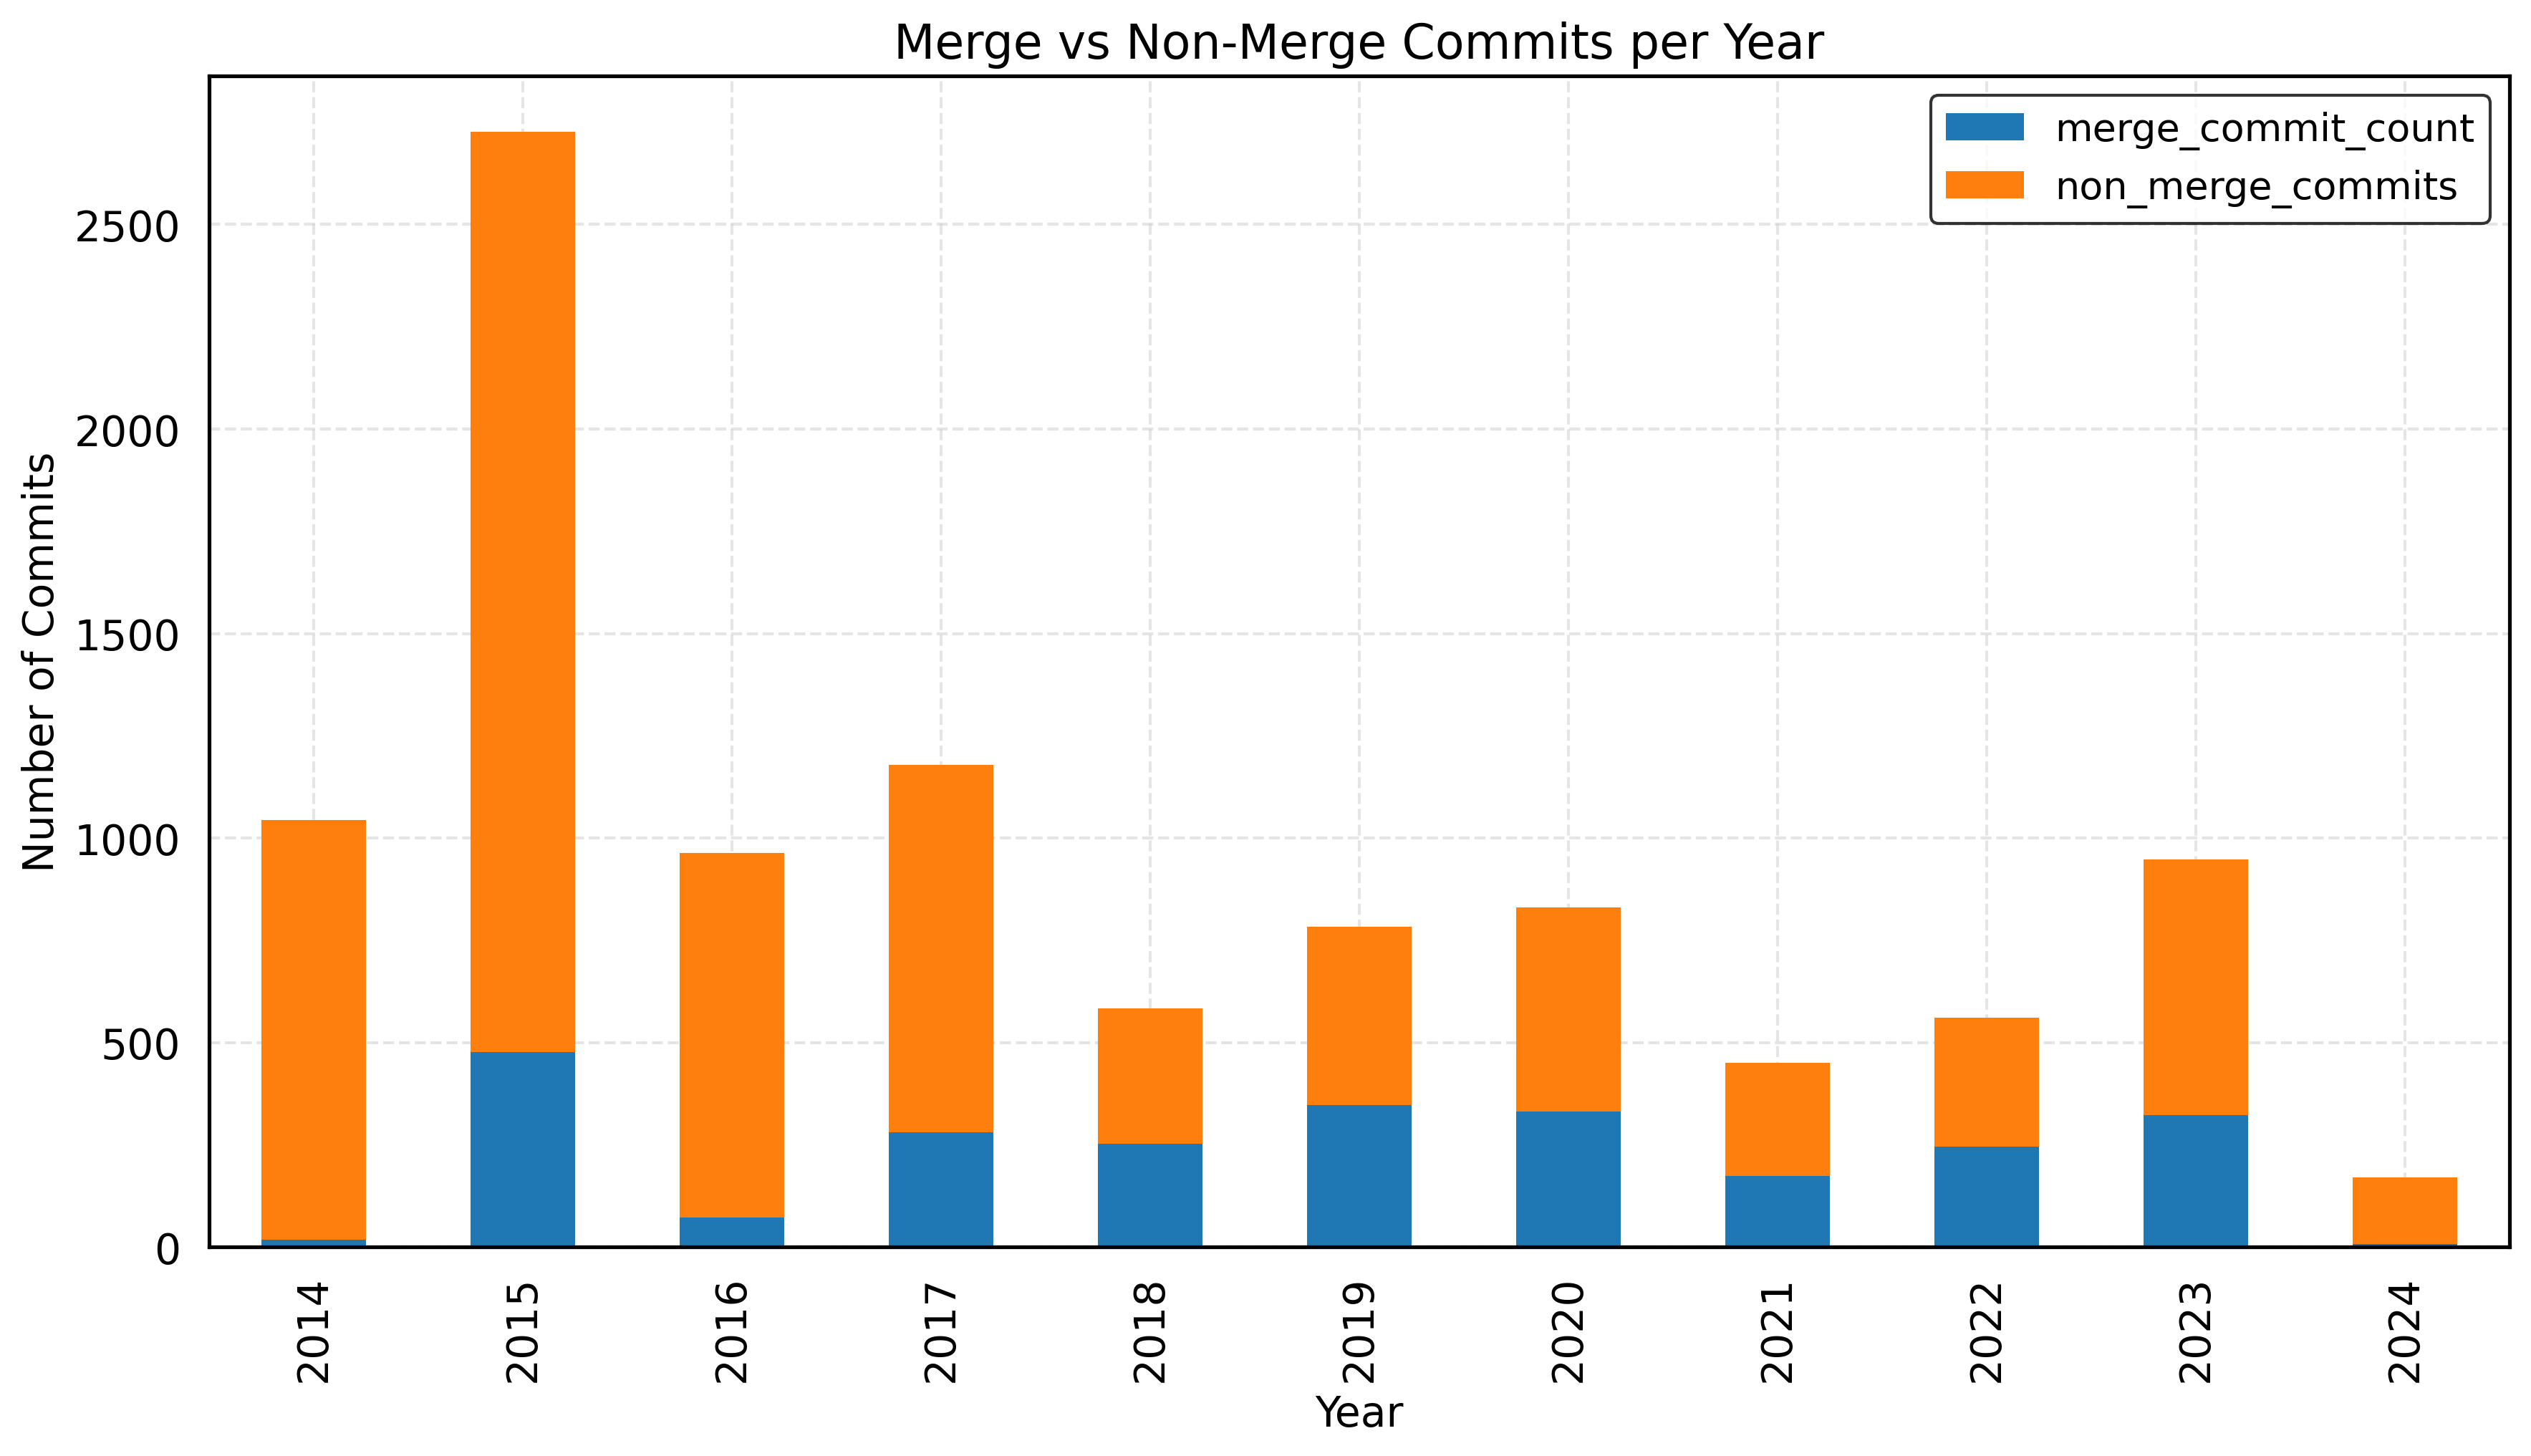

In [33]:
# # Count merge commits per year
# merge_commit_counts = grouped_by_year['merge'].apply(lambda x: (x == True).sum()).reset_index(name='merge_commit_count')


# # Compare the number of merge commits with total commits
# merge_vs_total = pd.merge(commit_counts_per_year, merge_commit_counts, on='year')
# merge_vs_total['non_merge_commits'] = merge_vs_total['commit_count'] - merge_vs_total['merge_commit_count']

# # Plot the comparison
# merge_vs_total.plot(x='year', y=['merge_commit_count', 'non_merge_commits'], kind='bar', figsize=(10, 6), stacked=True)
# plt.title('Merge vs Non-Merge Commits per Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Commits')
# plt.show()

import matplotlib.pyplot as plt

# Update rcParams for publication quality
plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 14,
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.color": "black",
    "ytick.color": "black",
})

# Prepare figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot stacked bars
colors = ['#1f77b4', '#ff7f0e']  # Blue for merge, Orange for non-merge
merge_vs_total.plot(
    x='year',
    y=['merge_commit_count', 'non_merge_commits'],
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='none'
)

# Titles and labels
ax.set_title('Merge vs Non-Merge Commits per Year', color='black')
ax.set_xlabel('Year', color='black')
ax.set_ylabel('Number of Commits', color='black')

# Optional: add grid
ax.grid(True, linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()

# Save as high-quality PDF
plt.savefig("merge_vs_nonmerge_commits_per_year.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()


**Step 3.7: Visualization of Yearly trend of GCC mailing list dataset**

This section visualizes how many mails are submitted in a year in  GCC mail archieve

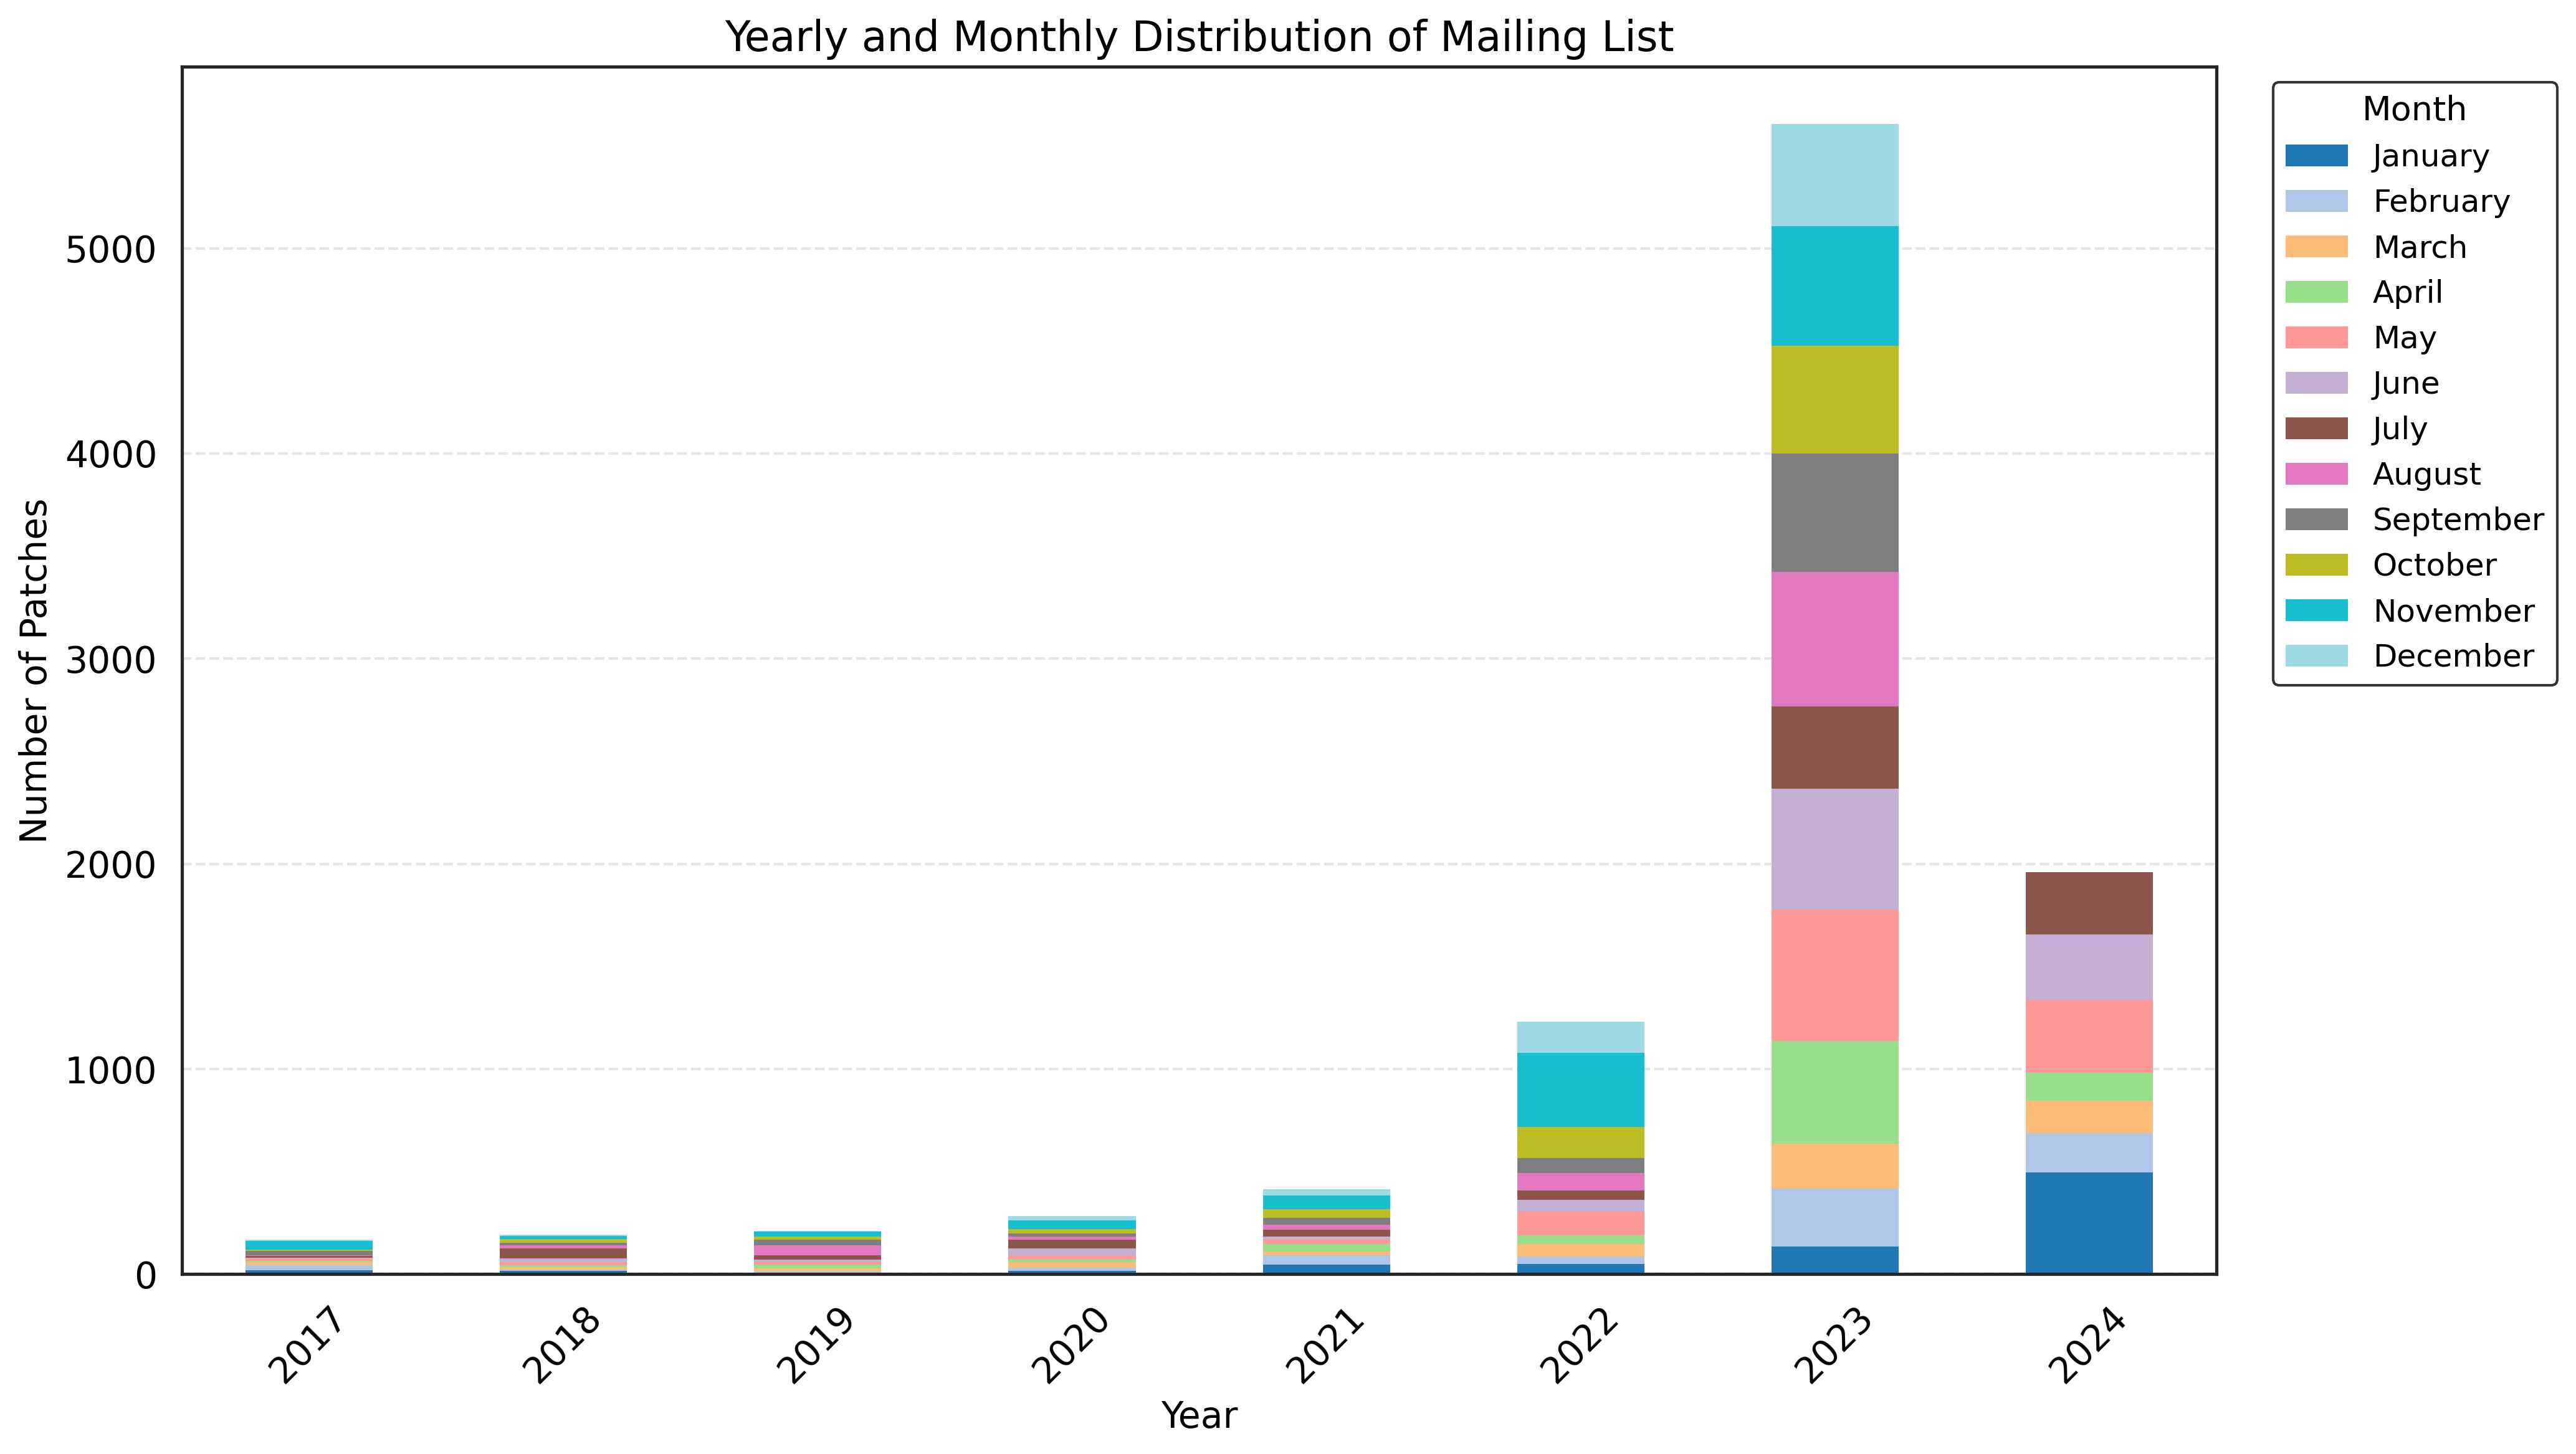

In [39]:

# df1['date'] = pd.to_datetime(df1['date'])

# # Extract year and month from 'date' for grouping
# df1['year'] = df1['date'].dt.year
# df1['month'] = df1['date'].dt.month_name()

# # Aggregate commit counts by year and month
# monthly_counts = df1.groupby(['year', 'month'])['date'].count().unstack(fill_value=0)

# # Plot the data
# fig, ax = plt.subplots(figsize=(12, 7))

# # Create a stacked bar plot
# monthly_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# # Title and labels
# ax.set_title('Yearly and Monthly  Distribution of mailing list', fontsize=16)
# ax.set_xlabel('Year', fontsize=14)
# ax.set_ylabel('Number of Patches', fontsize=14)
# ax.legend(title='Month')
# ax.tick_params(axis='x', rotation=45)

# # Display the plot
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure black text and clean style
sns.set_style("white")
plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 14,
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.color": "black",
    "ytick.color": "black",
    "legend.fontsize": 12,
    "legend.title_fontsize": 13
})

# Ensure months are in calendar order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts = monthly_counts[months_order]

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar plot
monthly_counts.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab20',
    edgecolor='none'
)

# Titles and labels
ax.set_title('Yearly and Monthly Distribution of Mailing List', color='black')
ax.set_xlabel('Year', color='black')
ax.set_ylabel('Number of Patches', color='black')

# Legend
ax.legend(title='Month', frameon=True, bbox_to_anchor=(1.02, 1), loc='upper left')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)

# Add horizontal grid for readability
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)  # optional: no vertical grid

# Tight layout for spacing
plt.tight_layout()

# Save as high-quality PDF
plt.savefig("mailinglist_yearly_monthly_distribution_grid.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()





# **Step:4: Preprocess Github commit patches for further analysis**
The following next three sections:

* Remove Merge Commits
* Count Unique Patches
* Drop Duplicates
* Save unique patches to JSON file for verification
* Print Sample of Unique Patches
* Seperate additions and deletions lines in patch

In [23]:

df_copy = df.copy()
new_df_filtered = df_copy[df_copy['merge'] != True]
new_df_filtered = new_df_filtered.reset_index(drop=True)
new_df_filtered.head(20)
new_df_filtered['patch'].nunique()

952

In [41]:
from pprint import pprint
df_unique_and_first_occurrences = new_df_filtered.drop_duplicates(subset=['patch'], keep='first')
df_patch_modify = df_unique_and_first_occurrences['patch'].unique()
df_patch_modify = pd.DataFrame({'unique_patches': df_patch_modify})
df_patch_modify.to_json('unique_patches.json', orient='records', lines=True)
pprint(df_patch_modify.head(10))
print(len(df_patch_modify))

                                                                                        unique_patches
0  @@ -1 +1 @@\n-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f\n+Subproject commit 5eb...
1  @@ -1 +1 @@\n-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f\n+Subproject commit 3d1...
2  @@ -1,7 +1,7 @@\n [submodule "binutils"]\n \tpath = binutils\n \turl = https://sourceware.org/gi...
3  @@ -20,7 +20,7 @@\n [submodule "gdb"]\n \tpath = gdb\n \turl = https://sourceware.org/git/binuti...
4  @@ -1016,7 +1016,7 @@ stamps/build-llvm-linux: $(LLVM_SRCDIR) $(LLVM_SRC_GIT) $(BINUTILS_SRCDIR)...
5  @@ -335,7 +335,7 @@ endif\n $(srcdir)/%/.git:\n \tcd $(srcdir) && \\n \tflock `git rev-parse --g...
6  @@ -20,6 +20,10 @@ DEJAGNU_SRCDIR := @with_dejagnu_src@\n \n SIM ?= @WITH_SIM@\n \n+# Shared lib...
7  @@ -1 +1 @@\n-Subproject commit c7f28aad0c99d1d2fec4e52ebfa3735d90ceb8e9\n+Subproject commit 57f...
8  @@ -1 +1 @@\n-Subproject commit b2417f51dbbd7435eb3aaf203de24de6754da5

In [42]:
# Separate addition and deletion lines
additions = []
deletions = []

for patch in df_patch_modify['unique_patches']:
    patch_lines = patch.split('\n')
    additions.append([line for line in patch_lines if line.startswith('+') and not line.startswith('+++')])
    deletions.append([line for line in patch_lines if line.startswith('-') and not line.startswith('---')])

# Print the first 10 patches with additions and deletions separated using pprint
for i in range(min(10, len(df_patch_modify))):
    print(f"Patch {i + 1}:")
    print("Additions:")
    pprint(additions[i])
    print("Deletions:")
    pprint(deletions[i])
    print("\n" + "="*80 + "\n")

Patch 1:
Additions:
['+Subproject commit 5ebde3b5c00e15f560f73055fac4ab31c0cac6d2']
Deletions:
['-Subproject commit 60b4f3aff4e39be04f5d73c65a7e8ef838475c9f']


Patch 2:
Additions:
['+Subproject commit 3d1aed874918c466a4477af1da35983ab036690e']
Deletions:
['-Subproject commit ef321e23c20eebc6d6fb4044425c00e6df27b05f']


Patch 3:
Additions:
['+\tbranch = binutils-2_43-branch']
Deletions:
['-\tbranch = binutils-2_42-branch']


Patch 4:
Additions:
['+\tbranch = gdb-15-branch']
Deletions:
['-\tbranch = gdb-14-branch']


Patch 5:
Additions:
['+\t        -DCMAKE_INSTALL_PREFIX=$(SYSROOT) \\',
 '+\t        -DCMAKE_INSTALL_PREFIX=$(SYSROOT) \\']
Deletions:
['-\t        -DCMAKE_INSTALL_PREFIX=$(INSTALL_DIR) \\',
 '-\t        -DCMAKE_INSTALL_PREFIX=$(INSTALL_DIR) \\']


Patch 6:
Additions:
['+\tflock `git rev-parse --git-dir`/config git submodule update --progress '
 '$(dir $@)']
Deletions:
['-\tflock `git rev-parse --git-dir`/config git submodule update $(dir $@)']


Patch 7:
Additions:
['+# Sh

# **Step 6: Install necessary libraries for NLP preprocessing for topic modeling**

In [27]:
pip install wordcloud spacy gensim scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 38.3 MB/s eta 0:00:00


In [44]:
!pip install --upgrade numpy gensim
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.4.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.4.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.4.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1


# **Step 7: Preprocess RISCV GNU Toolchain GitHub commit messages and patches and GCC mailing list subjects and patches for topic modeling**


**Step 7.1: Preprocess RISCV GNU Toolchain GitHub commit messages**

This section of code:

* Cleans commit messages by removing emails, numbers, symbols, and single letters.

* Filters out author names and commit IDs.

* Tokenizes and lemmatizes words.

* Saves the lemmatized words for each commit message.

In [45]:
#for riscv-gnu-toolchain
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Sample DataFrame (replace this with your actual DataFrame)
message_column = df['commit_message'].unique()
authors = df['author_name'].unique()
commit_ids = df['commit_id'].unique()

# Define function for preprocessing text
def preprocess_text(text):
    cleaned_text = re.sub(r'\S+@\S+', '', text)
    cleaned_text = re.sub(r'[-_/]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)
    cleaned_text = re.sub(r'\b[A-Za-z]\b', '', cleaned_text)
    cleaned_text = re.sub(r'\b\d+[A-Za-z]+\b', '', cleaned_text)
    #cleaned_text = re.sub(r'\b\w{1,2}\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Remove author names and commit IDs
    for author in authors:
        author_pattern = re.compile(re.escape(author), re.IGNORECASE)
        cleaned_text = author_pattern.sub('', cleaned_text)


    for commit_id in commit_ids:
        commit_id_pattern = re.compile(re.escape(commit_id), re.IGNORECASE)
        cleaned_text = commit_id_pattern.sub('', cleaned_text)

    cleaned_text = cleaned_text.lower()  # Convert to lowercase

    return cleaned_text

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {'like','HTTP','RISC','RISCV','README','READMEMD','readme','readmemd',"http","ld","function","committed","github","git","code","githubcom","hi20","lo12","gcc10","nelson1225","doc","test","testsuites","testsuite","testcases","test cases","variable", "array", "configure", "make", "compile", "/n", "`", "0", "signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit','risc','non','comment','re','committed'}
stop_words.update(additional_stop_words)
print(stop_words)
# Process each commit message separately and extract lemmatized words
lemmatized_words_per_message = []

for message in message_column:
    # Preprocess text for the current message
    cleaned_message = preprocess_text(message)

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_message)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Append lemmatized words for the current message
    lemmatized_words_per_message.append(lemmatized)

# Save lemmatized words into a single text file, separating each message
with open('lemmatized_words_per_message.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_message):
        file.write(f'Lemmatized words for message {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


{'did', 'so', 'front', 'down', 'for', 'although', 'anyone', 'cry', 'anywhere', 'no', 'eight', 'signedoffby', 'give', 'everything', 'hereby', 'github', 'HTTP', 'made', 'side', 'say', 'nothing', 'without', 'onto', 'formerly', 'sometime', 'ten', 'once', 'found', 'below', 'interest', 'the', 'sixty', 'mine', 'jimw', 'became', 'who', 'READMEMD', 'computer', 'per', 'above', 'because', 'hereafter', 'gcc', 'though', 'km', 'now', 'seemed', 'whom', 'call', 'afterwards', 'anyway', 'twenty', 'are', 'together', 'whereafter', 'why', 'lo12', 'must', 'using', 'already', 'seeming', 'how', 'very', 'eleven', 'only', 'yours', 'against', 'these', 'of', 'well', 'becomes', 'thereafter', 'beyond', 'among', 'every', 'make', 'beforehand', 'latterly', 'but', 'kg', 'were', 'least', 'like', 'has', 'thru', 'doc', 'don', 'quite', 'detail', 'had', 'rather', 'thick', 'http', 'hundred', 'and', 'committed', 'i', 'readmemd', 'meanwhile', 'done', 'on', 'ie', 'top', 'bottom', 'README', 'any', 'whatever', 'cannot', 'was', 'o

 **Step 7.2: Preprocess GCC Mailing Lists Subjects**

This section of code:

* Cleans and processes email subject lines in the same way as commit messages.

* Removes unnecessary words and stop words.

* Saves lemmatized words for each subject.

In [46]:

import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Assuming you already have a DataFrame df1 with a 'subject' column
subject_column = df1['subject'].unique()
authors = df1['author'].unique()


# Define function for preprocessing text
def preprocess_text(text):
    cleaned_text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    cleaned_text = re.sub(r'[-_/]', ' ', cleaned_text)  # Replace - and _ with space
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)  # Remove numbers
    cleaned_text = re.sub(r'\b[A-Za-z]\b', '', cleaned_text)  # Remove single letters
    cleaned_text = re.sub(r'\b\d+[A-Za-z]+\b', '', cleaned_text)  # Remove alphanumeric words
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)  # Remove punctuation
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Replace multiple spaces with a single space

    # Remove author names and commit IDs
    for author in authors:
        cleaned_text = cleaned_text.replace(author, '')


    cleaned_text = cleaned_text.lower()  # Convert to lowercase



    return cleaned_text

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {'unnecessary','like','commit','wwwdocs','case','committedrisc','commitedrisc','pr','HTTP','RISC','RISCV','README','READMEMD','http',"function","committed", "variable","risc","patch",'testing',"test",
"testsuite","testsuites","testcases","test cases","comment","array", "configure", "make", "compile", "/n", "`", "0",
"signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit'}
stop_words.update(additional_stop_words)

# Process each subject separately and extract lemmatized words
lemmatized_words_per_subject = []

for subject in subject_column:
    # Preprocess text for the current subject
    cleaned_subject = preprocess_text(subject)

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_subject)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Append lemmatized words for the current subject
    lemmatized_words_per_subject.append(lemmatized)

# Save lemmatized words into a single text file, separating each subject
with open('lemmatized_words_per_subject.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_subject):
        file.write(f'Lemmatized words for subject {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 **Step 7.3: Preprocess RISC-V GNU Toolchain commit patches and GCC mailing List patches**

The next two section of codes:

* Cleans and processes commit and mailing list patches.

* Removes unnecessary words and stop words specific to RISC-V Toolchain.

* Creates Regex Patterns to Match Different RISC-V Instructions including following cateogries:

 - RISC-V Core Instruction

  - RISC-V Extended Instruction

  - RISC-V Multiply/Divide Instruction (M Extension)

  - RISC-V Atomic Instruction (A Extension)

  - RISC-V Floating-Point Instruction (F and D Extensions)

  - RISC-V Compressed Instruction (C Extension)

  - RISC-V Vector Instruction

  - Common Data Type

  - Vector Data Type

  - Vector Intrinsic
* Saves extracted patterns and labels into json file

In [47]:
%%time
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
import json
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {
    'void', 'if', 'else', 'for', 'while', 'do','http',
    'switch', 'case', 'break', 'continue', 'return', 'struct', 'typedef', 'sizeof',
    'const', 'include', 'commit', 'comment', 'dhave', 'howto', 'static', 'inline',
    'enum', 'union', 'goto', 'volatile', 'extern', "test","testsuite","testsuites","testcases","test cases","comment",
    'com', 'url', 'jimw', 'riscv', 'gnu', 'toolchain', 'patched', 'yes', 'gcc', 'checking',
    'source', 'unknown', 'scratch', 'binutils', 'regression', 'prototype','like','HTTP','RISC','RISCV','README','READMEMD','readme','readmemd',"http","ld","function","committed","github","git","code","githubcom","hi20","lo12","gcc10","nelson1225","doc","test","testsuites","testsuite","testcases","test cases","variable", "array", "configure", "make", "compile", "/n", "`", "0", "signedoffby", "长柳",'jimw','riscv','gnu','toolchain','gcc','signed','instead','commit','risc','non','comment','re','committed'
}

stop_words.update(additional_stop_words)

# Basic RISC-V Instructions
basic_riscv_instructions = re.compile(
    r'\b('
    r'neg|seqz|snez||sltz||sgtz||lui|auipc|addi|slti|sltiu|xori|ori|andi|slli|srli|srai|add|sub|sll|slt|sltu|xor|srl|sra|or|and|fence|fence\.i|'
    r'csrrw|csrrs|csrrc|csrrwi|csrrsi|csrrci|ecall|ebreak|uret|sret|mret|wfi|sfence\.vma|'
    r'lb|lh|lw|lbu|lhu|sb|sh|sw|jal|jalr|beq|bne|blt|bge|bltu|bgeu|bgt|bgtue|ble|bleu|'
    r'rdcycle|rdcycleh|rdtime|rdinstret|rdinstreth|scall|sbreak'
    r')\b', re.IGNORECASE
)

# Extended RISC-V Instructions
extended_riscv_instructions = re.compile(
    r'\b('
    r'addiw|slliw|srliw|sraiw|addw|subw|sllw|srlw|sraw|lwu|ld|sd|ldu|lq|sq|'
    r')\b', re.IGNORECASE
)

# RISC-V M (Multiply/Divide) Instructions
riscv_m_instructions = re.compile(
    r'\b('
    r'mul|mulh|mulhsu|mulhu|div|divu|rem|remu|'
    r'mulw|divw|divuw|remw|remuw'
    r')\b', re.IGNORECASE
)

# RISC-V A (Atomic) Instructions
riscv_a_instructions = re.compile(
    r'\b('
    r'amoswap|lr\.w|sc\.w|amoswap\.w|amoadd\.w|amoxor\.w|amoand\.w|amoor\.w|amomin\.w|amomax\.w'
    r'amominu\.w|amomaxu\.w'
    r'lr\.d|sc\.d|amoswap\.d|amoadd\.d|amoxor\.d|amoand\.d|amoor\.d|amomin\.d|amomax\.d'
    r'amominu\.d|amomaxu\.d'
    r')\b', re.IGNORECASE
)

# RISC-V F (Floating-Point) and D (Double) Instructions
riscv_f_d_instructions = re.compile(
    r'\b('
    r'fmadd|fmadd\.s|fmsub|fmsub\.s|fnmsub|fnmsub\.s|fnmadd|fnmadd\.s|fadd|fadd\.s|fsub|fsub\.s|fmul|fmul\.s|fdiv|fdiv\.s|fsqrt|fsqrt\.s|'
    r'fsgnj|fsgnj\.s|fsgnjn|fsgnjn\.s|fsgnjx|fsgnjx\.s|fmin|fmin\.s|fmax|fmax\.s|fcvt|fcvt\.w\.s|fcvt\.wu\.s|fmv|fmv\.x\.w|'
    r'feq|feq\.s|flt|flt\.s|fle\.s|fclass\.s|fcvt|fcvt\.s\.w|fcvt\.s\.wu|fmv\.w\.x|'
    r'fmadd\.d|fmsub\.d|fnmsub\.d|fnmadd\.d|fadd\.d|fsub\.d|fmul\.d|fdiv\.d|fsqrt\.d|'
    r'fsgnj\.d|fsgnjn\.d|fsgnjx\.d|fmin\.d|fmax\.d|fcvt\.s\.d|fcvt\.d\.s|feq\.d|flt\.d|'
    r'fle|fle\.d|fclass|fclass\.d|fcvt\.w\.d|fcvt\.wu\.d|fcvt\.d\.w|fcvt\.d\.wu|'
    r'fcvt\.l\.s|fcvt\.lu\.s|fcvt\.s\.l|fcvt\.s\.lu|fcvt\.s\.q|fcvt\.q\.s|fcvt\.d\.q|fcvt\.q\.d|'
    r'fcvt\.l\.d|fcvt\.lu\.d|fmv\.x\.d|fcvt\.d\.l|fcvt\.d\.lu|fmv\.d\.x|flw|fsw|fld|fsd|fcmp'
    r')\b', re.IGNORECASE
)



# RISC-V C (Compressed) Instructions
riscv_c_instructions = re.compile(
    r'\b('
    r'c\.addi4spn|c\.fld|c\.lw|c\.flw|c\.ld|c\.fsd|c\.sw|c\.fsw|c\.sd|c\.nop|c\.addi|c\.jal|'
    r'c\.addiw|c\.li|c\.addi16sp|c\.lui|c\.srli|c\.srai|c\.andi|c\.sub|c\.xor|c\.or|c\.and|'
    r'c\.subw|c\.addw|c\.j|c\.beqz|c\.bnez|c\.slli|c\.fldsp|c\.lwsp|c\.flwsp|c\.ldsp|c\.jr|'
    r'c\.mv|c\.ebreak|c\.jalr|c\.add|c\.fsdsp|c\.swsp|c\.fswsp|c\.sdsp|'
    r')\b', re.IGNORECASE
)

# RISC-V Vector Instructions
vector_instructions = re.compile(
    r'\b('
    r'vcmpeq|vcmpne|vcmplt|vcmple|vcmpgt|vcmpge|'
    r'vpack|vunpack|vzip|vuzp|'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|vlse|vsse'
    r'vls|vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|'
    r'vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vfwalu|vfrecp|vfminmax|vfwmul|vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vsum\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vsm3me|vmulhsu|vand_vv|vor_vv|vneg_v|vlseg2e16_v|vfwredusum\.vs|vreinterpret|vsext|vzext|vfcvt\.x\.f\.v|vfncvt\.xu\.f\.w|vfwnmacc\.vv|vfwnmacc\.vf|vget|vset|vfsqrt\.v|vfredosum\.vs|vfwmsac\.vv|vfwmsac\.vf|vfmul|vfmul\.vv|vfmul\.vf|vfwadd|vfwadd\.vv|vfwadd\.vf|vfwadd\.wf|vfwadd\.wv|vfmadd|vfmsub|vfnsub|vfnmac'

    r')\b', re.IGNORECASE
)

# Common C Types
common_c_types = re.compile(
    r'\b('
    r'uint8_t|uint16_t|uint32_t|uint64_t|'
    r'int8_t|int16_t|int32_t|int64_t|'
    r'void|size_t|ptrdiff_t|intptr_t|uintptr_t|'
    r')\b', re.IGNORECASE
)


vector_data_types = re.compile(
   r'\b(long|vint2_t|vint4_t|vint8_t|vint16_t|vint32_t|vint64_t|vint2m1_t|vint4m1_t|vint8m1_t|vint16m1_t|vint32m1_t|vint64m1_t|vint2mf2_t|vint4mf2_t|vint8mf2_t|vint16mf2_t|vint32mf2_t|vint64mf2_t|vint2mf4_t|vint4mf4_t|vint8mf4_t|vint16mf4_t|vint32mf4_t|vint64mf4_t|vint2mf8_t|vint4mf8_t|vint8mf8_t|vint16mf8_t|vint32mf8_t|vint64mf8_t|vuint2_t|vuint4_t|vuint8_t|vuint16_t|vuint32_t|vuint64_t|vuint2m1_t|vuint4m1_t|vuint8m1_t|vuint16m1_t|vuint32m1_t|vuint64m1_t|vuint2mf2_t|vuint4mf2_t|vuint8mf2_t|vuint16mf2_t|vuint32mf2_t|vuint64mf2_t|vuint2mf4_t|vuint4mf4_t|vuint8mf4_t|vuint16mf4_t|vuint32mf4_t|vuint64mf4_t|vuint2mf8_t|vuint4mf8_t|vuint8mf8_t|vuint16mf8_t|vuint32mf8_t|vuint64mf8_t|vfloat2_t|vfloat4_t|vfloat8_t|vfloat16_t|vfloat32_t|vfloat64_t|vfloat2mf2_t|vfloat4mf2_t|vfloat8mf2_t|vfloat16mf2_t|vfloat32mf2_t|vfloat64mf2_t|vfloat2mf4_t|vfloat4mf4_t|vfloat8mf4_t|vfloat16mf4_t|vfloat32mf4_t|vfloat64mf4_t|vfloat2mf8_t|vfloat4mf8_t|vfloat8mf8_t|vfloat16mf8_t|vfloat32mf8_t|vfloat64mf8_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vbool2mf2_t|vbool4mf2_t|vbool8mf2_t|vbool16mf2_t|vbool32mf2_t|vbool64mf2_t|vbool2mf4_t|vbool4mf4_t|vbool8mf4_t|vbool16mf4_t|vbool32mf4_t|vbool64mf4_t|vbool2mf8_t|vbool4mf8_t|vbool8mf8_t|vbool16mf8_t|vbool32mf8_t|vbool64mf8_t|vint8m2_t|vint16m2_t|vint32m2_t|vint64m2_t|vuint8m2_t|vuint16m2_t|vuint32m2_t|vuint64m2_t|vfloat8m2_t|vfloat16m2_t|vfloat32m2_t|vfloat64m2_t)\b'
   r'\b(vint8m1_t|vint8m2_t|vint8m4_t|vint8m8_t|vuint8m1_t|vuint8m2_t|vuint8m4_t|vuint8m8_t|vint16m1_t|vint16m2_t|vint16m4_t|vint16m8_t|vuint16m1_t|vuint16m2_t|vuint16m4_t|vuint16m8_t|vint32m1_t|vint32m2_t|vint32m4_t|vint32m8_t|vuint32m1_t|vuint32m2_t|vuint32m4_t|vuint32m8_t|vint64m1_t|vint64m2_t|vint64m4_t|vint64m8_t|vuint64m1_t|vuint64m2_t|vuint64m4_t|vuint64m8_t|vfloat16m1_t|vfloat16m2_t|vfloat16m4_t|vfloat16m8_t|vfloat32m1_t|vfloat32m2_t|vfloat32m4_t|vfloat32m8_t|vfloat64m1_t|vfloat64m2_t|vfloat64m4_t|vfloat64m8_t|vbool1_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vint8m1x2_t|vint8m1x3_t|vint8m1x4_t|vint8m1x5_t|vint8m1x6_t|vint8m1x7_t|vint8m1x8_t|vuint8m1x2_t|vuint8m1x3_t|vuint8m1x4_t|vuint8m1x5_t|vuint8m1x6_t|vuint8m1x7_t|vuint8m1x8_t|vint8m2x2_t|vint8m2x3_t|vint8m2x4_t|vuint8m2x2_t|vuint8m2x3_t|vuint8m2x4_t|vint8m4x2_t|vuint8m4x2_t|vint16m1x2_t|vint16m1x3_t|vint16m1x4_t|vint16m1x5_t|vint16m1x6_t|vint16m1x7_t|vint16m1x8_t|vuint16m1x2_t|vuint16m1x3_t|vuint16m1x4_t|vuint16m1x5_t|vuint16m1x6_t|vuint16m1x7_t|vuint16m1x8_t|vint16m2x2_t|vint16m2x3_t|vint16m2x4_t|vuint16m2x2_t|vuint16m2x3_t|vuint16m2x4_t|vint16m4x2_t|vuint16m4x2_t|vint32m1x2_t|vint32m1x3_t|vint32m1x4_t|vint32m1x5_t|vint32m1x6_t|vint32m1x7_t|vint32m1x8_t|vuint32m1x2_t|vuint32m1x3_t|vuint32m1x4_t|vuint32m1x5_t|vuint32m1x6_t|vuint32m1x7_t|vuint32m1x8_t|vint32m2x2_t|vint32m2x3_t|vint32m2x4_t|vuint32m2x2_t|vuint32m2x3_t|vuint32m2x4_t|vint32m4x2_t|vuint32m4x2_t|vint64m1x2_t|vint64m1x3_t|vint64m1x4_t|vint64m1x5_t|vint64m1x6_t|vint64m1x7_t|vint64m1x8_t|vuint64m1x2_t|vuint64m1x3_t|vuint64m1x4_t|vuint64m1x5_t|vuint64m1x6_t|vuint64m1x7_t|vuint64m1x8_t|vint64m2x2_t|vint64m2x3_t|vint64m2x4_t|vuint64m2x2_t|vuint64m2x3_t|vuint64m2x4_t|vint64m4x2_t|vuint64m4x2_t|vfloat16m1x2_t|vfloat16m1x3_t|vfloat16m1x4_t|vfloat16m1x5_t|vfloat16m1x6_t|vfloat16m1x7_t|vfloat16m1x8_t|vfloat16m2x2_t|vfloat16m2x3_t|vfloat16m2x4_t|vfloat16m4x2_t|vfloat32m1x2_t|vfloat32m1x3_t|vfloat32m1x4_t|vfloat32m1x5_t|vfloat32m1x6_t|vfloat32m1x7_t|vfloat32m1x8_t|vfloat32m2x2_t|vfloat32m2x3_t|vfloat32m2x4_t|vfloat32m4x2_t|vfloat64m1x2_t|vfloat64m1x3_t|vfloat64m1x4_t|vfloat64m1x5_t|vfloat64m1x6_t|vfloat64m1x7_t|vfloat64m1x8_t|vfloat64m2x2_t|vfloat64m2x3_t|vfloat64m2x4_t|vfloat64m4x2_t)\b'
, re.IGNORECASE
)
vec_intrinsic=re.compile(
    r'\b(vghsh_vv_u32mf2|vaesef_vv_u32mf2|vsha2ms_vv_u32mf2|vnot_v_i32m8|vnsra_wv_i8mf8|vadc_vvm_i8mf8|vread_csr|vwrite_csr|vluxei8_v_u8mf8|vsuxei8_v_f16mf4|vle16ff_v_f16mf4|vlm_v_b1|vsm_v_b1|vlse16_v_f16mf4|vlmul_ext_v|vsetvl_e8m1|vsetvl_e8m2|vsetvl_e8m4|vsetvl_e8m8|vsetvl_e16m1|vsetvl_e16m2|vsetvl_e16m4|vsetvl_e16m8|vsetvl_e32m1|vsetvl_e32m2|vsetvl_e32m4|vsetvl_e32m8|vsetvl_e64m1|vsetvl_e64m2|vsetvl_e64m4|vsetvl_e64m8|vsetvlmax_e8m1|vsetvlmax_e8m2|vsetvlmax_e8m4|vsetvlmax_e8m8|vsetvlmax_e16m1|vsetvlmax_e16m2|vsetvlmax_e16m4|vsetvlmax_e16m8|vsetvlmax_e32m1|vsetvlmax_e32m2|vsetvlmax_e32m4|vsetvlmax_e32m8|vsetvlmax_e64m1|vsetvlmax_e64m2|vsetvlmax_e64m4|vsetvlmax_e64m8|vlb_v_i8m1|vlb_v_i8m2|vlb_v_i8m4|vlb_v_i8m8|vlb_v_i16m1|vlb_v_i16m2|vlb_v_i16m4|vlb_v_i16m8|vlb_v_i32m1|vlb_v_i32m2|vlb_v_i32m4|vlb_v_i32m8|vlb_v_i64m1|vlb_v_i64m2|vlb_v_i64m4|vlb_v_i64m8|vlh_v_i8m1|vlh_v_i8m2|vlh_v_i8m4|vlh_v_i8m8|vlh_v_i16m1|vlh_v_i16m2|vlh_v_i16m4|vlh_v_i16m8|vlh_v_i32m1|vlh_v_i32m2|vlh_v_i32m4|vlh_v_i32m8|vlh_v_i64m1|vlh_v_i64m2|vlh_v_i64m4|vlh_v_i64m8|vlw_v_i8m1|vlw_v_i8m2|vlw_v_i8m4|vlw_v_i8m8|vlw_v_i16m1|vlw_v_i16m2|vlw_v_i16m4|vlw_v_i16m8|vlw_v_i32m1|vlw_v_i32m2|vlw_v_i32m4|vlw_v_i32m8|vlw_v_i64m1|vlw_v_i64m2|vlw_v_i64m4|vlw_v_i64m8|vlbu_v_u8m1|vlbu_v_u8m2|vlbu_v_u8m4|vlbu_v_u8m8|vlhu_v_u16m1|vlhu_v_u16m2|vlhu_v_u16m4|vlhu_v_u16m8|vlwu_v_u32m1|vlwu_v_u32m2|vlwu_v_u32m4|vlwu_v_u32m8|vlwu_v_u64m1|vlwu_v_u64m2|vlwu_v_u64m4|vlwu_v_u64m8|vle8_v|vle16_v|vle32_v|vle64_v|vsb_v_i8m1|vsb_v_i8m2|vsb_v_i8m4|vsb_v_i8m8|vsb_v_i16m1|vsb_v_i16m2|vsb_v_i16m4|vsb_v_i16m8|vsb_v_i32m1|vsb_v_i32m2|vsb_v_i32m4|vsb_v_i32m8|vsb_v_i64m1|vsb_v_i64m2|vsb_v_i64m4|vsb_v_i64m8|vsh_v_i8m1|vsh_v_i8m2|vsh_v_i8m4|vsh_v_i8m8|vsh_v_i16m1|vsh_v_i16m2|vsh_v_i16m4|vsh_v_i16m8|vsh_v_i32m1|vsh_v_i32m2|vsh_v_i32m4|vsh_v_i32m8|vsh_v_i64m1|vsh_v_i64m2|vsh_v_i64m4|vsh_v_i64m8|vsw_v_i8m1|vsw_v_i8m2|vsw_v_i8m4|vsw_v_i8m8|vsw_v_i16m1|vsw_v_i16m2|vsw_v_i16m4|vsw_v_i16m8|vsw_v_i32m1|vsw_v_i32m2|vsw_v_i32m4|vsw_v_i32m8|vsw_v_i64m1|vsw_v_i64m2|vsw_v_i64m4|vsw_v_i64m8|vse8_v|vse16_v|vse32_v|vse64_v|vadd_vv|vadd_vx|vadd_vi|vsub_vv|vsub_vx|vrsub_vx|vrsub_vi|vneg_v|vwaddu_vv|vwaddu_vx|vwaddu_wv|vwaddu_wx|vwsubu_vv|vwsubu_vx|vwsubu_wv|vwsubu_wx|vwadd_vv|vwadd_vx|vwadd_wv|vwadd_wx|vwsub_vv|vwsub_vx|vwsub_wv|vwsub_wx|vadc_vvm|vadc_vxm|vadc_vim|vsbc_vvm|vsbc_vxm|vand_vv|vand_vx|vand_vi|vxor_vv|vxor_vx|vxor_vi|vor_vv|vor_vx|vor_vi|vnot_v|vsll_vv|vsll_vx|vsll_vi|vsrl_vv|vsrl_vx|vsrl_vi|vsra_vv|vsra_vx|vsra_vi|vnsra_vv|vnsra_vx|vnsra_vi|vnsrl_vv|vnsrl_vx|vnsrl_vi|vmseq_vv|vmseq_vx|vmseq_vi|vmsne_vv|vmsne_vx|vmsne_vi|vmsltu_vv|vmsltu_vx|vmsltu_vi|vmslt_vv|vmslt_vx|vmslt_vi|vmsleu_vv|vmsleu_vx|vmsleu_vi|vmsle_vv|vmsle_vx|vmsle_vi|vmsgtu_vv|vmsgtu_vx|vmsgtu_vi|vmsgt_vv|vmsgt_vx|vmsgt_vi|vfadd_vv|vfadd_vf|vfsub_vv|vfsub_vf|vfrsub_vf|vfmul_vv|vfmul_vf|vfdiv_vv|vfdiv_vf|vfrdiv_vf|vfmacc_vv|vfmacc_vf|vfmsac_vv|vfmsac_vf|vfmadd_vv|vfmadd_vf|vfmsub_vv|vfmsub_vf|vmfeq_vv|vmfeq_vf|vmfne_vv|vmfne_vf|vmflt_vv|vmflt_vf|vmfle_vv|vmfle_vf|vmfgt_vv|vmfgt_vf|vmfge_vv|vmfge_vf|vredsum_vs|vredmaxu_vs|vredmax_vs|vredminu_vs|vredmin_vs|vredand_vs|vredor_vs|vredxor_vs|vfredosum_vs|vfredsum_vs|vfredmax_vs|vfredmin_vs|vmand_mm|vmnand_mm|vmandnot_mm|vmxor_mm|vmor_mm|vmnor_mm|vmornot_mm|vmxnor_mm|vmpopc_m|vmfirst_m|vext_x_v|vmv_s_x|vmv_x_s|vslideup_vx|vslideup_vi|vslidedown_vx|vslidedown_vi|vrgather_vv|vrgather_vx|vrgather_vi|vcompress_vm)\b'
, re.IGNORECASE
)
# Combining the Patterns
riscv_patterns = re.compile(
    r'|'.join([
        basic_riscv_instructions.pattern,
        extended_riscv_instructions.pattern,
        riscv_m_instructions.pattern,
        riscv_a_instructions.pattern,
        riscv_f_d_instructions.pattern,
        riscv_c_instructions.pattern,
        vector_instructions.pattern,
        common_c_types.pattern,
        vector_data_types.pattern,
        vec_intrinsic.pattern


    ]), re.IGNORECASE
)
extracted_patterns = {
    'RISC-V Core Instruction': basic_riscv_instructions,
    'RISC-V Extended Instruction': extended_riscv_instructions,
    'RISC-V Multiply/Divide Instruction (M Extension)': riscv_m_instructions,
    'RISC-V Atomic Instruction (A Extension)': riscv_a_instructions,
    'RISC-V Floating-Point Instruction (F and D Extensions)': riscv_f_d_instructions,
    'RISC-V Compressed Instruction (C Extension)': riscv_c_instructions,
    'RISC-V Vector Instruction': vector_instructions,
    'Common Data Type': common_c_types,
    'Vector Data Type': vector_data_types,
    'Vector Intrinsic': vec_intrinsic,
}
matchesrepo = []

# Apply each regex pattern and store the matches in the list
for labelrepo, regex in extracted_patterns.items():
    # Iterate over each string in the 'unique_patches' column
    for patch in df_patch_modify['unique_patches']:
        found_matches = regex.findall(patch)
        for match in found_matches:
            # Only add non-empty matches, converted to lowercase
            if match:  # This checks if 'match' is not an empty string
                matchesrepo.append({'label': labelrepo, 'occurence': match.lower()})

# Save the extracted matches to a JSON file
with open('extracted_patternsrepo.json', 'w') as file:
    json.dump(matchesrepo, file, indent=4)

print("Extracted patterns have been saved to 'extracted_patternsrepo.json'")

def preprocess_and_extract_terms(text):
    if not text:
        return []

    # Filter lines that contain RISC-V instructions or intrinsics
    instruction_lines = [line for line in text.split('\n') if riscv_patterns.findall(line)]

    # Extract only the RISC-V instructions and intrinsics
    instructions = []
    for line in instruction_lines:
        matches = riscv_patterns.findall(line)
        for match in matches:
            # Handle each match directly
            if isinstance(match, tuple):
                # Flatten the tuple and add each part to the list
                instructions.extend([group.replace("-", " ") for group in match if group])
            else:
                # If it's not a tuple, just add the match directly
                instructions.append(match.replace("-", " "))

    # Join the extracted instructions into a single string
    cleaned_text = ' '.join(instructions)

    # Lowercase the cleaned text
    cleaned_text = cleaned_text.lower()

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_text)
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in stop_words and len(lemma) > 1:
            lemmatized_tokens.append(lemma)

    return lemmatized_tokens



# Process each patch separately and extract lemmatized words
lemmatized_words_per_patch = []
matching_patches = []

for patch in df_patch_modify['unique_patches']:
    # Preprocess text for the current patch and extract terms
    lemmatized_terms = preprocess_and_extract_terms(patch)

    # Add to lemmatized words list
    lemmatized_words_per_patch.append(lemmatized_terms)

    # Add to matching patches list if there are extracted terms
    if lemmatized_terms:
        matching_patches.append(patch)
    else:
        matching_patches.append('')

# Save lemmatized words into a single text file, separating each patch
with open('lemmatized_words_per_patch.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_patch):
        file.write(f'Lemmatized words for patch {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Extracted patterns have been saved to 'extracted_patternsrepo.json'
CPU times: user 1min 22s, sys: 120 ms, total: 1min 22s
Wall time: 1min 23s


In [ ]:
%%time
#for gcc patches
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(STOPWORDS)
additional_stop_words = {
    'void', 'if', 'else', 'for', 'while', 'do',
    'switch', 'case', 'break', 'continue', 'return', 'struct', 'typedef', 'sizeof',
    'const', 'include', 'commit', 'comment', 'dhave', 'howto', 'static', 'inline',
    'enum', 'union', 'goto', 'volatile', 'extern',
    'com', 'url', 'jimw', 'gnu', 'toolchain', 'patched', 'yes', 'gcc', 'checking',
    'source', 'unknown', 'scratch', 'binutils', 'regression', 'prototype',"testsuite","testcases"
}

stop_words.update(additional_stop_words)



# Basic RISC-V Instructions
basic_riscv_instructions = re.compile(
    r'\b('
    r'seqz|snez||sltz||sgtz|neg|lui|auipc|addi|slti|sltiu|xori|ori|andi|slli|srli|srai|add|sub|sll|slt|sltu|xor|srl|sra|or|and|fence|fence\.i|'
    r'csrrw|csrrs|csrrc|csrrwi|csrrsi|csrrci|ecall|ebreak|uret|sret|mret|wfi|sfence\.vma|'
    r'lb|lh|lw|lbu|lhu|sb|sh|sw|jal|jalr|beq|bne|blt|bge|bltu|bgeu|bgt|bgtue|ble|bleu|'
    r'rdcycle|rdcycleh|rdtime|rdinstret|rdinstreth|scall|sbreak'
    r')\b', re.IGNORECASE
)

# Extended RISC-V Instructions
extended_riscv_instructions = re.compile(
    r'\b('
    r'addiw|slliw|srliw|sraiw|addw|subw|sllw|srlw|sraw|lwu|ld|sd|ldu|lq|sq|'
    r')\b', re.IGNORECASE
)

# RISC-V M (Multiply/Divide) Instructions
riscv_m_instructions = re.compile(
    r'\b('
    r'mul|mulh|mulhsu|mulhu|div|divu|rem|remu|'
    r'mulw|divw|divuw|remw|remuw'
    r')\b', re.IGNORECASE
)

# RISC-V A (Atomic) Instructions
riscv_a_instructions = re.compile(
    r'\b('
    r'lr\.w|sc\.w|amoswap\.w|amoadd\.w|amoxor\.w|amoand\.w|amoor\.w|amomin\.w|amomax\.w|'
    r'amominu\.w|amomaxu\.w|'
    r'lr\.d|sc\.d|amoswap\.d|amoadd\.d|amoxor\.d|amoand\.d|amoor\.d|amomin\.d|amomax\.d|'
    r'amominu\.d|amomaxu\.d|amominu\.b|amominu\.h|amomaxu\.b|amomax\.h|amoxor\.b|amomxor\.h|amoand\.b|amoand\.h|amoor\.b|ammor\.h|'
    r')\b', re.IGNORECASE
)

# RISC-V F (Floating-Point) and D (Double) Instructions
riscv_f_d_instructions = re.compile(
    r'\b('
    r'fmadd|fmadd\.s|fmsub|fmsub\.s|fnmsub|fnmsub\.s|fnmadd|fnmadd\.s|fadd|fadd\.s|fsub|fsub\.s|fmul|fmul\.s|fdiv|fdiv\.s|fsqrt|fsqrt\.s|'
    r'fsgnj|fsgnj\.s|fsgnjn|fsgnjn\.s|fsgnjx|fsgnjx\.s|fmin|fmin\.s|fmax|fmax\.s|fcvt|fcvt\.w\.s|fcvt\.wu\.s|fmv|fmv\.x\.w|'
    r'feq|feq\.s|flt|flt\.s|fle\.s|fclass\.s|fcvt|fcvt\.s\.w|fcvt\.s\.wu|fmv\.w\.x|'
    r'fmadd\.d|fmsub\.d|fnmsub\.d|fnmadd\.d|fadd\.d|fsub\.d|fmul\.d|fdiv\.d|fsqrt\.d|'
    r'fsgnj\.d|fsgnjn\.d|fsgnjx\.d|fmin\.d|fmax\.d|fcvt\.s\.d|fcvt\.d\.s|feq\.d|flt\.d|'
    r'fle|fle\.d|fclass|fclass\.d|fcvt\.w\.d|fcvt\.wu\.d|fcvt\.d\.w|fcvt\.d\.wu|'
    r'fcvt\.l\.s|fcvt\.lu\.s|fcvt\.s\.l|fcvt\.s\.lu|fcvt\.s\.q|fcvt\.q\.s|fcvt\.d\.q|fcvt\.q\.d|'
    r'fcvt\.l\.d|fcvt\.lu\.d|fmv\.x\.d|fcvt\.d\.l|fcvt\.d\.lu|fmv\.d\.x|flw|fsw|fld|fsd|fcmp|'
    r')\b', re.IGNORECASE
)


# RISC-V C (Compressed) Instructions
riscv_c_instructions = re.compile(
    r'\b('
    r'c\.addi4spn|c\.fld|c\.lw|c\.flw|c\.ld|c\.fsd|c\.sw|c\.fsw|c\.sd|c\.nop|c\.addi|c\.jal|'
    r'c\.addiw|c\.li|c\.addi16sp|c\.lui|c\.srli|c\.srai|c\.andi|c\.sub|c\.xor|c\.or|c\.and|'
    r'c\.subw|c\.addw|c\.j|c\.beqz|c\.bnez|c\.slli|c\.fldsp|c\.lwsp|c\.flwsp|c\.ldsp|c\.jr|'
    r'c\.mv|c\.ebreak|c\.jalr|c\.add|c\.fsdsp|c\.swsp|c\.fswsp|c\.sdsp|'
    r')\b', re.IGNORECASE
)

# RISC-V Vector Instructions
vector_instructions = re.compile(
    r'\b('
    r'vcmpeq|vcmpne|vcmplt|vcmple|vcmpgt|vcmpge|'
    r'vpack|vunpack|vzip|vuzp|'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|vlse|vsse'
    r'vls|vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|vfw|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vlb|vlbu|vlh|vlhu|vlw|vlwu|vld|vflh|vflw|vfld|'
    r'vlsb|vlsbu|vlsh|vlshu|vlsw|vlswu|vlsd|vflsh|vflsw|vflsd|'
    r'vlxb|vlxbu|vlxh|vlxhu|vlxw|vlxwu|vlxd|vflxh|vflxw|vflxd|'
    r'vsb|vsh|vsw|vsd|vssb|vssh|vssw|vssd|vsxb|vsxh|vsxw|vsxd|'
    r'vsxub|vsxuh|vsxuw|vsxud|'
    r'vadd|vaddi|vaddw|vaddiw|vsub|vsubw|vmul|vmulh|vmulhsu|vmulhu|'
    r'vmulwdn|vdiv|vdivu|vrem|vremu|vsll|vslli|vsra|vsrai|vsrl|vsrli|'
    r'vand|vandi|vor|vori|vxor|vxori|vseq|vslt|vsltu|vclipb|vclipbu|'
    r'vcliph|vcliphu|vclipw|vclipwu|vfadd\.h|vfadd\.s|vfadd\.d|'
    r'vfsub\.h|vfsub\.s|vfsub\.d|vfmul\.h|vfmul\.s|vfmul\.d|'
    r'vfdiv\.h|vfdiv\.s|vfdiv\.d|vfsgn[jjnjx]\.h|vfsgn[jjnjx]\.s|vfsgn[jjnjx]\.d|'
    r'vfmax\.h|vfmax\.s|vfmax\.d|vfmin\.h|vfmin\.s|vfmin\.d|'
    r'vfeq\.h|vfeq\.s|vfeq\.d|vltq\.h|vflt\.s|vflt\.d|'
    r'vfle\.h|vfle\.s|vfle\.d|vfsqrt\.h|vfsqrt\.s|vfsqrt\.d|'
    r'vfclass\.h|vfclass\.s|vfclass\.d|vfmadd\.h|vfmadd\.s|vfmadd\.d|'
    r'vfmsub\.h|vfmsub\.s|vfmsub\.d|vfmaddwdn\.h|vfmaddwdn\.s|vfmaddwdn\.d|'
    r'vfmsubwdn\.h|vfmsubwdn\.s|vfmsubwdn\.d|'
    r'vins|vext|vmerge|vmergex|vmergef|vrgather|vsplatx|vsplatf|'
    r'vslidedwn|vslideup|Vmfirst|Vmpopc|Vmiota|Vmfbf|Vmfif|'
    r'vredsum|vredmax|vredmaxu|vredmin|vredminu|vredand|vredor|vredxor'
    r'vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vsetvli|vsetivli|vle|vle\.v|vse|vse\.v|vshl|vshr|vashr|vscatter|vfma\.vv|vfma\.x|vcvt|vcvt\.w\.v|vcvt\.v\.w|vcvt\.f\.v|vcvt\.v\.f'
    r'vmand|vmandn|vsetvl|vfms\.vv|vmv1r\.v|vmsge\.vx'
    r'vfwredusum\.vs|vreinterpret|vsext|vzext|vfcvt\.x\.f\.v|vfncvt\.xu\.f\.w|vfwnmacc\.vv|vfwnmacc\.vf|vget|vset|vfsqrt\.v|vfredosum\.vs|vfwmsac\.vv|vfwmsac\.vf|vfmul|vfmul\.vv|vfmul\.vf|vfwadd|vfwadd\.vv|vfwadd\.vf|vfwadd\.wf|vfwadd\.wv|vfmadd|vfmadd\.vv|vfmadd\.vf|vfmsub|vfmsub\.vv|vfmsub\.vf|vfnmsub|vfnmsub\.vv|vfnmsun\.vf|vfnmacc|vfrec7\.v|vfdiv|vfdiv\.vv|vfdiv\vf|vfrdiv|vfrdiv\.vf'
    r'vfwalu|vfrecp|vfminmax|vfwmul|vfmul|vfmul\.vv|vfmul\.vf|vfwsub|vfwsub\.vv|vfwsub\.vf|vfwsub\.wv|vfwsub\.wf|vfrsub|vfrsub\.vf|vsum\.v|vsmul|vsmul\.vv|vsmul\.vx|vcreate|vcreate\.v'
    r'vwmul|vwmul\.vv|vwmul\.wv|vwmul\.vx|vmulsu|vmulsu\.vv|vmulsu\.vx|vmulu|vmulu\.vv|vmulu\.vx|vsadd|vsadd\.vv|vsadd\.vx|vsaddu|vsaddu\.vv|vsaddu\.vx|vssub|vssub\.vv|vssub\.vx|vssubu|vssubu\.vv|vssubu\.vx|'
    r'vsoxei8|vsoxei16|vsoxei32|vsoxei64|vloxei8|vloxei16|vloxei32|vloxei64|vluxei8|vluxei16|vluxei32|vluxei64|'
    r')\b', re.IGNORECASE
)

# Common C Types
common_c_types = re.compile(
    r'\b('
    r'uint8_t|uint16_t|uint32_t|uint64_t|'
    r'int8_t|int16_t|int32_t|int64_t|'
    r'void|size_t|ptrdiff_t|intptr_t|uintptr_t|'
    r')\b', re.IGNORECASE
)


vector_data_types = re.compile(
   r'\b(long|vint2_t|vint4_t|vint8_t|vint16_t|vint32_t|vint64_t|vint2m1_t|vint4m1_t|vint8m1_t|vint16m1_t|vint32m1_t|vint64m1_t|vint2mf2_t|vint4mf2_t|vint8mf2_t|vint16mf2_t|vint32mf2_t|vint64mf2_t|vint2mf4_t|vint4mf4_t|vint8mf4_t|vint16mf4_t|vint32mf4_t|vint64mf4_t|vint2mf8_t|vint4mf8_t|vint8mf8_t|vint16mf8_t|vint32mf8_t|vint64mf8_t|vuint2_t|vuint4_t|vuint8_t|vuint16_t|vuint32_t|vuint64_t|vuint2m1_t|vuint4m1_t|vuint8m1_t|vuint16m1_t|vuint32m1_t|vuint64m1_t|vuint2mf2_t|vuint4mf2_t|vuint8mf2_t|vuint16mf2_t|vuint32mf2_t|vuint64mf2_t|vuint2mf4_t|vuint4mf4_t|vuint8mf4_t|vuint16mf4_t|vuint32mf4_t|vuint64mf4_t|vuint2mf8_t|vuint4mf8_t|vuint8mf8_t|vuint16mf8_t|vuint32mf8_t|vuint64mf8_t|vfloat2_t|vfloat4_t|vfloat8_t|vfloat16_t|vfloat32_t|vfloat64_t|vfloat2mf2_t|vfloat4mf2_t|vfloat8mf2_t|vfloat16mf2_t|vfloat32mf2_t|vfloat64mf2_t|vfloat2mf4_t|vfloat4mf4_t|vfloat8mf4_t|vfloat16mf4_t|vfloat32mf4_t|vfloat64mf4_t|vfloat2mf8_t|vfloat4mf8_t|vfloat8mf8_t|vfloat16mf8_t|vfloat32mf8_t|vfloat64mf8_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vbool2mf2_t|vbool4mf2_t|vbool8mf2_t|vbool16mf2_t|vbool32mf2_t|vbool64mf2_t|vbool2mf4_t|vbool4mf4_t|vbool8mf4_t|vbool16mf4_t|vbool32mf4_t|vbool64mf4_t|vbool2mf8_t|vbool4mf8_t|vbool8mf8_t|vbool16mf8_t|vbool32mf8_t|vbool64mf8_t|vint8m2_t|vint16m2_t|vint32m2_t|vint64m2_t|vuint8m2_t|vuint16m2_t|vuint32m2_t|vuint64m2_t|vfloat8m2_t|vfloat16m2_t|vfloat32m2_t|vfloat64m2_t'
   r'vint8m1_t|vint8m2_t|vint8m4_t|vint8m8_t|vuint8m1_t|vuint8m2_t|vuint8m4_t|vuint8m8_t|vint16m1_t|vint16m2_t|vint16m4_t|vint16m8_t|vuint16m1_t|vuint16m2_t|vuint16m4_t|vuint16m8_t|vint32m1_t|vint32m2_t|vint32m4_t|vint32m8_t|vuint32m1_t|vuint32m2_t|vuint32m4_t|vuint32m8_t|vint64m1_t|vint64m2_t|vint64m4_t|vint64m8_t|vuint64m1_t|vuint64m2_t|vuint64m4_t|vuint64m8_t|vfloat16m1_t|vfloat16m2_t|vfloat16m4_t|vfloat16m8_t|vfloat32m1_t|vfloat32m2_t|vfloat32m4_t|vfloat32m8_t|vfloat64m1_t|vfloat64m2_t|vfloat64m4_t|vfloat64m8_t|vbool1_t|vbool2_t|vbool4_t|vbool8_t|vbool16_t|vbool32_t|vbool64_t|vint8m1x2_t|vint8m1x3_t|vint8m1x4_t|vint8m1x5_t|vint8m1x6_t|vint8m1x7_t|vint8m1x8_t|vuint8m1x2_t|vuint8m1x3_t|vuint8m1x4_t|vuint8m1x5_t|vuint8m1x6_t|vuint8m1x7_t|vuint8m1x8_t|vint8m2x2_t|vint8m2x3_t|vint8m2x4_t|vuint8m2x2_t|vuint8m2x3_t|vuint8m2x4_t|vint8m4x2_t|vuint8m4x2_t|vint16m1x2_t|vint16m1x3_t|vint16m1x4_t|vint16m1x5_t|vint16m1x6_t|vint16m1x7_t|vint16m1x8_t|vuint16m1x2_t|vuint16m1x3_t|vuint16m1x4_t|vuint16m1x5_t|vuint16m1x6_t|vuint16m1x7_t|vuint16m1x8_t|vint16m2x2_t|vint16m2x3_t|vint16m2x4_t|vuint16m2x2_t|vuint16m2x3_t|vuint16m2x4_t|vint16m4x2_t|vuint16m4x2_t|vint32m1x2_t|vint32m1x3_t|vint32m1x4_t|vint32m1x5_t|vint32m1x6_t|vint32m1x7_t|vint32m1x8_t|vuint32m1x2_t|vuint32m1x3_t|vuint32m1x4_t|vuint32m1x5_t|vuint32m1x6_t|vuint32m1x7_t|vuint32m1x8_t|vint32m2x2_t|vint32m2x3_t|vint32m2x4_t|vuint32m2x2_t|vuint32m2x3_t|vuint32m2x4_t|vint32m4x2_t|vuint32m4x2_t|vint64m1x2_t|vint64m1x3_t|vint64m1x4_t|vint64m1x5_t|vint64m1x6_t|vint64m1x7_t|vint64m1x8_t|vuint64m1x2_t|vuint64m1x3_t|vuint64m1x4_t|vuint64m1x5_t|vuint64m1x6_t|vuint64m1x7_t|vuint64m1x8_t|vint64m2x2_t|vint64m2x3_t|vint64m2x4_t|vuint64m2x2_t|vuint64m2x3_t|vuint64m2x4_t|vint64m4x2_t|vuint64m4x2_t|vfloat16m1x2_t|vfloat16m1x3_t|vfloat16m1x4_t|vfloat16m1x5_t|vfloat16m1x6_t|vfloat16m1x7_t|vfloat16m1x8_t|vfloat16m2x2_t|vfloat16m2x3_t|vfloat16m2x4_t|vfloat16m4x2_t|vfloat32m1x2_t|vfloat32m1x3_t|vfloat32m1x4_t|vfloat32m1x5_t|vfloat32m1x6_t|vfloat32m1x7_t|vfloat32m1x8_t|vfloat32m2x2_t|vfloat32m2x3_t|vfloat32m2x4_t|vfloat32m4x2_t|vfloat64m1x2_t|vfloat64m1x3_t|vfloat64m1x4_t|vfloat64m1x5_t|vfloat64m1x6_t|vfloat64m1x7_t|vfloat64m1x8_t|vfloat64m2x2_t|vfloat64m2x3_t|vfloat64m2x4_t|vfloat64m4x2_t)\b'
, re.IGNORECASE
)
vec_intrinsic=re.compile(
    r'\b(vluxei8_v_u8mf8|vsuxei8_v_f16mf4|vle16ff_v_f16mf4|vlm_v_b1|vsm_v_b1|vlse16_v_f16mf4|vghsh_vv_u32mf2|vaesef_vv_u32mf2|vsha2ms_vv_u32mf2|vnot_v_i32m8|vnsra_wv_i8mf8|vadc_vvm_i8mf8|vread_csr|vwrite_csr|vundefined|vlmul_ext_v|vsetvl_e8m1|vsetvl_e8m2|vsetvl_e8m4|vsetvl_e8m8|vsetvl_e16m1|vsetvl_e16m2|vsetvl_e16m4|vsetvl_e16m8|vsetvl_e32m1|vsetvl_e32m2|vsetvl_e32m4|vsetvl_e32m8|vsetvl_e64m1|vsetvl_e64m2|vsetvl_e64m4|vsetvl_e64m8|vsetvlmax_e8m1|vsetvlmax_e8m2|vsetvlmax_e8m4|vsetvlmax_e8m8|vsetvlmax_e16m1|vsetvlmax_e16m2|vsetvlmax_e16m4|vsetvlmax_e16m8|vsetvlmax_e32m1|vsetvlmax_e32m2|vsetvlmax_e32m4|vsetvlmax_e32m8|vsetvlmax_e64m1|vsetvlmax_e64m2|vsetvlmax_e64m4|vsetvlmax_e64m8|vlb_v_i8m1|vlb_v_i8m2|vlb_v_i8m4|vlb_v_i8m8|vlb_v_i16m1|vlb_v_i16m2|vlb_v_i16m4|vlb_v_i16m8|vlb_v_i32m1|vlb_v_i32m2|vlb_v_i32m4|vlb_v_i32m8|vlb_v_i64m1|vlb_v_i64m2|vlb_v_i64m4|vlb_v_i64m8|vlh_v_i8m1|vlh_v_i8m2|vlh_v_i8m4|vlh_v_i8m8|vlh_v_i16m1|vlh_v_i16m2|vlh_v_i16m4|vlh_v_i16m8|vlh_v_i32m1|vlh_v_i32m2|vlh_v_i32m4|vlh_v_i32m8|vlh_v_i64m1|vlh_v_i64m2|vlh_v_i64m4|vlh_v_i64m8|vlw_v_i8m1|vlw_v_i8m2|vlw_v_i8m4|vlw_v_i8m8|vlw_v_i16m1|vlw_v_i16m2|vlw_v_i16m4|vlw_v_i16m8|vlw_v_i32m1|vlw_v_i32m2|vlw_v_i32m4|vlw_v_i32m8|vlw_v_i64m1|vlw_v_i64m2|vlw_v_i64m4|vlw_v_i64m8|vlbu_v_u8m1|vlbu_v_u8m2|vlbu_v_u8m4|vlbu_v_u8m8|vlhu_v_u16m1|vlhu_v_u16m2|vlhu_v_u16m4|vlhu_v_u16m8|vlwu_v_u32m1|vlwu_v_u32m2|vlwu_v_u32m4|vlwu_v_u32m8|vlwu_v_u64m1|vlwu_v_u64m2|vlwu_v_u64m4|vlwu_v_u64m8|vle8_v|vle16_v|vle32_v|vle64_v|vsb_v_i8m1|vsb_v_i8m2|vsb_v_i8m4|vsb_v_i8m8|vsb_v_i16m1|vsb_v_i16m2|vsb_v_i16m4|vsb_v_i16m8|vsb_v_i32m1|vsb_v_i32m2|vsb_v_i32m4|vsb_v_i32m8|vsb_v_i64m1|vsb_v_i64m2|vsb_v_i64m4|vsb_v_i64m8|vsh_v_i8m1|vsh_v_i8m2|vsh_v_i8m4|vsh_v_i8m8|vsh_v_i16m1|vsh_v_i16m2|vsh_v_i16m4|vsh_v_i16m8|vsh_v_i32m1|vsh_v_i32m2|vsh_v_i32m4|vsh_v_i32m8|vsh_v_i64m1|vsh_v_i64m2|vsh_v_i64m4|vsh_v_i64m8|vsw_v_i8m1|vsw_v_i8m2|vsw_v_i8m4|vsw_v_i8m8|vsw_v_i16m1|vsw_v_i16m2|vsw_v_i16m4|vsw_v_i16m8|vsw_v_i32m1|vsw_v_i32m2|vsw_v_i32m4|vsw_v_i32m8|vsw_v_i64m1|vsw_v_i64m2|vsw_v_i64m4|vsw_v_i64m8|vse8_v|vse16_v|vse32_v|vse64_v|vadd_vv|vadd_vx|vadd_vi|vsub_vv|vsub_vx|vrsub_vx|vrsub_vi|vneg_v|vwaddu_vv|vwaddu_vx|vwaddu_wv|vwaddu_wx|vwsubu_vv|vwsubu_vx|vwsubu_wv|vwsubu_wx|vwadd_vv|vwadd_vx|vwadd_wv|vwadd_wx|vwsub_vv|vwsub_vx|vwsub_wv|vwsub_wx|vadc_vvm|vadc_vxm|vadc_vim|vsbc_vvm|vsbc_vxm|vand_vv|vand_vx|vand_vi|vxor_vv|vxor_vx|vxor_vi|vor_vv|vor_vx|vor_vi|vnot_v|vsll_vv|vsll_vx|vsll_vi|vsrl_vv|vsrl_vx|vsrl_vi|vsra_vv|vsra_vx|vsra_vi|vnsra_vv|vnsra_vx|vnsra_vi|vnsrl_vv|vnsrl_vx|vnsrl_vi|vmseq_vv|vmseq_vx|vmseq_vi|vmsne_vv|vmsne_vx|vmsne_vi|vmsltu_vv|vmsltu_vx|vmsltu_vi|vmslt_vv|vmslt_vx|vmslt_vi|vmsleu_vv|vmsleu_vx|vmsleu_vi|vmsle_vv|vmsle_vx|vmsle_vi|vmsgtu_vv|vmsgtu_vx|vmsgtu_vi|vmsgt_vv|vmsgt_vx|vmsgt_vi|vfadd_vv|vfadd_vf|vfsub_vv|vfsub_vf|vfrsub_vf|vfmul_vv|vfmul_vf|vfdiv_vv|vfdiv_vf|vfrdiv_vf|vfmacc_vv|vfmacc_vf|vfmsac_vv|vfmsac_vf|vfmadd_vv|vfmadd_vf|vfmsub_vv|vfmsub_vf|vmfeq_vv|vmfeq_vf|vmfne_vv|vmfne_vf|vmflt_vv|vmflt_vf|vmfle_vv|vmfle_vf|vmfgt_vv|vmfgt_vf|vmfge_vv|vmfge_vf|vredsum_vs|vredmaxu_vs|vredmax_vs|vredminu_vs|vredmin_vs|vredand_vs|vredor_vs|vredxor_vs|vfredosum_vs|vfredsum_vs|vfredmax_vs|vfredmin_vs|vmand_mm|vmnand_mm|vmandnot_mm|vmxor_mm|vmor_mm|vmnor_mm|vmornot_mm|vmxnor_mm|vmpopc_m|vmfirst_m|vext_x_v|vmv_s_x|vmv_x_s|vslideup_vx|vslideup_vi|vslidedown_vx|vslidedown_vi|vrgather_vv|vrgather_vx|vrgather_vi|vcompress_vm)\b'
, re.IGNORECASE
)
# Combining the Patterns
riscv_patterns = re.compile(
    r'|'.join([
        basic_riscv_instructions.pattern,
        extended_riscv_instructions.pattern,
        riscv_m_instructions.pattern,
        riscv_a_instructions.pattern,
        riscv_f_d_instructions.pattern,
        riscv_c_instructions.pattern,
        vector_instructions.pattern,
        common_c_types.pattern,
        vector_data_types.pattern,
        vec_intrinsic.pattern


    ]), re.IGNORECASE
)

extracted_patterns = {
    'RISC-V Core Instruction': basic_riscv_instructions,
    'RISC-V Extended Instruction': extended_riscv_instructions,
    'RISC-V Multiply/Divide Instruction (M Extension)': riscv_m_instructions,
    'RISC-V Atomic Instruction (A Extension)': riscv_a_instructions,
    'RISC-V Floating-Point Instruction (F and D Extensions)': riscv_f_d_instructions,
    'RISC-V Compressed Instruction (C Extension)': riscv_c_instructions,
    'RISC-V Vector Instruction': vector_instructions,
    'Common Data Type': common_c_types,
    'Vector Data Type': vector_data_types,
    'Vector Intrinsic': vec_intrinsic,
}
matchesgcc = []

# Apply each regex pattern and store the matches in the list
for labelgcc, regex in extracted_patterns.items():
    # Iterate over each string in the 'unique_patches' column
    for patch in df1['patch_text']:
        found_matches = regex.findall(patch)
        for match in found_matches:
            # Only add non-empty matches, converted to lowercase
            if match:  # This checks if 'match' is not an empty string
                matchesgcc.append({'label': labelgcc, 'occurence': match.lower()})

# Save the extracted matches to a JSON file
with open('extracted_patternsgcc.json', 'w') as file:
    json.dump(matchesgcc, file, indent=4)

print("Extracted patterns have been saved to 'extracted_patternsgcc.json'")


def preprocess_and_extract_terms(text):
    if not text:
        return []

    # Split the patch into lines
    patch_lines = text.split('\n')

    # Filter lines that contain RISC-V instructions or intrinsics
    instruction_lines = [line for line in patch_lines if riscv_patterns.findall(line)]

    # Extract only the RISC-V instructions and intrinsics
    instructions = []
    for line in instruction_lines:
     matches = riscv_patterns.findall(line)
     for match in matches:
        # Handle each match directly
        if isinstance(match, tuple):
            # If the match is a tuple, flatten it and add each part to the list
            instructions.extend([group.replace("-", " ") for group in match if group])
        else:
            # If it's not a tuple, just add the match directly
            instructions.append(match.replace("-", " "))


    # Join the extracted instructions into a single string
    cleaned_text = ' '.join(instructions)

    # Lowercase the cleaned text
    cleaned_text = cleaned_text.lower()

    # Tokenize and lemmatize text
    tokens = word_tokenize(cleaned_text)
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in stop_words and len(lemma) > 1:
            lemmatized_tokens.append(lemma)

    return lemmatized_tokens

# Example usage:
# Process each patch separately and extract lemmatized words
lemmatized_words_per_gcc_patch = []
matching_patches = []

# Replace with your df_patch_modify['unique_patches'] loop
for patch in df1['patch_text']:
    # Preprocess text for the current patch and extract terms
    lemmatized_terms = preprocess_and_extract_terms(patch)

    # Add to lemmatized words list
    lemmatized_words_per_gcc_patch.append(lemmatized_terms)

    # Add to matching patches list if there are extracted terms
    if lemmatized_terms:
        matching_patches.append(patch)
    else:
        matching_patches.append('')

# Save lemmatized words into a single text file, separating each patch
with open('lemmatized_words_per__gcc_patch.txt', 'w') as file:
    for i, lemmatized_words in enumerate(lemmatized_words_per_gcc_patch):
        file.write(f'Lemmatized words for patch {i + 1}:\n')
        file.write(' '.join(lemmatized_words) + '\n\n')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Extracted patterns have been saved to 'extracted_patternsgcc.json'


In [ ]:
# Load the extracted matches from the JSON files
with open('extracted_patternsrepo.json', 'r') as file:
  matchesrepo = json.load(file)
with open('extracted_patternsgcc.json', 'r') as file:
  matchesgcc = json.load(file)
# Combine the matches into one list
combined_matches = matchesrepo + matchesgcc
# Create a DataFrame from the combined matches
labeled_df = pd.DataFrame(combined_matches)
# Display the first few rows of the combined DataFrame
print(labeled_df.head())

                     label occurence
0  RISC-V Core Instruction        or
1  RISC-V Core Instruction        or
2  RISC-V Core Instruction        or
3  RISC-V Core Instruction        or
4  RISC-V Core Instruction       and


# **Step 8:  Generate Word Clouds for extracted Data (Commit messages, commit patches, mailing list subjects and mailing list patches)**

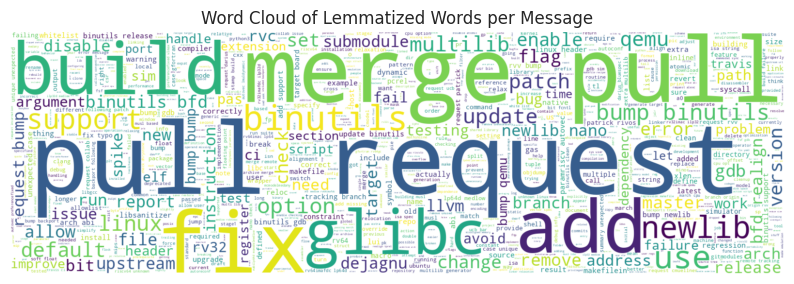

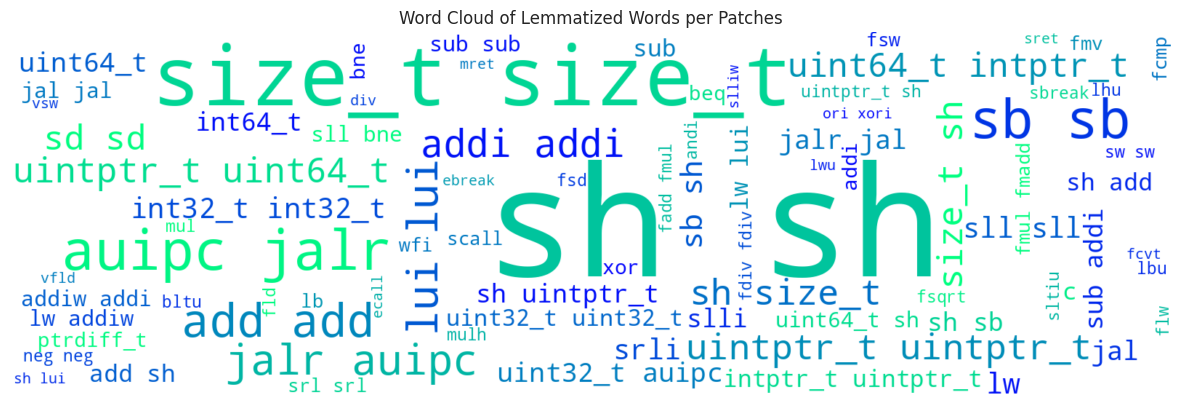

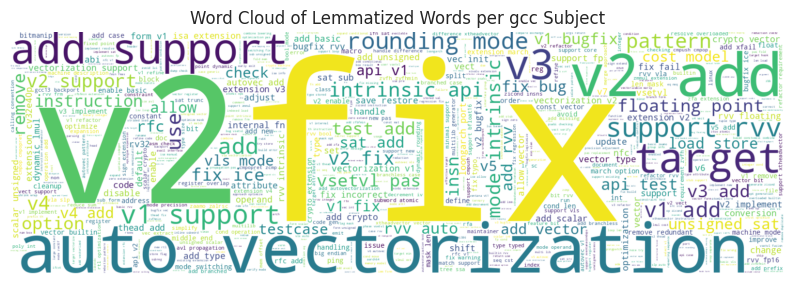

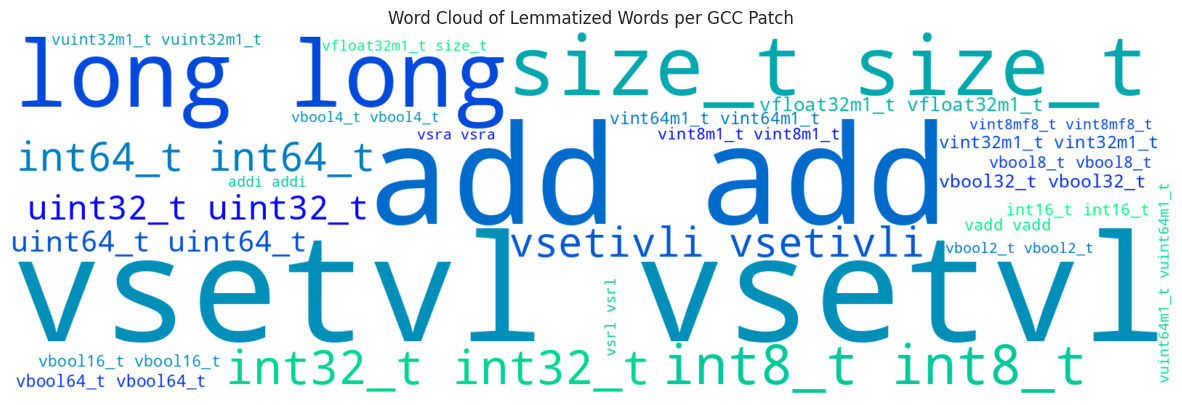

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for lemmatized words per message
lemmatized_words_per_message_str = ' '.join([' '.join(words) for words in lemmatized_words_per_message])
wordcloud_message = WordCloud(background_color="white", max_words=5000, width=1600, height=500, contour_width=1, contour_color='steelblue').generate(lemmatized_words_per_message_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_message, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per Message')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per patches
lemmatized_words_per_patches_str = ' '.join([' '.join(words) for words in lemmatized_words_per_patch])
wordcloud_patches = WordCloud(background_color="white",colormap='winter', max_words=1000, width=1600, height=500, contour_width=1, contour_color='steelblue',max_font_size=210,min_font_size=20).generate(lemmatized_words_per_patches_str)

plt.figure(figsize=(15, 20))
plt.imshow(wordcloud_patches, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per Patches')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per subject
lemmatized_words_per_subject_str = ' '.join([' '.join(words) for words in lemmatized_words_per_subject])
wordcloud_subject = WordCloud(background_color="white", max_words=5000, width=1600, height=500, contour_width=1, contour_color='steelblue').generate(lemmatized_words_per_subject_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_subject, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per gcc Subject')
plt.axis('off')
plt.show()

# Generate word cloud for lemmatized words per gcc patch
lemmatized_words_per_gcc_patch_str = ' '.join([' '.join(words) for words in lemmatized_words_per_gcc_patch])
wordcloud_gcc_patch = WordCloud(background_color="white",colormap='winter', max_words=1000, width=1600, height=500, contour_width=1, contour_color='steelblue',min_font_size=20,max_font_size=210).generate(lemmatized_words_per_gcc_patch_str)

plt.figure(figsize=(15, 20))
plt.imshow(wordcloud_gcc_patch, interpolation='bilinear')
plt.title('Word Cloud of Lemmatized Words per GCC Patch')
plt.axis('off')
plt.show()


# **Step:9 Create and Process Corpora Using Gensim**

The following next six sections performs the following tasks to further process data for topic modeling:

* Import Required Libraries
* Create Dictionary and Corpus for Each Text Source (commit messages, subjects, patches, and GCC patches)
* Convert text into a bag-of-words (BoW) corpus
* Apply TF-IDF transformation to weigh terms
* Print sample dictionary entries, corpus and length of corpus

In [ ]:
import gensim
from gensim import corpora,models
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import Word2Vec

In [ ]:

from pprint import pprint
# Create a dictionary from lemmatized words ofcommit messages
dictionarycm = corpora.Dictionary(lemmatized_words_per_message)

# Create a corpus
corpuscm = [dictionarycm.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]
tfidfcm = models.TfidfModel(corpuscm,smartirs="ntc")
corpus_tfidfcm = tfidfcm[corpuscm]

print("First 1000 entries of the dictionary:")
pprint(list(dictionarycm.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpuscm[:5])


First 1000 entries of the dictionary:
[(0, 'add'),
 (1, 'build'),
 (2, 'carv'),
 (3, 'forth'),
 (4, 'ic'),
 (5, 'linux'),
 (6, 'merge'),
 (7, 'ng'),
 (8, 'nommu'),
 (9, 'pull'),
 (10, 'request'),
 (11, 'support'),
 (12, 'uclibc'),
 (13, 'bump'),
 (14, 'case'),
 (15, 'enable'),
 (16, 'gfortran'),
 (17, 'ilp32'),
 (18, 'ilp32d'),
 (19, 'lp64'),
 (20, 'lp64d'),
 (21, 'medlow'),
 (22, 'multilib'),
 (23, 'qemu'),
 (24, 'result'),
 (25, 'rv32imac'),
 (26, 'rv32imafdc'),
 (27, 'rv64imac'),
 (28, 'rv64imafdc'),
 (29, 'summary'),
 (30, 'unexpected'),
 (31, 'unique'),
 (32, 'glibc'),
 (33, 'binutils'),
 (34, 'gdb'),
 (35, 'release'),
 (36, 'version'),
 (37, 'header'),
 (38, 'install'),
 (39, 'library'),
 (40, 'openmp'),
 (41, 'sysroot'),
 (42, 'clonning'),
 (43, 'progress'),
 (44, 'submodules'),
 (45, 'fix'),
 (46, 'lib'),
 (47, 'llvmgold'),
 (48, 'macos'),
 (49, 'shared'),
 (50, 'suffix'),
 (51, 'llvm'),
 (52, 'musl'),
 (53, 'cause'),
 (54, 'clang'),
 (55, 'command'),
 (56, 'default'),
 (57, 'd

In [ ]:

from pprint import pprint
# Create a dictionary from lemmatized words ofcommit messages
dictionary_sub = corpora.Dictionary(lemmatized_words_per_subject)

# Create a corpus
corpus_sub = [dictionary_sub.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]
tfidf_sub = models.TfidfModel(corpus_sub,smartirs="ntc")
corpus_tfidf_sub = tfidf_sub[corpus_sub]

print("First 1000 entries of the dictionary:")
pprint(list(dictionary_sub.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpus_sub[:5])


First 1000 entries of the dictionary:
[(0, 'nfc'),
 (1, 'pr105314'),
 (2, 'use'),
 (3, 'zicond'),
 (4, 'attribute'),
 (5, 'correct'),
 (6, 'idx'),
 (7, 'mode'),
 (8, 'pr116149'),
 (9, 'variant'),
 (10, 'viwalu'),
 (11, 'wx'),
 (12, 'accel'),
 (13, 'coeffs'),
 (14, 'degree'),
 (15, 'int'),
 (16, 'num'),
 (17, 'offloading'),
 (18, 'poly'),
 (19, 'streaming'),
 (20, 'support'),
 (21, 'expand'),
 (22, 'necessary'),
 (23, 'pr116086'),
 (24, 'slide'),
 (25, 'subreg'),
 (26, 'add'),
 (27, 'b23'),
 (28, 'profile'),
 (29, 'rfc'),
 (30, 'rva'),
 (31, 'implement'),
 (32, 'oct'),
 (33, 'quad'),
 (34, 'sat'),
 (35, 'scalar'),
 (36, 'trunc'),
 (37, 'v1'),
 (38, 'abi'),
 (39, 'deprecation'),
 (40, 'lp64e'),
 (41, 'v2'),
 (42, 'warning'),
 (43, 'extension'),
 (44, 'ilp32e'),
 (45, 'reject'),
 (46, 'dg'),
 (47, 'fix'),
 (48, 'typo'),
 (49, 'clash'),
 (50, 'protection'),
 (51, 'stack'),
 (52, 'vector'),
 (53, 'ice'),
 (54, 'rv32'),
 (55, 'unexpected'),
 (56, 'xtheadmemidx'),
 (57, 'check'),
 (58, 'exten

In [ ]:

from pprint import pprint
# Create a dictionary from lemmatized words
dictionary = corpora.Dictionary(lemmatized_words_per_patch)

# Create a corpus
corpus = [dictionary.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]
tfidf = models.TfidfModel(corpus,smartirs="ntc")
corpus_tfidf = tfidf[corpus]

print("First 1000 entries of the dictionary:")
pprint(list(dictionary.items())[:100])

print("\nFirst 5 entries of the corpus:")
pprint(corpus[:5])


First 1000 entries of the dictionary:
[(0, 'sd'),
 (1, 'sh'),
 (2, 'add'),
 (3, 'sw'),
 (4, 'sub'),
 (5, 'int16_t'),
 (6, 'int32_t'),
 (7, 'int64_t'),
 (8, 'int8_t'),
 (9, 'intptr_t'),
 (10, 'ptrdiff_t'),
 (11, 'sb'),
 (12, 'size_t'),
 (13, 'uint16_t'),
 (14, 'uint32_t'),
 (15, 'uint64_t'),
 (16, 'uint8_t'),
 (17, 'uintptr_t'),
 (18, 'lui'),
 (19, 'lw'),
 (20, 'fld'),
 (21, 'flw'),
 (22, 'fsd'),
 (23, 'fsw'),
 (24, 'seqz'),
 (25, 'beq'),
 (26, 'blt'),
 (27, 'bne'),
 (28, 'csrrw'),
 (29, 'ebreak'),
 (30, 'ecall'),
 (31, 'mret'),
 (32, 'rdcycleh'),
 (33, 'rdinstret'),
 (34, 'rdinstreth'),
 (35, 'sbreak'),
 (36, 'scall'),
 (37, 'sret'),
 (38, 'uret'),
 (39, 'wfi'),
 (40, 'addi'),
 (41, 'csrrc'),
 (42, 'csrrs'),
 (43, 'vfld'),
 (44, 'vflw'),
 (45, 'vlb'),
 (46, 'vlbu'),
 (47, 'vld'),
 (48, 'vlh'),
 (49, 'vlhu'),
 (50, 'vlw'),
 (51, 'vlwu'),
 (52, 'vsb'),
 (53, 'vsd'),
 (54, 'vsetvl'),
 (55, 'vsh'),
 (56, 'vsw'),
 (57, 'fence'),
 (58, 'andi'),
 (59, 'slli'),
 (60, 'srli'),
 (61, 'fcmp'),
 (

In [ ]:
from pprint import pprint

gcc_dictionary = corpora.Dictionary(lemmatized_words_per_gcc_patch)

gcc_corpus = [gcc_dictionary.doc2bow(lemmatized_words) for lemmatized_words in lemmatized_words_per_gcc_patch]
gcc_tfidf = models.TfidfModel(gcc_corpus,smartirs='ntc')
gcc_corpus_tfidf = gcc_tfidf[gcc_corpus]

print("First 1000 entries of the GCC dictionary:")
pprint(list(gcc_dictionary.items())[:100])

print("\nFirst 5 entries of the GCC corpus:")
pprint(gcc_corpus[:5])


First 1000 entries of the GCC dictionary:
[(0, 'add'),
 (1, 'sub'),
 (2, 'long'),
 (3, 'vsetivli'),
 (4, 'addi'),
 (5, 'andi'),
 (6, 'slli'),
 (7, 'sltiu'),
 (8, 'sltu'),
 (9, 'srli'),
 (10, 'uint16_t'),
 (11, 'uint32_t'),
 (12, 'uint64_t'),
 (13, 'uint8_t'),
 (14, 'div'),
 (15, 'mul'),
 (16, 'neg'),
 (17, 'fence'),
 (18, 'lr.w'),
 (19, 'sc.w'),
 (20, 'size_t'),
 (21, 'xor'),
 (22, 'vsetvl'),
 (23, 'sd'),
 (24, 'sw'),
 (25, 'bge'),
 (26, 'int32_t'),
 (27, 'int64_t'),
 (28, 'lwu'),
 (29, 'ecall'),
 (30, 'vadd'),
 (31, 'vdiv'),
 (32, 'vmul'),
 (33, 'vsub'),
 (34, 'vfmadd'),
 (35, 'vfmsub'),
 (36, 'vfmul'),
 (37, 'vfnmacc'),
 (38, 'vfnmsub'),
 (39, 'vmerge'),
 (40, 'fclass'),
 (41, 'fcmp'),
 (42, 'int16_t'),
 (43, 'addw'),
 (44, 'vrgather'),
 (45, 'vssubu'),
 (46, 'vfloat16m1_t'),
 (47, 'vfloat16m2_t'),
 (48, 'vfloat16m4_t'),
 (49, 'vfloat16mf2_t'),
 (50, 'vfloat16mf4_t'),
 (51, 'vfloat32m1_t'),
 (52, 'vfloat32m2_t'),
 (53, 'vfloat32m4_t'),
 (54, 'vfloat32mf2_t'),
 (55, 'vfloat64m1_t'),
 

In [ ]:
print('Number of unique tokens in Commit messages in dataset 1: %d' % len(dictionarycm))
print('Number of documents in  Commit messages dataset 1: %d' % len(corpuscm))
print('Number of unique tokens in patches in dataset 1: %d' % len(dictionary))
print('Number of documents in patches in  dataset 1: %d ' % len(corpus))
print("------------------------------------------------")
print('Number of unique tokens in Subjects in dataset 2: %d' % len(dictionary_sub))
print('Number of documents in Subjects in  dataset 2: %d' % len(corpus_sub))
print('Number of unique tokens in patches in dataset 2: %d' % len(gcc_dictionary))
print('Number of documents in patches in  dataset 2: %d ' % len(gcc_corpus))


Number of unique tokens in Commit messages in dataset 1: 2510
Number of documents in  Commit messages dataset 1: 1256
Number of unique tokens in patches in dataset 1: 109
Number of documents in patches in  dataset 1: 952 
------------------------------------------------
Number of unique tokens in Subjects in dataset 2: 2943
Number of documents in Subjects in  dataset 2: 7428
Number of unique tokens in patches in dataset 2: 512
Number of documents in patches in  dataset 2: 10065 


# **Step 10: Create function of coherence metrics to evaluate topic models**

In [ ]:
from gensim.models import CoherenceModel

def calculate_model_metrics(model, texts, dictionary, corpus):
    metrics = ['c_v', 'c_npmi', 'u_mass']
    coherence_scores = {}

    # Calculate coherence scores for all metrics
    for metric in metrics:
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, corpus=corpus, coherence=metric)
        coherence_scores[metric] = coherence_model.get_coherence()



    return {
        'coherence_scores': coherence_scores,

    }


# **Step:11 Apply Topic Modeling on data for RISC-V compiler toolchain**

This following next four sections of code execute the following tasks for generationg topics:

 * Import Required Libraries

  - LatentDirichletAllocation (LDA): Probabilistic topic modeling.

  - NMF (Non-Negative Matrix Factorization): Matrix factorization-based topic modeling.

  - TruncatedSVD (LSA - Latent Semantic Analysis): Dimensionality reduction for topic modeling.

  - TfidfVectorizer: Converts text into numerical form (TF-IDF)

* Create function to extract top words per topic, compute topic probabilities for each document and find the most probable topic per document.
* Converts lemmatized commit messages, patches, subjects and gcc patches into a TF-IDF matrix.
* Filters out rare and very common words.
* Train LDA, NMF, and LSA Models
* Extract and Print Topics.
* Evaluate topic coherence scores (c_v, c_npmi, and u_mass)

**Step 11.1 : Topic modelling for Commit messages**

In [ ]:
!pip install octis==1.0.1
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install tomotopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp312-cp312-linux_x86_64.whl size=251418 sha256=5c8aa6322df16e783e77ed78cd7bbe0912924dd1afbb034f522181d3e40e686b
  Stored in directory: /root/.cache/pip/wheels/3e/41/29/219cda9dd4f382777661816e4b9215c10ffe5d07dad2bc9401
Successfully built libsvm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver 

In [ ]:
# @title
#for commit message
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from bertopic import BERTopic
from sklearn.model_selection import KFold
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from top2vec import Top2Vec
import numpy as np
import time
import threading
import psutil
import torch
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine
num_seeds = 5
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "n_components": np.arange(5, 21),
    "doc_topic_prior": np.linspace(0.01, 0.5, 10),
    "topic_word_prior": np.linspace(0.01, 0.5, 10)
}

ctm_runtimes = []
ctm_doc_size=[]
ctm_mem = []

lda_runtimes = []
nmf_runtimes = []
lsa_runtimes = []
bert_runtimes = []
doc_size=[]
lda_mem = []
nmf_mem = []
lsa_mem = []
bert_mem = []
top2vec_runtimes = []
top2vec_doc_size=[]
top2vec_mem = []
word2vec_runtimes = []
word2vec_doc_size=[]
word2vec_mem = []
commit_coherence={}
coherence_scores = {}


# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_measures_full = ['c_v', 'c_npmi', 'u_mass','diversity']
for measure in coherence_measures_full:
    coherence_scores[f'LDA_{measure}'] = np.array([])  # start empty array
    coherence_scores[f'NMF_{measure}'] = np.array([])
    coherence_scores[f'LSA_{measure}'] = np.array([])
    coherence_scores[f'BERT_{measure}'] = np.array([])
    coherence_scores[f'Top2vec_{measure}'] = np.array([])
    coherence_scores[f'word2vec_{measure}'] = np.array([])
    coherence_scores[f'cmCTM_{measure}'] = np.array([])

# Join lemmatized words for each document into a single string
document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]


# Create a TfidfVectorizer

vectorizercm = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=20,max_df=0.7)
#doc_size.append(len(document_textscm))


kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(document_textscm):
  train_docs = [document_textscm[i] for i in train_idx]
  test_docs = [document_textscm[i] for i in test_idx]
# Fit and transform the lemmatized words
  #X = vectorizercm.fit_transform(document_textscm)
  doc_size.append(len(train_docs))
  X = vectorizercm.fit_transform(train_docs)
# Convert document-term matrix to array
  document_term_matrixcm= X.toarray()
# -----------------------------
# Resource monitoring
# -----------------------------


  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()
  lda_sklearncm = LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)
  lda_sklearncm.fit(document_term_matrixcm)
  end_time = time.time()
  running = False
  monitor_thread.join()
  lda_runtimes.append(round(end_time - start_time, 2))
  lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textscm))
# -----------------------------
  print("===== LDA Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


 # lda_sklearncm = lda_search.best_estimator_
  lda_topicscm = get_topics(lda_sklearncm, vectorizercm)
  lda_topic_distributionscm = get_topic_distributions(lda_sklearncm, X)
  lda_dominant_topicscm = get_dominant_topics(lda_topic_distributionscm)






# NMF model riscv git repo cm


# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

  nmf_sklearncm = NMF(random_state=42,max_iter=200,l1_ratio=0.2,n_components=10
                     # n_components=39,l1_ratio=0.0,alpha_W=0.0,alpha_H= 0.0,init='nndsvdar', max_iter=500
                      )
  nmf_sklearncm.fit(document_term_matrixcm)

  end_time = time.time()
  running = False
  monitor_thread.join()
  nmf_runtimes.append(round(end_time - start_time, 2))
  nmf_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== NMF Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  nmf_topicscm = get_topics(nmf_sklearncm, vectorizercm)
  nmf_topic_distributionscm = get_topic_distributions(nmf_sklearncm, X)
  nmf_dominant_topicscm = get_dominant_topics(nmf_topic_distributionscm)




# LSA model riscv git repo cm

  vectorizer_tfidfcm = TfidfVectorizer(
  min_df=1,        # VERY IMPORTANT for small corpora
  max_df=0.95,
  ngram_range=(1, 2),
  stop_words='english'
)#(sublinear_tf=True,min_df=1,max_df=0.95)
#bert_sklearncm.fit_transform(document_textscm)
  X_tfidfcm = vectorizer_tfidfcm.fit_transform(train_docs)


# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()


  lsa_sklearncm = TruncatedSVD(   n_components=10,
  random_state=42)
  #n_components=18, algorithm= 'arpack', random_state=42)
  lsa_sklearncm.fit(X_tfidfcm)


  end_time = time.time()
  running = False
  monitor_thread.join()
  lsa_runtimes.append(round(end_time - start_time, 2))
  lsa_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== LSA Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



  lsa_topicscm = get_topics(lsa_sklearncm, vectorizer_tfidfcm)
  lsa_topic_distributionscm = get_topic_distributions(lsa_sklearncm, X_tfidfcm)
  lsa_dominant_topicscm = get_dominant_topics(lsa_topic_distributionscm)


#for seed in range(num_seeds):
#  np.random.seed(seed)
# BERT model riscv git repo cm

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True
  vectorizerpatbert = CountVectorizer(
    min_df=1,
    max_df=0.95,
    stop_words=None,
    ngram_range=(1, 2)
)
  np.random.seed(42)
  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

  #bert_sklearncm = BERTopic(calculate_probabilities=True,)
  bert_sklearncm = BERTopic(
  embedding_model=None,
  vectorizer_model=vectorizerpatbert,
  umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
  hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)
  topics, probs=bert_sklearncm.fit_transform(train_docs)

  end_time = time.time()
  running = False
  monitor_thread.join()
  bert_runtimes.append(round(end_time - start_time, 2))
  bert_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== BERT Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  bert_sklearncm.reduce_topics(train_docs, nr_topics=10)
  topics, probs=bert_sklearncm.fit_transform(train_docs)

  bert_topicscm = bert_sklearncm.get_topics()
  bert_topic_distributionscm = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
  bert_dominant_topicscm = probs.argmax(axis=1)



# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()



  top2vec_modelcm = Top2Vec(documents=train_docs, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})

  end_time = time.time()
  running = False
  monitor_thread.join()
  top2vec_runtimes.append(round(end_time - start_time, 2))
  top2vec_mem.append(round(peak_ram, 2))

 # top2vec_modelcm.reduce_topics(num_topics=10)



  # -----------------------------
  print("===== top2vec Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

  top2vec_modelcm.save("top2vec_modelcm")
  print("\n ----------------------------")
  print(top2vec_modelcm.get_num_topics())
  # Get the topics
  topic_wordscm, word_scores, topic_numscm = top2vec_modelcm.get_topics()

  # Print the topics
  print("\nTop2Vec Topics of git repo commit messages:")
  for topic_numcm in topic_numscm:
    print(f"Topic {topic_numcm}: {', '.join(topic_wordscm[topic_numcm][:10])}")
  print("\n")
# Calculate the coherence score for Top2Vec git repo
  top2vec_topicscm = [topic_wordscm[i][:10] for i in topic_numscm]

  # -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()



  tokenized_lemmatized_words_per_message = [simple_preprocess(doc) for doc in train_docs]
# Train Word2Vec model
  word2vec_modelcm = Word2Vec(sentences=tokenized_lemmatized_words_per_message,
    vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42)

                              #workers=1,vector_size=100, window=20, alpha=0.01, min_count=20 ,sg=1,epochs=10,seed=100)

  end_time = time.time()
  running = False
  monitor_thread.join()
  word2vec_runtimes.append(round(end_time - start_time, 2))
  word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== word2vec Resource Utilization =====")
  print(f"Documents processed: {len(tokenized_lemmatized_words_per_message)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  word_vectorscm = word2vec_modelcm.wv
  word_embeddingscm = word_vectorscm.vectors  # This gives the word embeddings
  wordscm = word_vectorscm.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
  num_topics = 10  # Number of topics
  kmeans = KMeans(n_clusters=num_topics,
                  random_state=42)
  kmeans.fit(word_embeddingscm,)

# Get cluster centers
  topic_vectorscm = kmeans.cluster_centers_

# Get top words for each topic
  top_words_per_topiccm = []
  for i, topic_veccm in enumerate(topic_vectorscm):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_veccm, word_vec) for word_vec in word_embeddingscm])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [wordscm[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topiccm.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


# Initialize the CTModel with 30 topics
  mdlcm = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
  for lemmatized_words in tokenized_lemmatized_words_per_message:
    mdlcm.add_doc(lemmatized_words)

  ctm_doc_size.append(len(tokenized_lemmatized_words_per_message))

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

# Training the model in batches of 10 iterations
  for i in range(0, 100,10):
    mdlcm.train(100,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdlcm.ll_per_word))


  end_time = time.time()
  running = False
  monitor_thread.join()
  ctm_runtimes.append(round(end_time - start_time, 2))
  ctm_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== ctm Resource Utilization =====")
  print(f"Documents processed: {len(tokenized_lemmatized_words_per_message)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



# Extracting the topic-word distributions for coherence calculation
  topicscm = []
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topicscm.append([word for word, _ in topic_wordscm])




# Printing the top words for each topic
  print("\n commit messages Topics and their top words:")
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topic_words_strcm = ", ".join(word for word, _ in topic_wordscm)
    print(f"Topic #{k}: {topic_words_strcm}")







  print("topics from riscv gnu toolchain Commit messages")
  def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):
        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")

  def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")

  print_topics(lda_topicscm, "LDA")
  print_topics(nmf_topicscm, "NMF")
  print_topics(lsa_topicscm, "LSA")
  print_topics_bert(bert_topicscm, "BERT")






  tokenized_test_docs = [simple_preprocess(doc) for doc in test_docs]
  bert_topics_for_gensim = []
  for topic_id, word_probs in bert_topicscm.items():
    if topic_id == -1:
        continue  # skip outlier topic
    words = [word for word, prob in word_probs]  # only take words
    bert_topics_for_gensim.append(words)



  for measure in coherence_measures:
    lda_coherence_scorecm = calculate_coherence_score(lda_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    nmf_coherence_scorecm = calculate_coherence_score(nmf_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    lsa_coherence_scorecm = calculate_coherence_score(lsa_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    bert_coherence_scorecm = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    top2vec_coherence_scorecm = calculate_coherence_score(top2vec_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    word2vec_coherence_scorecm = calculate_coherence_score(top_words_per_topiccm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    ctm_coherence_scorecm = calculate_coherence_score(topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)

    coherence_scores[f'LDA_{measure}'] = np.append(coherence_scores[f'LDA_{measure}'], lda_coherence_scorecm)
    coherence_scores[f'NMF_{measure}'] = np.append(coherence_scores[f'NMF_{measure}'], nmf_coherence_scorecm)
    coherence_scores[f'LSA_{measure}'] = np.append(coherence_scores[f'LSA_{measure}'], lsa_coherence_scorecm)
    coherence_scores[f'BERT_{measure}'] = np.append(coherence_scores[f'BERT_{measure}'], bert_coherence_scorecm)
    coherence_scores[f'Top2vec_{measure}'] = np.append(coherence_scores[f'Top2vec_{measure}'], top2vec_coherence_scorecm)
    coherence_scores[f'word2vec_{measure}'] = np.append(coherence_scores[f'word2vec_{measure}'], word2vec_coherence_scorecm)
    coherence_scores[f'cmCTM_{measure}'] = np.append(coherence_scores[f'cmCTM_{measure}'], ctm_coherence_scorecm)



  lda_topics_dictcm = {"topics": lda_topicscm}
  nmf_topics_dictcm = {"topics": nmf_topicscm}
  lsa_topics_dictcm = {"topics": lsa_topicscm}
  t2v_topics_dictcm = {"topics": top2vec_topicscm}
  w2v_topics_dictcm = {"topics": top_words_per_topiccm}
  ctm_topics_dictcm = {"topics": topicscm}



  bert_topics_dictcm = {
    "topics": [
        [word for word, _ in bert_topicscm[t]]
        for t in bert_topicscm
        if t != -1
    ]
  }


  # Initialize TopicDiversity metric
  metric1 = TopicDiversity(topk=10)

# Calculate the topic diversity score
  topic_diversity_score_ldacm = metric1.score(lda_topics_dictcm)
  topic_diversity_score_nmfcm = metric1.score(nmf_topics_dictcm)
  topic_diversity_score_lsacm = metric1.score(lsa_topics_dictcm)
  topic_diversity_score_bertcm = metric1.score(bert_topics_dictcm)
  topic_diversity_score_t2vcm = metric1.score(t2v_topics_dictcm)
  topic_diversity_score_w2vcm = metric1.score(w2v_topics_dictcm)
  topic_diversity_score_ctmcm = metric1.score(ctm_topics_dictcm)

  coherence_scores["LDA_diversity"] =  np.append(coherence_scores["LDA_diversity"], topic_diversity_score_ldacm)
  coherence_scores["NMF_diversity"] =  np.append(coherence_scores["NMF_diversity"], topic_diversity_score_nmfcm)
  coherence_scores["LSA_diversity"] =  np.append(coherence_scores["LSA_diversity"], topic_diversity_score_lsacm)
  coherence_scores["BERT_diversity"] =  np.append(coherence_scores["BERT_diversity"], topic_diversity_score_bertcm)
  coherence_scores["Top2vec_diversity"] = np.append(coherence_scores["Top2vec_diversity"], topic_diversity_score_t2vcm)
  coherence_scores["word2vec_diversity"] = np.append(coherence_scores["word2vec_diversity"], topic_diversity_score_w2vcm)
  coherence_scores["cmCTM_diversity"] = np.append(coherence_scores["cmCTM_diversity"], topic_diversity_score_ctmcm)

  print(f"Commit messages Topic Diversity Score LDA: {topic_diversity_score_ldacm}")
  print(f"Commit messages Topic Diversity Score NMF: {topic_diversity_score_nmfcm}")
  print(f"Commit messages Topic Diversity Score BERT: {topic_diversity_score_bertcm}")
  print(f"Commit messages Topic Diversity Score LSA: {topic_diversity_score_lsacm}")
  print(f"Commit messages Topic Diversity Score top2vec: {topic_diversity_score_t2vcm}")
  print(f"Commit messages Topic Diversity Score word2vec: {topic_diversity_score_w2vcm}")
  print(f"Commit messages Topic Diversity Score CTM: {topic_diversity_score_ctmcm}")



#riscv gnu toolchain cm
# Print topics from each model



#'c_v','c_npmi', 'u_mass'








commit_coherence=coherence_scores

 # for model, scores in coherence_scores.items():
 #   print(f"{model} Coherence Score: {scores}")
 #   if model in commit_coherence:
  #      commit_coherence[model] = np.append(commit_coherence[model], scores)
  #  else:
        # If the key doesn't exist, create it as a new array
   #     commit_coherence[model] = np.array([scores])


KeyboardInterrupt: 

In [ ]:
print(lda_mem)
print(nmf_mem)
print(lsa_mem)
print(top2vec_mem)
print(word2vec_mem)
print(ctm_mem)
print(bert_mem)
print(lda_runtimes)
print(nmf_runtimes)
print(lsa_runtimes)
print(top2vec_runtimes)
print(word2vec_runtimes)
print(ctm_runtimes)
print(bert_runtimes)

print("LDA_MEM ",np.max(lda_mem))
print("NMF_MEM ",np.max(nmf_mem))
print("LSA_MEM ",np.max(lsa_mem))
print("Top2Vec_MEM ",np.max(top2vec_mem))
print("Word2Vec_MEM ",np.max(word2vec_mem))
print("CTM_MEM ",np.max(ctm_mem))
print("BERT_MEM ",np.max(bert_mem))
print("LDA_TIME ",np.mean(lda_runtimes))
print("NMF_TIME ",np.mean(nmf_runtimes))
print("LSA_TIME ",np.mean(lsa_runtimes))
print("TOP2VEC_TIME ",np.mean(top2vec_runtimes))
print("WORD2VEC_TIME ",np.mean(word2vec_runtimes))
print("CTM_TIME ",np.mean(ctm_runtimes))
print("BERT_TIME ",np.mean(bert_runtimes))


[3257.62, 3339.1, 3413.61, 3512.59, 3618.79, 3730.5, 3831.88, 3988.52, 4075.13, 4174.28]
[3257.84, 3339.1, 3413.61, 3512.59, 3618.79, 3730.5, 3831.88, 3988.52, 4075.13, 4174.28]
[3258.39, 3339.1, 3413.61, 3512.59, 3618.79, 3730.5, 3831.88, 3988.52, 4075.14, 4174.28]
[3339.06, 3413.62, 3512.62, 3618.78, 3730.52, 3831.89, 3988.56, 4075.17, 4174.32, 4279.27]
[3339.19, 3413.71, 3512.69, 3618.88, 3730.59, 3831.96, 3988.61, 4075.21, 4174.37, 4279.31]
[3339.09, 3413.61, 3512.59, 3618.79, 3730.49, 3831.86, 3988.51, 4075.12, 4174.28, 4279.23]
[3439.64, 3573.33, 3667.43, 3762.48, 3901.91, 4002.89, 4113.13, 4217.15, 4314.66, 4419.61]
[25.57, 7.22, 5.86, 5.94, 7.3, 6.71, 6.24, 7.93, 6.18, 7.8]
[0.45, 0.7, 0.32, 0.3, 0.09, 0.36, 0.08, 0.1, 0.16, 0.19]
[0.56, 0.17, 0.05, 0.04, 0.04, 0.36, 0.04, 0.04, 0.04, 0.05]
[52.66, 18.13, 17.53, 19.03, 18.06, 18.24, 18.06, 17.79, 18.82, 18.0]
[1.13, 0.64, 0.63, 0.67, 0.69, 0.65, 0.87, 0.66, 1.04, 0.66]
[194.54, 93.11, 91.03, 90.14, 92.42, 90.21, 91.82, 91.16, 9

**Scalabilty metrics data collection**

In [ ]:
# @title
#for commit message
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from bertopic import BERTopic
from sklearn.model_selection import KFold
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from top2vec import Top2Vec
import numpy as np
import time
import threading
import psutil
import torch
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine
num_seeds = 5
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "n_components": np.arange(5, 21),
    "doc_topic_prior": np.linspace(0.01, 0.5, 10),
    "topic_word_prior": np.linspace(0.01, 0.5, 10)
}

ctm_runtimes = []
ctm_doc_size=[]
ctm_mem = []

lda_runtimes = []
nmf_runtimes = []
lsa_runtimes = []
bert_runtimes = []
doc_size=[]
lda_mem = []
nmf_mem = []
lsa_mem = []
bert_mem = []
top2vec_runtimes = []
top2vec_doc_size=[]
top2vec_mem = []
word2vec_runtimes = []
word2vec_doc_size=[]
word2vec_mem = []
commit_coherence={}
coherence_scores = {}


# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_measures_full = ['c_v', 'c_npmi', 'u_mass','diversity']
for measure in coherence_measures_full:
    coherence_scores[f'LDA_{measure}'] = np.array([])  # start empty array
    coherence_scores[f'NMF_{measure}'] = np.array([])
    coherence_scores[f'LSA_{measure}'] = np.array([])
    coherence_scores[f'BERT_{measure}'] = np.array([])
    coherence_scores[f'Top2vec_{measure}'] = np.array([])
    coherence_scores[f'word2vec_{measure}'] = np.array([])
    coherence_scores[f'cmCTM_{measure}'] = np.array([])

# Join lemmatized words for each document into a single string
document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]


# Create a TfidfVectorizer

vectorizercm = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=20,max_df=0.7)
#doc_size.append(len(document_textscm))



# Fit and transform the lemmatized words
X = vectorizercm.fit_transform(document_textscm)
doc_size.append(len(document_textscm))
  #X = vectorizercm.fit_transform(train_docs)
# Convert document-term matrix to array
document_term_matrixcm= X.toarray()
# -----------------------------
# Resource monitoring
# -----------------------------


process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()
lda_sklearncm = LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)
lda_sklearncm.fit(document_term_matrixcm)
end_time = time.time()
running = False
monitor_thread.join()
lda_runtimes.append(round(end_time - start_time, 2))
lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textscm))
# -----------------------------
print("===== LDA Resource Utilization =====")
print(f"Documents processed: {len(document_textscm)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


 # lda_sklearncm = lda_search.best_estimator_
lda_topicscm = get_topics(lda_sklearncm, vectorizercm)
lda_topic_distributionscm = get_topic_distributions(lda_sklearncm, X)
lda_dominant_topicscm = get_dominant_topics(lda_topic_distributionscm)






# NMF model riscv git repo cm


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

nmf_sklearncm = NMF(random_state=42,max_iter=200,l1_ratio=0.2,n_components=10
                     # n_components=39,l1_ratio=0.0,alpha_W=0.0,alpha_H= 0.0,init='nndsvdar', max_iter=500
                      )
nmf_sklearncm.fit(document_term_matrixcm)

end_time = time.time()
running = False
monitor_thread.join()
nmf_runtimes.append(round(end_time - start_time, 2))
nmf_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== NMF Resource Utilization =====")
print(f"Documents processed: {len(document_textscm)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


nmf_topicscm = get_topics(nmf_sklearncm, vectorizercm)
nmf_topic_distributionscm = get_topic_distributions(nmf_sklearncm, X)
nmf_dominant_topicscm = get_dominant_topics(nmf_topic_distributionscm)




# LSA model riscv git repo cm

vectorizer_tfidfcm = TfidfVectorizer(
min_df=1,        # VERY IMPORTANT for small corpora
max_df=0.95,
ngram_range=(1, 2),
stop_words='english'
)#(sublinear_tf=True,min_df=1,max_df=0.95)
#bert_sklearncm.fit_transform(document_textscm)
X_tfidfcm = vectorizer_tfidfcm.fit_transform(document_textscm)


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


lsa_sklearncm = TruncatedSVD(   n_components=10,
random_state=42)
  #n_components=18, algorithm= 'arpack', random_state=42)
lsa_sklearncm.fit(X_tfidfcm)


end_time = time.time()
running = False
monitor_thread.join()
lsa_runtimes.append(round(end_time - start_time, 2))
lsa_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== LSA Resource Utilization =====")
print(f"Documents processed: {len(document_textscm)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



lsa_topicscm = get_topics(lsa_sklearncm, vectorizer_tfidfcm)
lsa_topic_distributionscm = get_topic_distributions(lsa_sklearncm, X_tfidfcm)
lsa_dominant_topicscm = get_dominant_topics(lsa_topic_distributionscm)


#for seed in range(num_seeds):
#  np.random.seed(seed)
# BERT model riscv git repo cm

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True
vectorizerpatbert = CountVectorizer(
min_df=1,
max_df=0.95,
stop_words=None,
ngram_range=(1, 2)
)
np.random.seed(42)
def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

  #bert_sklearncm = BERTopic(calculate_probabilities=True,)
bert_sklearncm = BERTopic(
embedding_model=None,
vectorizer_model=vectorizerpatbert,
umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)
topics, probs=bert_sklearncm.fit_transform(document_textscm)

end_time = time.time()
running = False
monitor_thread.join()
bert_runtimes.append(round(end_time - start_time, 2))
bert_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== BERT Resource Utilization =====")
print(f"Documents processed: {len(document_textscm)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


bert_sklearncm.reduce_topics(document_textscm, nr_topics=10)
topics, probs=bert_sklearncm.fit_transform(document_textscm)

bert_topicscm = bert_sklearncm.get_topics()
bert_topic_distributionscm = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
bert_dominant_topicscm = probs.argmax(axis=1)



# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()



top2vec_modelcm = Top2Vec(documents=document_textscm, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})

end_time = time.time()
running = False
monitor_thread.join()
top2vec_runtimes.append(round(end_time - start_time, 2))
top2vec_mem.append(round(peak_ram, 2))

 # top2vec_modelcm.reduce_topics(num_topics=10)



  # -----------------------------
print("===== top2vec Resource Utilization =====")
print(f"Documents processed: {len(document_textscm)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

top2vec_modelcm.save("top2vec_modelcm")
print("\n ----------------------------")
print(top2vec_modelcm.get_num_topics())
  # Get the topics
topic_wordscm, word_scores, topic_numscm = top2vec_modelcm.get_topics()

  # Print the topics
print("\nTop2Vec Topics of git repo commit messages:")
for topic_numcm in topic_numscm:
    print(f"Topic {topic_numcm}: {', '.join(topic_wordscm[topic_numcm][:10])}")
print("\n")
# Calculate the coherence score for Top2Vec git repo
top2vec_topicscm = [topic_wordscm[i][:10] for i in topic_numscm]

  # -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
  global peak_ram
  while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()



tokenized_lemmatized_words_per_message = [simple_preprocess(doc) for doc in train_docs]
# Train Word2Vec model
word2vec_modelcm = Word2Vec(sentences=lemmatized_words_per_message,
    vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42)

                              #workers=1,vector_size=100, window=20, alpha=0.01, min_count=20 ,sg=1,epochs=10,seed=100)

end_time = time.time()
running = False
monitor_thread.join()
word2vec_runtimes.append(round(end_time - start_time, 2))
word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== word2vec Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_message)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


word_vectorscm = word2vec_modelcm.wv
word_embeddingscm = word_vectorscm.vectors  # This gives the word embeddings
wordscm = word_vectorscm.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 10  # Number of topics
kmeans = KMeans(n_clusters=num_topics,
                  random_state=42)
kmeans.fit(word_embeddingscm,)

# Get cluster centers
topic_vectorscm = kmeans.cluster_centers_

# Get top words for each topic
top_words_per_topiccm = []
for i, topic_veccm in enumerate(topic_vectorscm):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_veccm, word_vec) for word_vec in word_embeddingscm])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [wordscm[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topiccm.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


# Initialize the CTModel with 30 topics
mdlcm = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_message:
    mdlcm.add_doc(lemmatized_words)

ctm_doc_size.append(len(lemmatized_words_per_message))

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdlcm.train(100,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdlcm.ll_per_word))


end_time = time.time()
running = False
monitor_thread.join()
ctm_runtimes.append(round(end_time - start_time, 2))
ctm_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== ctm Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_message)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



# Extracting the topic-word distributions for coherence calculation
topicscm = []
for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topicscm.append([word for word, _ in topic_wordscm])




# Printing the top words for each topic
print("\n commit messages Topics and their top words:")
for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topic_words_strcm = ", ".join(word for word, _ in topic_wordscm)
    print(f"Topic #{k}: {topic_words_strcm}")







print("topics from riscv gnu toolchain Commit messages")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):
        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")

def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")

print_topics(lda_topicscm, "LDA")
print_topics(nmf_topicscm, "NMF")
print_topics(lsa_topicscm, "LSA")
print_topics_bert(bert_topicscm, "BERT")






tokenized_test_docs = [simple_preprocess(doc) for doc in test_docs]
bert_topics_for_gensim = []
for topic_id, word_probs in bert_topicscm.items():
    if topic_id == -1:
        continue  # skip outlier topic
    words = [word for word, prob in word_probs]  # only take words
    bert_topics_for_gensim.append(words)



for measure in coherence_measures:
    lda_coherence_scorecm = calculate_coherence_score(lda_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    nmf_coherence_scorecm = calculate_coherence_score(nmf_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    lsa_coherence_scorecm = calculate_coherence_score(lsa_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    bert_coherence_scorecm = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    top2vec_coherence_scorecm = calculate_coherence_score(top2vec_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    word2vec_coherence_scorecm = calculate_coherence_score(top_words_per_topiccm, lemmatized_words_per_message, dictionarycm, measure,topn=10)
    ctm_coherence_scorecm = calculate_coherence_score(topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)

    coherence_scores[f'LDA_{measure}'] = np.append(coherence_scores[f'LDA_{measure}'], lda_coherence_scorecm)
    coherence_scores[f'NMF_{measure}'] = np.append(coherence_scores[f'NMF_{measure}'], nmf_coherence_scorecm)
    coherence_scores[f'LSA_{measure}'] = np.append(coherence_scores[f'LSA_{measure}'], lsa_coherence_scorecm)
    coherence_scores[f'BERT_{measure}'] = np.append(coherence_scores[f'BERT_{measure}'], bert_coherence_scorecm)
    coherence_scores[f'Top2vec_{measure}'] = np.append(coherence_scores[f'Top2vec_{measure}'], top2vec_coherence_scorecm)
    coherence_scores[f'word2vec_{measure}'] = np.append(coherence_scores[f'word2vec_{measure}'], word2vec_coherence_scorecm)
    coherence_scores[f'cmCTM_{measure}'] = np.append(coherence_scores[f'cmCTM_{measure}'], ctm_coherence_scorecm)



lda_topics_dictcm = {"topics": lda_topicscm}
nmf_topics_dictcm = {"topics": nmf_topicscm}
lsa_topics_dictcm = {"topics": lsa_topicscm}
t2v_topics_dictcm = {"topics": top2vec_topicscm}
w2v_topics_dictcm = {"topics": top_words_per_topiccm}
ctm_topics_dictcm = {"topics": topicscm}



bert_topics_dictcm = {
    "topics": [
        [word for word, _ in bert_topicscm[t]]
        for t in bert_topicscm
        if t != -1
    ]
}


  # Initialize TopicDiversity metric
metric1 = TopicDiversity(topk=10)

# Calculate the topic diversity score
topic_diversity_score_ldacm = metric1.score(lda_topics_dictcm)
topic_diversity_score_nmfcm = metric1.score(nmf_topics_dictcm)
topic_diversity_score_lsacm = metric1.score(lsa_topics_dictcm)
topic_diversity_score_bertcm = metric1.score(bert_topics_dictcm)
topic_diversity_score_t2vcm = metric1.score(t2v_topics_dictcm)
topic_diversity_score_w2vcm = metric1.score(w2v_topics_dictcm)
topic_diversity_score_ctmcm = metric1.score(ctm_topics_dictcm)

coherence_scores["LDA_diversity"] =  np.append(coherence_scores["LDA_diversity"], topic_diversity_score_ldacm)
coherence_scores["NMF_diversity"] =  np.append(coherence_scores["NMF_diversity"], topic_diversity_score_nmfcm)
coherence_scores["LSA_diversity"] =  np.append(coherence_scores["LSA_diversity"], topic_diversity_score_lsacm)
coherence_scores["BERT_diversity"] =  np.append(coherence_scores["BERT_diversity"], topic_diversity_score_bertcm)
coherence_scores["Top2vec_diversity"] = np.append(coherence_scores["Top2vec_diversity"], topic_diversity_score_t2vcm)
coherence_scores["word2vec_diversity"] = np.append(coherence_scores["word2vec_diversity"], topic_diversity_score_w2vcm)
coherence_scores["cmCTM_diversity"] = np.append(coherence_scores["cmCTM_diversity"], topic_diversity_score_ctmcm)

print(f"Commit messages Topic Diversity Score LDA: {topic_diversity_score_ldacm}")
print(f"Commit messages Topic Diversity Score NMF: {topic_diversity_score_nmfcm}")
print(f"Commit messages Topic Diversity Score BERT: {topic_diversity_score_bertcm}")
print(f"Commit messages Topic Diversity Score LSA: {topic_diversity_score_lsacm}")
print(f"Commit messages Topic Diversity Score top2vec: {topic_diversity_score_t2vcm}")
print(f"Commit messages Topic Diversity Score word2vec: {topic_diversity_score_w2vcm}")
print(f"Commit messages Topic Diversity Score CTM: {topic_diversity_score_ctmcm}")



#riscv gnu toolchain cm
# Print topics from each model



#'c_v','c_npmi', 'u_mass'








commit_coherence=coherence_scores

 # for model, scores in coherence_scores.items():
 #   print(f"{model} Coherence Score: {scores}")
 #   if model in commit_coherence:
  #      commit_coherence[model] = np.append(commit_coherence[model], scores)
  #  else:
        # If the key doesn't exist, create it as a new array
   #     commit_coherence[model] = np.array([scores])


===== LDA Resource Utilization =====
Documents processed: 1256
Training time (s): 14.29
Peak RAM usage (MB): 3447.3
Average CPU usage (%): 84.36
===== NMF Resource Utilization =====
Documents processed: 1256
Training time (s): 0.31
Peak RAM usage (MB): 3447.29
Average CPU usage (%): 129.7
===== LSA Resource Utilization =====
Documents processed: 1256
Training time (s): 0.15
Peak RAM usage (MB): 3447.29
Average CPU usage (%): 99.7
===== BERT Resource Utilization =====
Documents processed: 1256
Training time (s): 50.22
Peak RAM usage (MB): 3521.68
Average CPU usage (%): 72.03


2026-01-19 09:42:06,272 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-19 09:42:06,318 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-19 09:42:22,158 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-19 09:42:25,869 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-19 09:42:25,921 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 1256
Training time (s): 19.69
Peak RAM usage (MB): 3521.74
Average CPU usage (%): 100.75

 ----------------------------
21

Top2Vec Topics of git repo commit messages:
Topic 0: master, musl, submodule, source, libsanitizer, ci, flag, allow, building, need
Topic 1: travis, source, master, building, glibc, submodule, release, remove, branch, musl
Topic 2: multilib, sim, disable, extra, abi, arch, handle, python, ilp, imafdc
Topic 3: problem, dependency, file, section, regression, instruction, link, bfd, bit, cpu
Topic 4: isa, dejagnu, merge, address, binutils, string, change, report, version, use
Topic 5: submodule, realign, llvm, pas, ci, isa, rvv, source, merge, rvc
Topic 6: rvv, ci, realign, submodule, pull, master, travis, musl, merge, libsanitizer
Topic 7: python, disable, sim, handle, pull, http, multilib, update, libsanitizer, result
Topic 8: release, glibc, collab, branch, time, building, remove, float, register, issue

**Parameter Tuning by Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]
# Create a TfidfVectorizer
vectorizercm = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=20,max_df=0.7)
X = vectorizercm.fit_transform(document_textscm)
document_term_matrixcm= X.toarray()

In [ ]:
##############LDA###############
param_distributions = {
    "n_components": np.arange(5, 21),
    "doc_topic_prior": np.linspace(0.01, 0.5, 10),
    "topic_word_prior": np.linspace(0.01, 0.5, 10)
}
lda_sklearncmm = LatentDirichletAllocation(random_state=42,max_iter=100,learning_method="batch")
lda_search = RandomizedSearchCV(
    estimator=lda_sklearncmm,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    random_state=42,
    n_jobs=-1
)
lda_search.fit(document_term_matrixcm)

In [ ]:
#################NMF###############

import random

param_space = {
    "n_components": list(range(5, 41)),   # topics
    "l1_ratio": [0.0, 0.2, 0.5, 0.8, 1.0],
    "alpha_W": [0.0, 0.001, 0.01, 0.1],
    "alpha_H": [0.0, 0.001, 0.01, 0.1],
    "init": ["nndsvd", "nndsvda", "nndsvdar"],
    "max_iter": [200, 300, 500]
}

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

def random_search_nmf(docs, n_iter=30):
    results = []

    for i in range(n_iter):
        params = {
            "n_components": random.choice(param_space["n_components"]),
            "l1_ratio": random.choice(param_space["l1_ratio"]),
            "alpha_W": random.choice(param_space["alpha_W"]),
            "alpha_H": random.choice(param_space["alpha_H"]),
            "init": random.choice(param_space["init"]),
            "max_iter": random.choice(param_space["max_iter"]),
        }

        vectorizer = TfidfVectorizer(
            max_df=0.85,
            min_df=5,
            ngram_range=(1,2),
            max_features=5000
        )

        X = vectorizer.fit_transform(docs)

        nmf = NMF(
            random_state=42,
            solver="cd",
            **params
        )

        W = nmf.fit_transform(X)

        results.append({
            "params": params,
            "reconstruction_err": nmf.reconstruction_err_
        })

    return sorted(results, key=lambda x: x["reconstruction_err"])
results = random_search_nmf(document_textscm, n_iter=40)
best = results[0]
print(best)


{'params': {'n_components': 39, 'l1_ratio': 0.0, 'alpha_W': 0.0, 'alpha_H': 0.0, 'init': 'nndsvdar', 'max_iter': 500}, 'reconstruction_err': np.float64(27.808696057828342)}


In [ ]:
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD



# Hyperparameter space
param_space = {
    "n_components": list(range(2, 21)),           # number of topics
    "max_df": [0.7, 0.85, 0.95],
    "min_df": [1, 2, 5],
    "ngram_range": [(1,1), (1,2)],
    "max_features": [1000, 3000, 5000],
    "algorithm": ["randomized", "arpack"],
    "norm": ["l2", None]
}

n_trials = 5   # number of random configs
results = []

for i in range(n_trials):
    # Randomly sample hyperparameters
    params = {k: random.choice(v) for k, v in param_space.items()}
    print(f"Trial {i+1}: {params}")

    # Vectorize text
    vectorizer = TfidfVectorizer(
        max_df=params["max_df"],
        min_df=params["min_df"],
        ngram_range=params["ngram_range"],
        max_features=params["max_features"]
    )
    X = vectorizer.fit_transform(document_textscm)

    # Apply LSA (TruncatedSVD)
    svd = TruncatedSVD(
        n_components=params["n_components"],
        algorithm=params["algorithm"],
        random_state=42
    )
    X_lsa = svd.fit_transform(X)

    # Store reconstruction score (explained variance)
    explained_var = svd.explained_variance_ratio_.sum()
    results.append({"trial": i+1, "params": params, "explained_variance": explained_var})

# Sort by best explained variance
best = max(results, key=lambda x: x["explained_variance"])
print("\nBest trial:")
print(best)


Trial 1: {'n_components': 18, 'max_df': 0.85, 'min_df': 5, 'ngram_range': (1, 1), 'max_features': 3000, 'algorithm': 'arpack', 'norm': None}
Trial 2: {'n_components': 12, 'max_df': 0.95, 'min_df': 2, 'ngram_range': (1, 2), 'max_features': 5000, 'algorithm': 'arpack', 'norm': None}
Trial 3: {'n_components': 8, 'max_df': 0.95, 'min_df': 1, 'ngram_range': (1, 1), 'max_features': 5000, 'algorithm': 'arpack', 'norm': 'l2'}
Trial 4: {'n_components': 11, 'max_df': 0.95, 'min_df': 5, 'ngram_range': (1, 1), 'max_features': 5000, 'algorithm': 'arpack', 'norm': 'l2'}
Trial 5: {'n_components': 11, 'max_df': 0.7, 'min_df': 1, 'ngram_range': (1, 2), 'max_features': 1000, 'algorithm': 'randomized', 'norm': 'l2'}

Best trial:
{'trial': 1, 'params': {'n_components': 18, 'max_df': 0.85, 'min_df': 5, 'ngram_range': (1, 1), 'max_features': 3000, 'algorithm': 'arpack', 'norm': None}, 'explained_variance': np.float64(0.2820510472827315)}


In [ ]:
import random
from gensim.models import Word2Vec


# Hyperparameter space
param_space = {
    "vector_size": [50, 100, 150],
    "window": [2, 3, 5, 7],
    "min_count": [1, 2, 3],
    "sg": [0, 1],
    "negative": [5, 10, 15],
    "epochs": [20, 30, 50],
    "alpha": [0.01, 0.025, 0.05]
}

n_trials = 5
results = []

for i in range(n_trials):
    # Randomly sample hyperparameters
    params = {k: random.choice(v) for k, v in param_space.items()}
    print(f"Trial {i+1}: {params}")

    # Train Word2Vec
    model = Word2Vec(
        lemmatized_words_per_message,
        vector_size=params["vector_size"],
        window=params["window"],
        min_count=params["min_count"],
        sg=params["sg"],
        negative=params["negative"],
        epochs=params["epochs"],
        alpha=params["alpha"],
        workers=4,
        seed=42
    )

    # Optional evaluation metric: similarity between two words
    # Use your domain-specific important words
    try:
        sim_score = model.wv.similarity("fix", "bug")
    except KeyError:
        sim_score = 0

    results.append({"trial": i+1, "params": params, "similarity_score": sim_score})

# Show best trial
best = max(results, key=lambda x: x["similarity_score"])
print("\nBest trial:")
print(best)


Trial 1: {'vector_size': 50, 'window': 7, 'min_count': 3, 'sg': 0, 'negative': 15, 'epochs': 20, 'alpha': 0.025}
Trial 2: {'vector_size': 150, 'window': 5, 'min_count': 1, 'sg': 1, 'negative': 15, 'epochs': 20, 'alpha': 0.025}
Trial 3: {'vector_size': 150, 'window': 7, 'min_count': 1, 'sg': 1, 'negative': 15, 'epochs': 30, 'alpha': 0.025}
Trial 4: {'vector_size': 150, 'window': 7, 'min_count': 3, 'sg': 0, 'negative': 10, 'epochs': 20, 'alpha': 0.01}
Trial 5: {'vector_size': 100, 'window': 3, 'min_count': 1, 'sg': 0, 'negative': 15, 'epochs': 30, 'alpha': 0.05}

Best trial:
{'trial': 4, 'params': {'vector_size': 150, 'window': 7, 'min_count': 3, 'sg': 0, 'negative': 10, 'epochs': 20, 'alpha': 0.01}, 'similarity_score': np.float32(0.9998148)}


**Step 11.2 : Topic modelling for Commit patches**

In [ ]:
#for commit patches
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

# Join lemmatized words for each document into a single string
document_textspat = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]

# Create a TfidfVectorizer
vectorizerpat = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=0.0006,max_df=0.95)

doc_size.append(len(document_textspat))

# Fit and transform the lemmatized words
Xpat = vectorizerpat.fit_transform(document_textspat)

# Convert document-term matrix to array
document_term_matrixpat = Xpat.toarray()

# LDA model of riscv git repo patches

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()



#lda_sklearn = LatentDirichletAllocation(n_components=10, random_state=0,max_iter=50,doc_topic_prior=0.1, topic_word_prior=0.1,learning_method="online",learning_decay=0.5)
lda_sklearn = LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)


lda_sklearn.fit(document_term_matrixpat)

end_time = time.time()
running = False
monitor_thread.join()
lda_runtimes.append(round(end_time - start_time, 2))
lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textspat))
# -----------------------------
print("===== LDA Resource Utilization =====")
print(f"Documents processed: {len(document_textspat)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

lda_topics = get_topics(lda_sklearn, vectorizerpat)
lda_topic_distributions = get_topic_distributions(lda_sklearn, Xpat)
lda_dominant_topics = get_dominant_topics(lda_topic_distributions)
# NMF model riscv git repo patches

process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

nmf_sklearn = NMF(n_components=10, random_state=42,max_iter=200,l1_ratio=0.2)
nmf_sklearn.fit(document_term_matrixpat)

end_time = time.time()
running = False
monitor_thread.join()
nmf_runtimes.append(round(end_time - start_time, 2))
nmf_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textspat))
# -----------------------------
print("===== NMF Resource Utilization =====")
print(f"Documents processed: {len(document_textspat)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


nmf_topics = get_topics(nmf_sklearn, vectorizerpat)
nmf_topic_distributions = get_topic_distributions(nmf_sklearn, Xpat)
nmf_dominant_topics = get_dominant_topics(nmf_topic_distributions)



# BERT model riscv git repo patches
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

vectorizerpatbert = CountVectorizer(
    min_df=1,
    max_df=0.95,
    stop_words=None,
    ngram_range=(1, 2)
)
clean_docs = [token for token in document_textspat if token.strip() != '']
chunk_size = 10
merged_docs = [' '.join(clean_docs[i:i+chunk_size]) for i in range(0, len(clean_docs), chunk_size)]

process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

bert_sklearn = BERTopic(
    embedding_model=None,
    vectorizer_model=vectorizerpatbert,
    umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
    hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)


topics, probs=bert_sklearn.fit_transform(document_textspat)

end_time = time.time()
running = False
monitor_thread.join()
bert_runtimes.append(round(end_time - start_time, 2))
bert_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textspat))
# -----------------------------
print("===== BERT Resource Utilization =====")
print(f"Documents processed: {len(document_textspat)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


bert_sklearn.reduce_topics(document_textspat, nr_topics=10)
topics, probs=bert_sklearn.fit_transform(document_textspat)
bert_topics = bert_sklearn.get_topics()
bert_topic_distributions = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
bert_dominant_topics = probs.argmax(axis=1)





# LSA model riscv git repo patches

vectorizer_tfidfpat = TfidfVectorizer(sublinear_tf=True,min_df=0.0006,max_df=0.95)
X_tfidfpat= vectorizer_tfidfpat.fit_transform(document_textspat)

process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

#lsa_sklearn = TruncatedSVD(n_components=10, random_state=42,algorithm='randomized', n_iter=50,power_iteration_normalizer="LU")

lsa_sklearn = TruncatedSVD(   n_components=10, random_state=42)
lsa_sklearn.fit(X_tfidfpat)

end_time = time.time()
running = False
monitor_thread.join()
lsa_runtimes.append(round(end_time - start_time, 2))
lsa_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textspat))
# -----------------------------
print("===== LSA Resource Utilization =====")
print(f"Documents processed: {len(document_textspat)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


lsa_topics = get_topics(lsa_sklearn, vectorizer_tfidfpat)
lsa_topic_distributions = get_topic_distributions(lsa_sklearn, X_tfidfpat)
lsa_dominant_topics = get_dominant_topics(lsa_topic_distributions)
#riscv gnu toolchain
# Print topics from each model
print("topics from riscv gnu toolchain")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")
def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")
print_topics(lda_topics, "LDA")
print_topics(nmf_topics, "NMF")
print_topics_bert(bert_topics, "BERT")
print_topics(lsa_topics, "LSA")
print("\n")

#'c_v', 'c_npmi', 'u_mass'





bert_topics_for_gensim = []
for topic_id, word_probs in bert_topics.items():
    if topic_id == -1:
        continue  # skip outlier topic
    words = [word for word, prob in word_probs]  # only take words
    bert_topics_for_gensim.append(words)


def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn=10):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score = calculate_coherence_score(lda_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)
    nmf_coherence_score = calculate_coherence_score(nmf_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)
    bert_coherence_score = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_patch, dictionary, measure,topn=10)
    lsa_coherence_score = calculate_coherence_score(lsa_topics, lemmatized_words_per_patch, dictionary, measure,topn=10)


    coherence_scores[f'LDA_{measure}'] = lda_coherence_score
    coherence_scores[f'NMF_{measure}'] = nmf_coherence_score
    coherence_scores[f'BERT_{measure}'] = bert_coherence_score
    coherence_scores[f'LSA_{measure}'] = lsa_coherence_score


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")



===== LDA Resource Utilization =====
Documents processed: 952
Training time (s): 3.73
Peak RAM usage (MB): 3520.01
Average CPU usage (%): 100.59
===== NMF Resource Utilization =====
Documents processed: 952
Training time (s): 0.21
Peak RAM usage (MB): 3520.01
Average CPU usage (%): 153.7
===== BERT Resource Utilization =====
Documents processed: 952
Training time (s): 13.0
Peak RAM usage (MB): 3616.46
Average CPU usage (%): 129.7
===== LSA Resource Utilization =====
Documents processed: 952
Training time (s): 0.01
Peak RAM usage (MB): 3569.58
Average CPU usage (%): 99.7
topics from riscv gnu toolchain

Topics from LDA:
Topic 1: sub, uint32_t, slli, srli, sll, srl, bne, bleu, bltu, bgeu
Topic 2: lui, uint64_t, uintptr_t, fcmp, feq, intptr_t, uint8_t, uint16_t, int16_t, int8_t
Topic 3: seqz, sltu, fsw, amoswap, fsd, flw, fld, ori, srai, lh
Topic 4: addi, lw, sb, addiw, lb, lhu, lbu, fmv, lwu, lh
Topic 5: size_t, ori, uint8_t, int16_t, int8_t, uint16_t, srai, intptr_t, int64_t, xori
Topic

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide


In [ ]:
bert_mem.remove(3241.77)

**Step 11.3 : Topic modelling for mailing list subjects**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

# Join lemmatized words for each document into a single string
document_texts_sub = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]

# Create a TfidfVectorizer
vectorizer_sub = TfidfVectorizer(stop_words='english', sublinear_tf=True, min_df=20, max_df=0.90)

doc_size.append(len(document_texts_sub))

# Fit and transform the lemmatized words
X = vectorizer_sub.fit_transform(document_texts_sub)


# Convert document-term matrix to array if you need to inspect it further (optional)
document_term_matrix_sub = X.toarray()

# LDA model for mailing list subjects


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()



#lda_sklearn_sub = LatentDirichletAllocation(n_components=20, random_state=0,max_iter=100,learning_decay= 0.9, learning_method='online')
lda_sklearn_sub =             LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)
lda_sklearn_sub.fit(document_term_matrix_sub)

end_time = time.time()
running = False
monitor_thread.join()
lda_runtimes.append(round(end_time - start_time, 2))
lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_texts_sub))
# -----------------------------
print("===== LDA Resource Utilization =====")
print(f"Documents processed: {len(document_texts_sub)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


lda_topics_sub = get_topics(lda_sklearn_sub, vectorizer_sub)
lda_topic_distributions_sub = get_topic_distributions(lda_sklearn_sub, X)
lda_dominant_topics_sub = get_dominant_topics(lda_topic_distributions_sub)
lda_sklearn_sub.perplexity(X)
# NMF model for mailing list subjects


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()



nmf_sklearn_sub = NMF(random_state=42,max_iter=200,l1_ratio=0.2,n_components=10) #NMF(n_components=20, random_state=0,max_iter=50,l1_ratio=0.2)
nmf_sklearn_sub.fit(document_term_matrix_sub)

end_time = time.time()
running = False
monitor_thread.join()
nmf_runtimes.append(round(end_time - start_time, 2))
nmf_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_texts_sub))
# -----------------------------
print("===== NMF Resource Utilization =====")
print(f"Documents processed: {len(document_texts_sub)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

nmf_topics_sub = get_topics(nmf_sklearn_sub, vectorizer_sub)
nmf_topic_distributions_sub = get_topic_distributions(nmf_sklearn_sub, X)
nmf_dominant_topics_sub = get_dominant_topics(nmf_topic_distributions_sub)



# BERT model riscv git repo cm

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True
vectorizerpatbert = CountVectorizer(
min_df=1,
max_df=0.95,
stop_words=None,
ngram_range=(1, 2)
)
def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


bert_sklearn_sub = bert_sklearncm = BERTopic(
embedding_model=None,
vectorizer_model=vectorizerpatbert,
umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)
topics, probs=bert_sklearncm.fit_transform(document_textscm)#BERTopic(calculate_probabilities=True)
topics, probs=bert_sklearn_sub.fit_transform(document_texts_sub)
end_time = time.time()
running = False
monitor_thread.join()
bert_runtimes.append(round(end_time - start_time, 2))
bert_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_texts_sub))
# -----------------------------
print("===== BERT Resource Utilization =====")
print(f"Documents processed: {len(document_texts_sub)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

bert_sklearn_sub.reduce_topics(document_texts_sub, nr_topics=20)
topics, probs=bert_sklearn_sub.fit_transform(document_texts_sub)
bert_topics_sub = bert_sklearn_sub.get_topics()
bert_topic_distributions_sub = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
bert_dominant_topics_sub = probs.argmax(axis=1)






# LSA model for mailing list subjects




vectorizer_tfidf_sub = TfidfVectorizer(sublinear_tf=True,min_df=20,max_df=0.90)

X_tfidf_sub = vectorizer_tfidf_sub.fit_transform(document_texts_sub)
# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

lsa_sklearn_sub= TruncatedSVD(   n_components=10,
random_state=42)#TruncatedSVD(n_components=20, random_state=0, n_iter=10,power_iteration_normalizer="auto")
lsa_sklearn_sub.fit(X_tfidf_sub)

end_time = time.time()
running = False
monitor_thread.join()
lsa_runtimes.append(round(end_time - start_time, 2))
lsa_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_texts_sub))
# -----------------------------
print("===== LSA Resource Utilization =====")
print(f"Documents processed: {len(document_texts_sub)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



lsa_topics_sub = get_topics(lsa_sklearn_sub, vectorizer_tfidf_sub)
lsa_topic_distributions_sub = get_topic_distributions(lsa_sklearn_sub, X_tfidf_sub)
lsa_dominant_topics_sub = get_dominant_topics(lsa_topic_distributions_sub)
#riscv gcc mail list sub
# Print topics from each model
print("topics from GCC mail list Subject")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")

def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")

print_topics(lda_topics_sub, "LDA")
print_topics(nmf_topics_sub, "NMF")
print_topics_bert(bert_topics_sub, "BERT")
print_topics(lsa_topics_sub, "LSA")
print("\n")

#'c_v', 'c_npmi', 'u_mass'

bert_topics_for_gensim = []
for topic_id, word_probs in bert_topics_sub.items():
    if topic_id == -1 or len(word_probs) == 0:
        continue  # skip outlier topic
    words = [word for word, prob in word_probs]  # only take words
    bert_topics_for_gensim.append(words)


def calculate_coherence_score(topics, texts, dictionary,coherence_measure):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure)
    return coherence_model.get_coherence()

coherence_measures = ['c_v',  'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score_sub = calculate_coherence_score(lda_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)
    nmf_coherence_score_sub = calculate_coherence_score(nmf_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)
    bert_coherence_score_sub = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_subject, dictionary_sub, measure)
    lsa_coherence_score_sub = calculate_coherence_score(lsa_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)


    coherence_scores[f'LDA_{measure}'] = lda_coherence_score_sub
    coherence_scores[f'NMF_{measure}'] = nmf_coherence_score_sub
    coherence_scores[f'BERT_{measure}'] = bert_coherence_score_sub
    coherence_scores[f'LSA_{measure}'] = lsa_coherence_score_sub


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


===== LDA Resource Utilization =====
Documents processed: 7428
Training time (s): 50.82
Peak RAM usage (MB): 3569.58
Average CPU usage (%): 101.7
===== NMF Resource Utilization =====
Documents processed: 7428
Training time (s): 1.56
Peak RAM usage (MB): 3569.58
Average CPU usage (%): 196.47
===== BERT Resource Utilization =====
Documents processed: 7428
Training time (s): 372.27
Peak RAM usage (MB): 3692.77
Average CPU usage (%): 110.38
===== LSA Resource Utilization =====
Documents processed: 7428
Training time (s): 0.03
Peak RAM usage (MB): 3550.54
Average CPU usage (%): 196.4
topics from GCC mail list Subject

Topics from LDA:
Topic 1: insn, cond, register, case, add, operation, intrinsics, integer, overlap, info
Topic 2: rvv, mode, v1, test, api, intrinsic, rounding, vec, refactor, reduction
Topic 3: vsetvl, pas, add, scalar, sat, v1, new, unsigned, zcmp, form
Topic 4: add, instruction, type, const, change, optimization, xtheadvector, avoid, nfc, expand
Topic 5: vector, vectorizati

**Step 11.4 : Topic modelling for mailing list patches**

In [ ]:
#gcc patch
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics
# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)
# Join lemmatized words for each document into a single string
gcc_document_texts = [' '.join(gcc_lemmatized_words) for gcc_lemmatized_words in  lemmatized_words_per_gcc_patch]

# Create a CountVectorizer with the updated tokenizer
vectorizergpat = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=0.0006,max_df=0.90)

doc_size.append(len(gcc_document_texts))

# Fit and transform the lemmatized words
Xgpat = vectorizergpat.fit_transform(gcc_document_texts)

# Convert document-term matrix to array
gcc_document_term_matrixgpat = Xgpat.toarray()

# LDA model for gcc patches mail archieve


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

gcc_lda_sklearn = LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)#LatentDirichletAllocation(n_components=10, random_state=0,max_iter=100,learning_method="online",learning_decay=0.9,doc_topic_prior=0.05, topic_word_prior=0.01)
gcc_lda_sklearn.fit(gcc_document_term_matrixgpat)

end_time = time.time()
running = False
monitor_thread.join()
lda_runtimes.append(round(end_time - start_time, 2))
lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(gcc_document_texts))
# -----------------------------
print("===== LDA Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")




gcc_lda_topics = get_topics(gcc_lda_sklearn, vectorizergpat)
gcc_lda_topic_distributions = get_topic_distributions(gcc_lda_sklearn, Xgpat)
gcc_lda_dominant_topics = get_dominant_topics(gcc_lda_topic_distributions)

# NMF model  for gcc patches mail archieve


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()
gcc_nmf_sklearn = NMF(random_state=42,max_iter=200,l1_ratio=0.2,n_components=10
                     # n_components=39,l1_ratio=0.0,alpha_W=0.0,alpha_H= 0.0,init='nndsvdar', max_iter=500
                      )#NMF(n_components=10, random_state=0,max_iter=100,l1_ratio=0.2,init='random')
gcc_nmf_sklearn.fit(gcc_document_term_matrixgpat)


end_time = time.time()
running = False
monitor_thread.join()
nmf_runtimes.append(round(end_time - start_time, 2))
nmf_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== NMF Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

gcc_nmf_topics = get_topics(gcc_nmf_sklearn, vectorizergpat)
gcc_nmf_topic_distributions = get_topic_distributions(gcc_nmf_sklearn, Xgpat)
gcc_nmf_dominant_topics = get_dominant_topics(gcc_nmf_topic_distributions)


# BERT model for gcc patches mail archieve

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True
vectorizerpatbert = CountVectorizer(
min_df=1,
max_df=0.95,
stop_words=None,
ngram_range=(1, 2)
)
def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

gcc_bert_sklearn = BERTopic(
embedding_model=None,
vectorizer_model=vectorizerpatbert,
umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)#BERTopic(calculate_probabilities=True)
topics, probs=gcc_bert_sklearn.fit_transform(gcc_document_texts)

end_time = time.time()
running = False
monitor_thread.join()
bert_runtimes.append(round(end_time - start_time, 2))
bert_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== BERT Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

gcc_bert_sklearn.reduce_topics(gcc_document_texts, nr_topics=10)
topics, probs=gcc_bert_sklearn.fit_transform(gcc_document_texts)
gcc_bert_topics = gcc_bert_sklearn.get_topics()
gcc_bert_topic_distributions = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
gcc_bert_dominant_topics = probs.argmax(axis=1)




# LSA model  for gcc patches mail archieve

vectorizer_tfidfgpat = TfidfVectorizer(sublinear_tf=True,min_df=0.0006,max_df=0.90)
X_tfidfgpat = vectorizer_tfidfgpat.fit_transform(gcc_document_texts)

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

gcc_lsa_sklearn = TruncatedSVD(   n_components=10,
random_state=42)#TruncatedSVD(n_components=10, random_state=0,n_iter=10,power_iteration_normalizer="auto")
gcc_lsa_sklearn.fit(X_tfidfgpat)

end_time = time.time()
running = False
monitor_thread.join()
lsa_runtimes.append(round(end_time - start_time, 2))
lsa_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== LSA Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


gcc_lsa_topics = get_topics(gcc_lsa_sklearn, vectorizer_tfidfgpat)
gcc_lsa_topic_distributions = get_topic_distributions(gcc_lsa_sklearn, X_tfidfgpat)
gcc_lsa_dominant_topics = get_dominant_topics(gcc_lsa_topic_distributions)
#gcc riscv patch
# Print topics from each model
print("topics from gcc riscv patch")
def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):

        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")


def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")

print_topics(gcc_lda_topics, "LDA")
print_topics(gcc_nmf_topics, "NMF")
print_topics_bert(gcc_bert_topics, "BERT")
print_topics(gcc_lsa_topics, "LSA")
print("\n")
#'c_v', 'c_npmi', 'u_mass'




bert_topics_for_gensim = []
for topic_id, word_probs in gcc_bert_topics.items():
    if topic_id == -1 or len(word_probs) == 0:
        continue  # skip outlier topic
    words = [word for word, prob in word_probs]  # only take words
    bert_topics_for_gensim.append(words)




def calculate_coherence_score(topics, texts, dictionary,coherence_measure):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    lda_coherence_score = calculate_coherence_score(gcc_lda_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)
    nmf_coherence_score = calculate_coherence_score(gcc_nmf_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)
    bert_coherence_score = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)
    lsa_coherence_score = calculate_coherence_score(gcc_lsa_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)


    coherence_scores[f'gcc_skLDA_{measure}'] = lda_coherence_score
    coherence_scores[f'gcc_skNMF_{measure}'] = nmf_coherence_score
    coherence_scores[f'gcc_skBERT_{measure}'] = bert_coherence_score
    coherence_scores[f'gcc_skLSA_{measure}'] = lsa_coherence_score


for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


















===== LDA Resource Utilization =====
Documents processed: 10065
Training time (s): 64.06
Peak RAM usage (MB): 3550.54
Average CPU usage (%): 101.33
===== NMF Resource Utilization =====
Documents processed: 10065
Training time (s): 0.96
Peak RAM usage (MB): 3550.54
Average CPU usage (%): 198.22
===== BERT Resource Utilization =====
Documents processed: 10065
Training time (s): 894.87
Peak RAM usage (MB): 3894.19
Average CPU usage (%): 107.0
===== LSA Resource Utilization =====
Documents processed: 10065
Training time (s): 0.05
Peak RAM usage (MB): 3690.62
Average CPU usage (%): 195.1
topics from gcc riscv patch

Topics from LDA:
Topic 1: uint64_t, int64_t, int32_t, uint32_t, int8_t, uint8_t, uint16_t, int16_t, lr, sc
Topic 2: vsetvl, size_t, vfloat32m1_t, vbool32_t, vint32m1_t, vbool64_t, int8_t, vbool8_t, vbool1_t, vbool16_t
Topic 3: vsetivli, neg, vadd, bne, beq, ble, addw, vand, vmul, vsll
Topic 4: sub, fence, vmerge, vfmul, vfwmul, vslideup, vfrecp, fmin, fmax, vfdiv
Topic 5: long, 

ValueError: unable to interpret topic as either a list of tokens or a list of ids

In [ ]:
# @title
#for commit message
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from bertopic import BERTopic
from sklearn.model_selection import KFold
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from top2vec import Top2Vec
import numpy as np
import time
import threading
import psutil
import torch
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine
num_seeds = 5
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "n_components": np.arange(5, 21),
    "doc_topic_prior": np.linspace(0.01, 0.5, 10),
    "topic_word_prior": np.linspace(0.01, 0.5, 10)
}

ctm_runtimes = []
ctm_doc_size=[]
ctm_mem = []

lda_runtimes = []
nmf_runtimes = []
lsa_runtimes = []
bert_runtimes = []
doc_size=[]
lda_mem = []
nmf_mem = []
lsa_mem = []
bert_mem = []
top2vec_runtimes = []
top2vec_doc_size=[]
top2vec_mem = []
word2vec_runtimes = []
word2vec_doc_size=[]
word2vec_mem = []
commit_coherence={}
coherence_scores = {}


# 1. Extract topics from each model
def get_topics(model, vectorizer, top_n=10):
    topics = []
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        topic_terms = [terms[i] for i in topic.argsort()[:-top_n-1:-1]]
        topics.append(topic_terms)
    return topics

# 2. Get topic distributions for each document
def get_topic_distributions(model, X):
    return model.transform(X)

# 3. Find dominant topic for each document
def get_dominant_topics(topic_distributions):
    return np.argmax(topic_distributions, axis=1)

def calculate_coherence_score(topics, texts, dictionary,coherence_measure,topn):
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence_measure,topn=10)
    return coherence_model.get_coherence()

coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_measures_full = ['c_v', 'c_npmi', 'u_mass','diversity']
for measure in coherence_measures_full:
    coherence_scores[f'LDA_{measure}'] = np.array([])  # start empty array
    coherence_scores[f'NMF_{measure}'] = np.array([])
    coherence_scores[f'LSA_{measure}'] = np.array([])
    coherence_scores[f'BERT_{measure}'] = np.array([])
    coherence_scores[f'Top2vec_{measure}'] = np.array([])
    coherence_scores[f'word2vec_{measure}'] = np.array([])
    coherence_scores[f'cmCTM_{measure}'] = np.array([])

# Join lemmatized words for each document into a single string
document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_gcc_patch]


# Create a TfidfVectorizer

vectorizercm = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=20,max_df=0.7)
#doc_size.append(len(document_textscm))


kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(document_textscm):
  train_docs = [document_textscm[i] for i in train_idx]
  test_docs = [document_textscm[i] for i in test_idx]
# Fit and transform the lemmatized words
  #X = vectorizercm.fit_transform(document_textscm)
  doc_size.append(len(train_docs))
  X = vectorizercm.fit_transform(train_docs)
# Convert document-term matrix to array
  document_term_matrixcm= X.toarray()
# -----------------------------
# Resource monitoring
# -----------------------------


  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()
  lda_sklearncm = LatentDirichletAllocation(doc_topic_prior=0.391, max_iter=100,
                          n_components=10, random_state=42,
                          topic_word_prior=0.227)
  lda_sklearncm.fit(document_term_matrixcm)
  end_time = time.time()
  running = False
  monitor_thread.join()
  lda_runtimes.append(round(end_time - start_time, 2))
  lda_mem.append(round(peak_ram, 2))
#doc_size.append(len(document_textscm))
# -----------------------------
  print("===== LDA Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


 # lda_sklearncm = lda_search.best_estimator_
  lda_topicscm = get_topics(lda_sklearncm, vectorizercm)
  lda_topic_distributionscm = get_topic_distributions(lda_sklearncm, X)
  lda_dominant_topicscm = get_dominant_topics(lda_topic_distributionscm)






# NMF model riscv git repo cm


# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

  nmf_sklearncm = NMF(random_state=42,max_iter=200,l1_ratio=0.2,n_components=10
                     # n_components=39,l1_ratio=0.0,alpha_W=0.0,alpha_H= 0.0,init='nndsvdar', max_iter=500
                      )
  nmf_sklearncm.fit(document_term_matrixcm)

  end_time = time.time()
  running = False
  monitor_thread.join()
  nmf_runtimes.append(round(end_time - start_time, 2))
  nmf_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== NMF Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  nmf_topicscm = get_topics(nmf_sklearncm, vectorizercm)
  nmf_topic_distributionscm = get_topic_distributions(nmf_sklearncm, X)
  nmf_dominant_topicscm = get_dominant_topics(nmf_topic_distributionscm)




# LSA model riscv git repo cm

  vectorizer_tfidfcm = TfidfVectorizer(
  min_df=1,        # VERY IMPORTANT for small corpora
  max_df=0.95,
  ngram_range=(1, 2),
  stop_words='english'
)#(sublinear_tf=True,min_df=1,max_df=0.95)
#bert_sklearncm.fit_transform(document_textscm)
  X_tfidfcm = vectorizer_tfidfcm.fit_transform(train_docs)


# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()


  lsa_sklearncm = TruncatedSVD(   n_components=10,
  random_state=42)
  #n_components=18, algorithm= 'arpack', random_state=42)
  lsa_sklearncm.fit(X_tfidfcm)


  end_time = time.time()
  running = False
  monitor_thread.join()
  lsa_runtimes.append(round(end_time - start_time, 2))
  lsa_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== LSA Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



  lsa_topicscm = get_topics(lsa_sklearncm, vectorizer_tfidfcm)
  lsa_topic_distributionscm = get_topic_distributions(lsa_sklearncm, X_tfidfcm)
  lsa_dominant_topicscm = get_dominant_topics(lsa_topic_distributionscm)


#for seed in range(num_seeds):
#  np.random.seed(seed)
# BERT model riscv git repo cm

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True
  vectorizerpatbert = CountVectorizer(
    min_df=1,
    max_df=0.95,
    stop_words=None,
    ngram_range=(1, 2)
)
  np.random.seed(42)
  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

  #bert_sklearncm = BERTopic(calculate_probabilities=True,)
  bert_sklearncm = BERTopic(
  embedding_model=None,
  vectorizer_model=vectorizerpatbert,
  umap_model=UMAP(n_neighbors=15, n_components=5, metric="cosine"),
  hdbscan_model=HDBSCAN(min_cluster_size=5, min_samples=1,prediction_data=True), calculate_probabilities=True)
  topics, probs=bert_sklearncm.fit_transform(train_docs)

  end_time = time.time()
  running = False
  monitor_thread.join()
  bert_runtimes.append(round(end_time - start_time, 2))
  bert_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== BERT Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  bert_sklearncm.reduce_topics(train_docs, nr_topics=10)
  topics, probs=bert_sklearncm.fit_transform(train_docs)

  bert_topicscm = bert_sklearncm.get_topics()
  bert_topic_distributionscm = probs
#bert_topic_distributionscm = bert_sklearncm.get_t(bert_sklearncm, X)
  bert_dominant_topicscm = probs.argmax(axis=1)



# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()



  top2vec_modelcm = Top2Vec(documents=train_docs, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})

  end_time = time.time()
  running = False
  monitor_thread.join()
  top2vec_runtimes.append(round(end_time - start_time, 2))
  top2vec_mem.append(round(peak_ram, 2))

 # top2vec_modelcm.reduce_topics(num_topics=10)



  # -----------------------------
  print("===== top2vec Resource Utilization =====")
  print(f"Documents processed: {len(train_docs)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

  top2vec_modelcm.save("top2vec_modelcm")
  print("\n ----------------------------")
  print(top2vec_modelcm.get_num_topics())
  # Get the topics
  topic_wordscm, word_scores, topic_numscm = top2vec_modelcm.get_topics()

  # Print the topics
  print("\nTop2Vec Topics of git repo commit messages:")
  for topic_numcm in topic_numscm:
    print(f"Topic {topic_numcm}: {', '.join(topic_wordscm[topic_numcm][:10])}")
  print("\n")
# Calculate the coherence score for Top2Vec git repo
  top2vec_topicscm = [topic_wordscm[i][:10] for i in topic_numscm]

  # -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()



  tokenized_lemmatized_words_per_message = [simple_preprocess(doc) for doc in train_docs]
# Train Word2Vec model
  word2vec_modelcm = Word2Vec(sentences=tokenized_lemmatized_words_per_message,
    vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42)

                              #workers=1,vector_size=100, window=20, alpha=0.01, min_count=20 ,sg=1,epochs=10,seed=100)

  end_time = time.time()
  running = False
  monitor_thread.join()
  word2vec_runtimes.append(round(end_time - start_time, 2))
  word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== word2vec Resource Utilization =====")
  print(f"Documents processed: {len(tokenized_lemmatized_words_per_message)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  word_vectorscm = word2vec_modelcm.wv
  word_embeddingscm = word_vectorscm.vectors  # This gives the word embeddings
  wordscm = word_vectorscm.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
  num_topics = 10  # Number of topics
  kmeans = KMeans(n_clusters=num_topics,
                  random_state=42)
  kmeans.fit(word_embeddingscm,)

# Get cluster centers
  topic_vectorscm = kmeans.cluster_centers_

# Get top words for each topic
  top_words_per_topiccm = []
  for i, topic_veccm in enumerate(topic_vectorscm):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_veccm, word_vec) for word_vec in word_embeddingscm])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [wordscm[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topiccm.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


# Initialize the CTModel with 30 topics
  mdlcm = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
  for lemmatized_words in tokenized_lemmatized_words_per_message:
    mdlcm.add_doc(lemmatized_words)

  ctm_doc_size.append(len(lemmatized_words_per_gcc_patch))

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()

# Training the model in batches of 10 iterations
  for i in range(0, 100,10):
    mdlcm.train(100,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdlcm.ll_per_word))


  end_time = time.time()
  running = False
  monitor_thread.join()
  ctm_runtimes.append(round(end_time - start_time, 2))
  ctm_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== ctm Resource Utilization =====")
  print(f"Documents processed: {len(lemmatized_words_per_gcc_patch)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



# Extracting the topic-word distributions for coherence calculation
  topicscm = []
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topicscm.append([word for word, _ in topic_wordscm])




# Printing the top words for each topic
  print("\n commit messages Topics and their top words:")
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topic_words_strcm = ", ".join(word for word, _ in topic_wordscm)
    print(f"Topic #{k}: {topic_words_strcm}")







  print("topics from riscv gnu toolchain Commit messages")
  def print_topics(topics, model_name):
    print(f"\nTopics from {model_name}:")
    for idx, topic in enumerate(topics):
        topic_str = ', '.join(topic)
        print(f"Topic {idx + 1}: {topic_str}")

  def print_topics_bert(topics, model_name):
    print(f"\nTop topics for {model_name}:\n")
    for topic_id, words in topics.items():
        word_list = [word for word, weight in words]
        topic_str = ', '.join(word_list)
        print(f"Topic {topic_id+1}: {topic_str}")

  print_topics(lda_topicscm, "LDA")
  print_topics(nmf_topicscm, "NMF")
  print_topics(lsa_topicscm, "LSA")
  print_topics_bert(bert_topicscm, "BERT")






  tokenized_test_docs = [simple_preprocess(doc) for doc in test_docs]

  bert_topics_for_gensim = []
  for topic_id, word_probs in bert_topicscm.items():
    if topic_id == -1 or not word_probs:
        continue  # skip outlier / empty topics

    words = []
    for word, _ in word_probs:
        if not isinstance(word, str):
            continue

        word = word.strip()
        if not word:
            continue

        # split multi-word tokens (VERY important)
        word = word.split()[0]

        # keep only words known to the dictionary
        if word in gcc_dictionary.token2id:
            words.append(word)

    if words:  # only keep non-empty topics
        bert_topics_for_gensim.append(words)






  for measure in coherence_measures:
    lda_coherence_scorecm = calculate_coherence_score(lda_topicscm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    nmf_coherence_scorecm = calculate_coherence_score(nmf_topicscm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    lsa_coherence_scorecm = calculate_coherence_score(lsa_topicscm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    bert_coherence_scorecm = calculate_coherence_score(bert_topics_for_gensim, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    top2vec_coherence_scorecm = calculate_coherence_score(top2vec_topicscm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    word2vec_coherence_scorecm = calculate_coherence_score(top_words_per_topiccm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)
    ctm_coherence_scorecm = calculate_coherence_score(topicscm, lemmatized_words_per_gcc_patch, gcc_dictionary, measure,topn=10)

    coherence_scores[f'LDA_{measure}'] = np.append(coherence_scores[f'LDA_{measure}'], lda_coherence_scorecm)
    coherence_scores[f'NMF_{measure}'] = np.append(coherence_scores[f'NMF_{measure}'], nmf_coherence_scorecm)
    coherence_scores[f'LSA_{measure}'] = np.append(coherence_scores[f'LSA_{measure}'], lsa_coherence_scorecm)
    coherence_scores[f'BERT_{measure}'] = np.append(coherence_scores[f'BERT_{measure}'], bert_coherence_scorecm)
    coherence_scores[f'Top2vec_{measure}'] = np.append(coherence_scores[f'Top2vec_{measure}'], top2vec_coherence_scorecm)
    coherence_scores[f'word2vec_{measure}'] = np.append(coherence_scores[f'word2vec_{measure}'], word2vec_coherence_scorecm)
    coherence_scores[f'cmCTM_{measure}'] = np.append(coherence_scores[f'cmCTM_{measure}'], ctm_coherence_scorecm)



  lda_topics_dictcm = {"topics": lda_topicscm}
  nmf_topics_dictcm = {"topics": nmf_topicscm}
  lsa_topics_dictcm = {"topics": lsa_topicscm}
  t2v_topics_dictcm = {"topics": top2vec_topicscm}
  w2v_topics_dictcm = {"topics": top_words_per_topiccm}
  ctm_topics_dictcm = {"topics": topicscm}



  bert_topics_dictcm = {
    "topics": [
        [word for word, _ in bert_topicscm[t]]
        for t in bert_topicscm
        if t != -1
    ]
  }


  # Initialize TopicDiversity metric
  metric1 = TopicDiversity(topk=10)

# Calculate the topic diversity score
  topic_diversity_score_ldacm = metric1.score(lda_topics_dictcm)
  topic_diversity_score_nmfcm = metric1.score(nmf_topics_dictcm)
  topic_diversity_score_lsacm = metric1.score(lsa_topics_dictcm)
  topic_diversity_score_bertcm = metric1.score(bert_topics_dictcm)
  topic_diversity_score_t2vcm = metric1.score(t2v_topics_dictcm)
  topic_diversity_score_w2vcm = metric1.score(w2v_topics_dictcm)
  topic_diversity_score_ctmcm = metric1.score(ctm_topics_dictcm)

  coherence_scores["LDA_diversity"] =  np.append(coherence_scores["LDA_diversity"], topic_diversity_score_ldacm)
  coherence_scores["NMF_diversity"] =  np.append(coherence_scores["NMF_diversity"], topic_diversity_score_nmfcm)
  coherence_scores["LSA_diversity"] =  np.append(coherence_scores["LSA_diversity"], topic_diversity_score_lsacm)
  coherence_scores["BERT_diversity"] =  np.append(coherence_scores["BERT_diversity"], topic_diversity_score_bertcm)
  coherence_scores["Top2vec_diversity"] = np.append(coherence_scores["Top2vec_diversity"], topic_diversity_score_t2vcm)
  coherence_scores["word2vec_diversity"] = np.append(coherence_scores["word2vec_diversity"], topic_diversity_score_w2vcm)
  coherence_scores["cmCTM_diversity"] = np.append(coherence_scores["cmCTM_diversity"], topic_diversity_score_ctmcm)

  print(f"Commit messages Topic Diversity Score LDA: {topic_diversity_score_ldacm}")
  print(f"Commit messages Topic Diversity Score NMF: {topic_diversity_score_nmfcm}")
  print(f"Commit messages Topic Diversity Score BERT: {topic_diversity_score_bertcm}")
  print(f"Commit messages Topic Diversity Score LSA: {topic_diversity_score_lsacm}")
  print(f"Commit messages Topic Diversity Score top2vec: {topic_diversity_score_t2vcm}")
  print(f"Commit messages Topic Diversity Score word2vec: {topic_diversity_score_w2vcm}")
  print(f"Commit messages Topic Diversity Score CTM: {topic_diversity_score_ctmcm}")



#riscv gnu toolchain cm
# Print topics from each model



#'c_v','c_npmi', 'u_mass'








commit_coherence=coherence_scores

 # for model, scores in coherence_scores.items():
 #   print(f"{model} Coherence Score: {scores}")
 #   if model in commit_coherence:
  #      commit_coherence[model] = np.append(commit_coherence[model], scores)
  #  else:
        # If the key doesn't exist, create it as a new array
   #     commit_coherence[model] = np.array([scores])


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


===== LDA Resource Utilization =====
Documents processed: 9058
Training time (s): 160.93
Peak RAM usage (MB): 2486.62
Average CPU usage (%): 52.09
===== NMF Resource Utilization =====
Documents processed: 9058
Training time (s): 1.46
Peak RAM usage (MB): 2531.39
Average CPU usage (%): 113.5
===== LSA Resource Utilization =====
Documents processed: 9058
Training time (s): 0.29
Peak RAM usage (MB): 2537.59
Average CPU usage (%): 92.7


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

===== BERT Resource Utilization =====
Documents processed: 9058
Training time (s): 719.79
Peak RAM usage (MB): 3401.85
Average CPU usage (%): 97.85


2026-01-20 05:04:12,024 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-20 05:04:13,624 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-20 05:07:43,017 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-20 05:08:11,831 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-20 05:08:12,040 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 9058
Training time (s): 240.11
Peak RAM usage (MB): 3309.64
Average CPU usage (%): 100.88

 ----------------------------
112

Top2Vec Topics of git repo commit messages:
Topic 0: vlsw, vlswu, vssb, vlshu, vlxb, vssh, vlsh, vlxh, vlsbu, vsxw
Topic 1: jal, sd, vlxh, vlsw, vssw, vlshu, vssb, vlxbu, vssubu, vext_x_v
Topic 2: fclass, lr, sc, vmsgt_vv, vmseq_vv, vmsgtu_vv, vext_x_v, vsxw, vlshu, fence
Topic 3: fclass, rem, vsxh, vext_x_v, vsxw, vsxb, vlxhu, vlxwu, vlxb, vsetvlmax_e
Topic 4: vsaddu, mulhsu, vfsqrt, fsqrt, fdiv, vsetvlmax_e, vsetvl_e, vssub, fmadd, fcmp
Topic 5: vfcvt, lr, sc, addw, vlsh, sb, ori, bne, bgt, mulw
Topic 6: lr, sc, vsxw, fclass, vlshu, vssb, vlxbu, vlxhu, vssh, vlxb
Topic 7: vsra_vv, vint, vssub, slli, vnot_v, bltu, neg, vor, vxor, vremu
Topic 8: amoadd, fclass, lr, sc, fence, vv, rem, vfwsub, vwmul, sll
Topic 9: vsxw, intptr_t, sd, vlxwu, vsxh, vssw, vlxbu, vext_x_v, vsxb, vlxw
Topic 10: intptr_t, wv,

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x794e101df1a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.12/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

===== word2vec Resource Utilization =====
Documents processed: 9058
Training time (s): 10.62
Peak RAM usage (MB): 3215.87
Average CPU usage (%): 100.98
Topic 1: vfrdiv, vfwsub, vfwmul, vfmadd, vfrsub, vfdiv, vfnmacc, vfnmsub, vfwadd, vfmsub
Topic 2: lq, sq, vmpopc, vlmul_ext_v, amoand, vmfirst, xu, vlm_v_b, vsm_v_b, amominu
Topic 3: vrem, vdivu, vmul, vsub, vor, vremu, vxor, vsll, vdiv, rem
Topic 4: mf, size_t, vbool, vuint, vint, vfloat, ptrdiff_t, vmulhsu, vle, vzext
Topic 5: vsext, vzext, vsra, vsetivli, vmulhsu, int, vle, vsrl, vsoxei, vadd
Topic 6: vlhu, vsh, vlw, vlh, vsb, vlwu, vlbu, vsw, vlb, vlsh
Topic 7: lr, sc, fence, ori, add, amoadd, vfsqrt, lq, jalr, ebreak
Topic 8: fmul, fcmp, fmadd, fsqrt, fdiv, fadd, vmiota, auipc, jalr, slt
Topic 9: bleu, srliw, bltu, addiw, sltu, bgeu, addw, subw, beq, seqz
Topic 10: vssw, vssh, vssb, vlxb, vlxh, vlswu, vlxw, vlshu, vlxbu, vlxhu
Iteration: 0	Log-likelihood: -2.289556248126735
Iteration: 10	Log-likelihood: -2.0538492590658826
Iteratio

2026-01-20 05:41:29,634 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-20 05:41:30,964 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-20 05:45:00,183 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-20 05:45:17,705 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-20 05:45:17,915 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 9058
Training time (s): 228.36
Peak RAM usage (MB): 3522.16
Average CPU usage (%): 101.1

 ----------------------------
105

Top2Vec Topics of git repo commit messages:
Topic 0: vlsbu, vlsw, vssh, vlswu, vlsh, vssb, vlxb, vlshu, vssw, vlxw
Topic 1: srli, bgeu, bltu, lb, ecall, lw, vadd, slli, flw, xori
Topic 2: ori, vfcvt, sc, lr, xori, vneg_v, blt, lui, vnot_v, bge
Topic 3: vsra_vv, vnot_v, vsra_vx, vmsleu_vv, vmsle_vv, vneg_v, vmslt_vv, vmsltu_vv, vwsubu_wv, vmsne_vv
Topic 4: sc, lr, fclass, vfmadd, fence, vmerge, blt, bgt, vsll, bge
Topic 5: vsetvl_e, fclass, vsetvlmax_e, vwrite_csr, vmulh, vfwsub, vread_csr, intptr_t, vsmul, vget
Topic 6: sc, vsrl_vx, lr, vfrdiv, vfwsub, vundefined, ori, fence, vfmadd, vfnmacc
Topic 7: srl, bgeu, sra, addw, subw, sll, bltu, vwsubu_wv, mul, lw
Topic 8: sc, lr, vlsbu, vssb, vlsh, vssh, vlxw, vlshu, vlxh, vlsw
Topic 9: wv, int, vwmul, vv, uint, sllw, slli, sraiw, srliw, rem
Topic 10: intptr

2026-01-20 06:34:22,528 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-20 06:34:23,861 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


In [ ]:
bert_topics_for_gensim = []

for topic_id, word_probs in bert_topicscm.items():
    if topic_id == -1 or not word_probs:
        continue  # skip outlier / empty topics

    words = []
    for word, _ in word_probs:
        if not isinstance(word, str):
            continue

        word = word.strip()
        if not word:
            continue

        # split multi-word tokens (VERY important)
        word = word.split()[0]

        # keep only words known to the dictionary
        if word in gcc_dictionary.token2id:
            words.append(word)

    if words:  # only keep non-empty topics
        bert_topics_for_gensim.append(words)


In [ ]:
bert_coherence_scorecm

np.float64(-1.2554742290473113)

# **Step 12: Topic Modeling on RISC-V data using Top2Vec topic model**
The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Install and import required libraries
* Convert lemmatized data of each text source into a list of strings for training.
* Train the Top2Vec Model
* Extract and print topics
*  Evaluate Topic Coherence (c_v, c_npmi, and u_mass)


In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

**Step 12.1 : Top2vec Topic modelling for commit messages**

In [ ]:

from top2vec import Top2Vec

top2vec_runtimes = []
top2vec_doc_size=[]
top2vec_mem = []
num_seeds = 5
models = ["LDA", "NMF", "BERT", "LSA", "Top2Vec"]
metrics = ["c_v", "c_npmi", "u_mass"]
num_seeds = 5

# -----------------------------
# Initialize master_scores
# -----------------------------
# {f"{model}_{metric}": np.array([]) for model in models for metric in metrics}



for seed in range(num_seeds):
  np.random.seed(seed)

  document_textscm = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_message]
  top2vec_doc_size.append(len(document_textscm))

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()



  top2vec_modelcm = Top2Vec(documents=document_textscm, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 0})

  end_time = time.time()
  running = False
  monitor_thread.join()
  top2vec_runtimes.append(round(end_time - start_time, 2))
  top2vec_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== top2vec Resource Utilization =====")
  print(f"Documents processed: {len(document_textscm)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")





  top2vec_modelcm.save("top2vec_modelcm")
  print("\n ----------------------------")
  print(top2vec_modelcm.get_num_topics())
  # Get the topics
  topic_wordscm, word_scores, topic_numscm = top2vec_modelcm.get_topics()

  # Print the topics
  print("\nTop2Vec Topics of git repo commit messages:")
  for topic_numcm in topic_numscm:
    print(f"Topic {topic_numcm}: {', '.join(topic_wordscm[topic_numcm][:10])}")
  print("\n")
# Calculate the coherence score for Top2Vec git repo
  top2vec_topicscm = [topic_wordscm[i][:10] for i in topic_numscm]


  coherence_measures = ['c_v', 'c_npmi', 'u_mass']


  coherence_scores = {}


  for measure in coherence_measures:
    top2vec_coherence_scorecm = calculate_coherence_score(top2vec_topicscm, lemmatized_words_per_message, dictionarycm, measure,topn=10)


    coherence_scores[f'Top2vec_{measure}'] =  top2vec_coherence_scorecm



  for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")
    if model in commit_coherence:
        commit_coherence[model] = np.append(commit_coherence[model], scores)
    else:
        # If the key doesn't exist, create it as a new array
        commit_coherence[model] = np.array([scores])

In [ ]:
commit_coherence

[link text](https://)**Step 12.2 : Top2vec Topic modelling for commit patches**

In [ ]:

from top2vec import Top2Vec

document_texts = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_patch]
top2vec_doc_size.append(len(document_texts))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


top2vec_model = Top2Vec(documents=document_texts, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})
                        #speed="deep-learn", workers=1,min_count=1,embedding_model='doc2vec',umap_args = {'random_state': 100})


end_time = time.time()
running = False
monitor_thread.join()
top2vec_runtimes.append(round(end_time - start_time, 2))
top2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== top2vec Resource Utilization =====")
print(f"Documents processed: {len(document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")






top2vec_model.save("top2vec_model")
print("\n ----------------------------")
print(top2vec_model.get_num_topics())
# Get the topics
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

# Print the topics
print("\nTop2Vec Topics of git repo Patches:")
for topic_num in topic_nums:
    print(f"Topic {topic_num}: {', '.join(topic_words[topic_num][:15])}")
print("\n")
# Calculate the coherence score for Top2Vec git repo
top2vec_topics = [topic_words[i][:15] for i in topic_nums]


coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    top2vec_coherence_score = calculate_coherence_score(top2vec_topics, lemmatized_words_per_patch, dictionary, measure)


    coherence_scores[f'Top2vec_{measure}'] =  top2vec_coherence_score



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")

2026-01-19 10:33:34,104 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-19 10:33:34,119 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-19 10:33:45,841 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-19 10:33:48,233 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-19 10:33:48,260 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 952
Training time (s): 14.18
Peak RAM usage (MB): 3690.73
Average CPU usage (%): 101.79

 ----------------------------
5

Top2Vec Topics of git repo Patches:
Topic 0: uint, uintptr_t, sb, size_t, sh, int, auipc, sll, jal, sub, jalr, add, lui, addi, sd
Topic 1: sh, uintptr_t, int, size_t, uint, sb, add, jal, auipc, sub, sll, jalr, lw, addi, lui
Topic 2: jal, auipc, sub, jalr, addi, lui, sll, sd, lw, add, sb, uint, int, size_t, uintptr_t
Topic 3: add, size_t, uintptr_t, int, sb, uint, sh, lw, sd, lui, sll, addi, jalr, sub, auipc
Topic 4: lw, sd, lui, addi, jalr, sll, sub, auipc, jal, add, int, size_t, uintptr_t, sb, uint


Top2vec_c_v Coherence Score: 0.47105405666135847
Top2vec_c_npmi Coherence Score: -0.10080929485059811
Top2vec_u_mass Coherence Score: -5.9568177254219785


**Step 12.3 : Top2vec Topic modelling for mailing list subjects**

In [ ]:
from top2vec import Top2Vec

gcc_document_texts_sub = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_subject]

top2vec_doc_size.append(len(gcc_document_texts_sub))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


gcc_top2vec_model_sub =Top2Vec(documents=gcc_document_texts_sub, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})#speed="deep-learn", workers=1,min_count=20,embedding_model='universal-sentence-encoder',umap_args = {'random_state': 100},verbose=True)

end_time = time.time()
running = False
monitor_thread.join()
top2vec_runtimes.append(round(end_time - start_time, 2))
top2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== top2vec Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts_sub)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")







gcc_top2vec_model_sub.save("gcc_top2vec_model_sub")
print("\n ----------------------------")
print(gcc_top2vec_model_sub.get_num_topics())

gcc_topic_words_sub, gcc_word_scores_sub, gcc_topic_nums_sub = gcc_top2vec_model_sub.get_topics()

# Print the topics
print("\n gcc Top2Vec Topics of Mail list subjects:")
for gcc_topic_num_sub in gcc_topic_nums_sub:
    print(f"Topic {gcc_topic_num_sub}: {', '.join(gcc_topic_words_sub[gcc_topic_num_sub][:10])}")
print("\n")
# Calculate the coherence score for Top2Vec gcc suject mail archieve
gcc_top2vec_topics_sub = [gcc_topic_words_sub[i][:10] for i in gcc_topic_nums_sub]
coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    gcc_top2vec_coherence_score_sub = calculate_coherence_score(gcc_top2vec_topics_sub, lemmatized_words_per_subject, dictionary_sub, measure)


    coherence_scores[f'gcc_Top2vec_{measure}'] =  gcc_top2vec_coherence_score_sub



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")


2026-01-19 10:33:58,479 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-19 10:33:58,594 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-19 10:35:26,659 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-19 10:35:40,181 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-19 10:35:40,341 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 7428
Training time (s): 101.92
Peak RAM usage (MB): 3701.99
Average CPU usage (%): 101.45

 ----------------------------
166

 gcc Top2Vec Topics of Mail list subjects:
Topic 0: cv, core, existing, early, string, xcvalu, xtheadcondmov, implied, zfa, minimal
Topic 1: cv, bfloat, amo, core, multiple, xtheadvector, form, bitmanip, regenerate, group
Topic 2: api, rounding, intrinsic, ll, point, fixed, enum, mode, dump, switching
Topic 3: cv, bfloat, xtheadvector, api, zaamo, form, description, message, aarch, multiple
Topic 4: xtheadvector, precision, enum, static, bool, unary, rounding, message, floating, intrinsics
Topic 5: vf, pointer, lmul, dynamic, widening, autovec, large, regs, basic, comparison
Topic 6: xcvalu, condition, pipeline, core, feature, description, opt, zicond, generation, early
Topic 7: api, zaamo, form, description, endian, xtheadvector, intrinsic, message, zalrsc, rounding
Topic 8: description, zaamo, machi

**Step 12.4 : Top2vec Topic modelling for mailing list patches**

In [ ]:
from top2vec import Top2Vec
gcc_document_texts = [' '.join(lemmatized_words) for lemmatized_words in lemmatized_words_per_gcc_patch]

top2vec_doc_size.append(len(gcc_document_texts))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


gcc_top2vec_model =Top2Vec(documents=gcc_document_texts, speed="deep-learn", workers=1,min_count=20,embedding_model='doc2vec',umap_args = {'random_state': 42})#speed="deep-learn",workers=1,min_count=1,embedding_model='doc2vec',umap_args = {'random_state': 100})



end_time = time.time()
running = False
monitor_thread.join()
top2vec_runtimes.append(round(end_time - start_time, 2))
top2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== top2vec Resource Utilization =====")
print(f"Documents processed: {len(gcc_document_texts)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")




gcc_top2vec_model.save("gcc_top2vec_model")
print("\n ----------------------------")
print(gcc_top2vec_model.get_num_topics())
# Get the topics
gcc_topic_words, gcc_word_scores, gcc_topic_nums = gcc_top2vec_model.get_topics()

# Print the topics
print("\n gcc Top2Vec Topics of mail list patches:")
for gcc_topic_num in gcc_topic_nums:
    print(f"Topic {gcc_topic_num}: {', '.join(gcc_topic_words[gcc_topic_num][:12])}")
# Calculate the coherence score for Top2Vec gcc patches mail archieve
gcc_top2vec_topics = [gcc_topic_words[i][:12] for i in gcc_topic_nums]
coherence_measures = ['c_v', 'c_npmi', 'u_mass']


coherence_scores = {}


for measure in coherence_measures:
    gcc_top2vec_coherence_score = calculate_coherence_score(gcc_top2vec_topics, lemmatized_words_per_gcc_patch, gcc_dictionary, measure)


    coherence_scores[f'gcc_Top2vec_{measure}'] =  gcc_top2vec_coherence_score



for model, scores in coherence_scores.items():
    print(f"{model} Coherence Score: {scores}")

2026-01-19 10:35:51,951 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2026-01-19 10:35:53,418 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2026-01-19 10:39:42,963 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2026-01-19 10:39:51,530 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2026-01-19 10:39:51,758 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


===== top2vec Resource Utilization =====
Documents processed: 10065
Training time (s): 239.9
Peak RAM usage (MB): 3705.89
Average CPU usage (%): 100.88

 ----------------------------
127

 gcc Top2Vec Topics of mail list patches:
Topic 0: vlshu, vlxbu, vlsbu, vlsw, vlxhu, vlsh, vlswu, vsxh, vlxb, vssh, vsxb, vlxw
Topic 1: vlswu, vssw, vlshu, vlsh, vlxbu, vlsbu, vsxh, vsb, vssh, vlh, vlsw, vlxhu
Topic 2: fclass, vsetvlmax_e, vsetvl_e, long, vnot_v, fsqrt, bgt, blt, slt, sd, fmadd, bge
Topic 3: fclass, vsetvl_e, vsetvlmax_e, intptr_t, bgeu, subw, sh, srliw, long, sra, vand, uintptr_t
Topic 4: vfrsub, vwrite_csr, vread_csr, vfnmsub, vfmadd, vfwsub, vloxei, vfrdiv, vfwmul, vfnmacc, vsrl_vx, vfwadd
Topic 5: wv, vfsqrt, vwmul, vlsw, vlsbu, vlshu, vlxb, vlsh, vsxh, vssb, vlswu, vlxbu
Topic 6: fclass, vsetvlmax_e, vsetvl_e, sc, vand, lr, fence, fmul, fsqrt, amoadd, vmxor_mm, vmnor_mm
Topic 7: bge, blt, bgt, jal, uintptr_t, sd, vld, ld, amoadd, ecall, slt, bleu
Topic 8: intptr_t, wv, vwmul, vsl

# **Step 13 : Topic Modelling on RISC-V data using Word2Vec model**

The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Import required library
* Train a Word2Vec Model
* Perform K-Means clustering
* Identify Top Words per topic
* Evaluate topic coherence (c_v, c_npmi, u_mass)
*  Print coherence scores

[link text](https://)**Step 13.1 : Word2vec Topic modelling for commit messages**

In [ ]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine


word2vec_runtimes = []
word2vec_doc_size=[]
word2vec_mem = []


num_seeds = 5

# -----------------------------
# Initialize master_scores
# -----------------------------
# {f"{model}_{metric}": np.array([]) for model in models for metric in metrics}



for seed in range(num_seeds):

  word2vec_doc_size.append(len(lemmatized_words_per_message))


# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()




# Train Word2Vec model
  word2vec_modelcm = Word2Vec(sentences=lemmatized_words_per_message, vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42) #workers=1,vector_size=100, window=20, alpha=0.01, min_count=20 ,sg=1,epochs=10,seed=100)

  end_time = time.time()
  running = False
  monitor_thread.join()
  word2vec_runtimes.append(round(end_time - start_time, 2))
  word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== word2vec Resource Utilization =====")
  print(f"Documents processed: {len(lemmatized_words_per_message)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


  word_vectorscm = word2vec_modelcm.wv
  word_embeddingscm = word_vectorscm.vectors  # This gives the word embeddings
  wordscm = word_vectorscm.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
  num_topics = 10  # Number of topics
  kmeans = KMeans(n_clusters=num_topics,random_state=100)
  kmeans.fit(word_embeddingscm,)

# Get cluster centers
  topic_vectorscm = kmeans.cluster_centers_

# Get top words for each topic
  top_words_per_topiccm = []
  for i, topic_veccm in enumerate(topic_vectorscm):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_veccm, word_vec) for word_vec in word_embeddingscm])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [wordscm[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topiccm.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


  print("Coherence Scores of Word2vec git repo messages")
  coherence_measures = ['c_v', 'c_npmi', 'u_mass']
  coherence_scores = {}

  for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topiccm,
        texts=lemmatized_words_per_message,
        dictionary=dictionarycm,
        coherence=measure,
        topn=10
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
  for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")
    if model in commit_coherence:
        commit_coherence[model] = np.append(commit_coherence[model], score)
    else:
        # If the key doesn't exist, create it as a new array
        commit_coherence[model] = np.array([score])




**Step 13.2 : Word2vec Topic modelling for commit patches**

In [ ]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine


word2vec_doc_size.append(len(lemmatized_words_per_patch))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()




# Train Word2Vec model
word2vec_model = Word2Vec(sentences=lemmatized_words_per_patch,vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42)#workers=1,vector_size=100,seed=0,window=20, alpha=0.03, min_count=1, sg=1, negative=20,epochs=10,min_alpha=0.0007)

end_time = time.time()
running = False
monitor_thread.join()
word2vec_runtimes.append(round(end_time - start_time, 2))
word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== word2vec Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_patch)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")









word_vectors = word2vec_model.wv
word_embeddings = word_vectors.vectors  # This gives the word embeddings
words = word_vectors.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=0)
kmeans.fit(word_embeddings)

# Get cluster centers
topic_vectors = kmeans.cluster_centers_

# Get top words for each topic
top_words_per_topic = []
for i, topic_vec in enumerate(topic_vectors):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec, word_vec) for word_vec in word_embeddings])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [words[idx] for idx in top_words_indices]
    top_words_per_topic.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


print("Coherence Scores of Word2vec git repo")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topic,
        texts=lemmatized_words_per_patch,
        dictionary=dictionary,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")





===== word2vec Resource Utilization =====
Documents processed: 952
Training time (s): 0.07
Peak RAM usage (MB): 3690.84
Average CPU usage (%): 59.9
Topic 1: fmul, fmadd, lb, mul, fdiv, sltiu, fsw, ebreak, fcmp, ecall
Topic 2: sh, size_t, uintptr_t, uint64_t, intptr_t, ptrdiff_t, sb, int64_t, add, mret
Topic 3: srl, addi, sll, sub, jal, lui, uint32_t, bne, lw, srli
Topic 4: uint64_t, uintptr_t, intptr_t, ptrdiff_t, sb, int64_t, size_t, add, mret, ecall
Topic 5: fsw, xor, scall, fmadd, lhu, fsd, fld, xori, fdiv, sltiu
Topic 6: lhu, fsw, xor, mul, sltiu, fmul, xori, flw, fmadd, fdiv
Topic 7: size_t, uintptr_t, uint64_t, sh, intptr_t, ptrdiff_t, sb, int64_t, add, mret
Topic 8: neg, slli, beq, andi, sw, sd, addiw, lw, ori, scall
Topic 9: fmul, fmadd, fadd, fdiv, fcmp, xor, fsw, sltiu, flw, mul
Topic 10: srli, uint32_t, sll, srl, lui, sub, addi, jal, jalr, c.lui
Topic 11: uint32_t, srli, srl, sll, addi, lui, sub, jal, bne, c.lui
Topic 12: intptr_t, uint64_t, ptrdiff_t, sb, uintptr_t, int64_t

**Step 13.3 : Word2vec Topic modelling for mailing list subjects**

In [ ]:
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine


word2vec_doc_size.append(len(lemmatized_words_per_subject))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


# Train Word2Vec model
word2vec_model_sub = Word2Vec(sentences=lemmatized_words_per_subject, vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42) #vector_size=50, window=5, seed=0,alpha=0.01, min_count=20, workers=1, sg=1,negative=0,hs=1,epochs=10)



end_time = time.time()
running = False
monitor_thread.join()
word2vec_runtimes.append(round(end_time - start_time, 2))
word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== word2vec Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_subject)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")










word_vectors_sub = word2vec_model_sub.wv
word_embeddings_sub = word_vectors_sub.vectors  # This gives the word embeddings
words_sub = word_vectors_sub.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=0)
kmeans.fit(word_embeddings_sub)

# Get cluster centers
topic_vectors_sub = kmeans.cluster_centers_
# Get top words for each topic
top_words_per_topic_sub = []
for i, topic_vec_sub in enumerate(topic_vectors_sub):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec_sub, word_vec) for word_vec in word_embeddings_sub])
    top_words_indices = similarities.argsort()[-10:][::-1]  # Top 15 words per topic
    top_words = [words_sub[idx] for idx in top_words_indices] # Use wordscm instead of words
    top_words_per_topic_sub.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")


print("Coherence Scores of Word2vec GCC mail list  Subjects")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=top_words_per_topic_sub,
        texts=lemmatized_words_per_subject,
        dictionary=dictionary_sub,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")






===== word2vec Resource Utilization =====
Documents processed: 7428
Training time (s): 2.35
Peak RAM usage (MB): 3690.95
Average CPU usage (%): 100.52
Topic 1: operate, freebsd, align, improvement, properly, object, sky, unspec, btf, zcd
Topic 2: medany, ira, improvement, start, i386, operate, srodata, btf, gcctarget, vshuf
Topic 3: improvement, srodata, operate, start, specify, medany, btf, label, cleared, ori
Topic 4: point, rounding, floating, frm, mode, intrinsic, vfwredusumvs, api, rvv, vfredusumvs
Topic 5: autovec, support, fp, v1, movepr111391, case, autovectorization, hf, intrinsics, integer
Topic 6: improvement, operate, btf, medany, specify, srodata, ori, start, base, ira
Topic 7: pre, redundant, eliminate, expression, address, improve, insn, offset, generate, memory
Topic 8: form, sub, scalar, unsigned, sat, trunc, pr115863, truncated, ifn, internal
Topic 9: len, mask, store, load, recordedpr110989, maskload, cond, vect, vectorizable, strided
Topic 10: mode, rounding, intrin

[link text](https://)**Step 13.4 : Word2vec Topic modelling for mailing list patches**

In [ ]:
#gcc_ patches
%%time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cosine



word2vec_doc_size.append(len(lemmatized_words_per_gcc_patch))


# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()


# Train Word2Vec model
gcc_word2vec_model = Word2Vec(sentences=lemmatized_words_per_gcc_patch, vector_size=150,
    window=7,
    min_count=3,
    sg=0,
    negative=10,
    epochs=20,
    alpha=0.01,
    workers=1,
    seed=42) #vector_size=100, window=10,seed=42, alpha=0.03, min_count=1, workers=1, sg=1, negative=10,epochs=10,sample=1e-3,min_alpha=0.0007)

end_time = time.time()
running = False
monitor_thread.join()
word2vec_runtimes.append(round(end_time - start_time, 2))
word2vec_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== word2vec Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_gcc_patch)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")







word_vectors = gcc_word2vec_model.wv
word_embeddings = word_vectors.vectors  # This gives the word embeddings
words = word_vectors.index_to_key  # List of words in the model's vocabulary

# Perform clustering on word embeddings
num_topics = 20  # Number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=42)
kmeans.fit(word_embeddings)

# Get cluster centers
topic_vectors = kmeans.cluster_centers_
# Get top words for each topic
gcc_top_words_per_topic = []
for i, topic_vec in enumerate(topic_vectors):
    # Calculate similarities between topic vector and all word embeddings
    similarities = np.array([1 - cosine(topic_vec, word_vec) for word_vec in word_embeddings])
    top_words_indices = similarities.argsort()[-10:][::-1]
    top_words = [words[idx] for idx in top_words_indices]
    gcc_top_words_per_topic.append(top_words)
    print(f"Topic {i+1}: {', '.join(top_words)}")
print("Coherence Scores of Word2vec gcc patches mail archieve")
coherence_measures = ['c_v', 'c_npmi', 'u_mass']
coherence_scores = {}

for measure in coherence_measures:
    coherence_model = CoherenceModel(
        topics=gcc_top_words_per_topic,
        texts=lemmatized_words_per_gcc_patch,
        dictionary=gcc_dictionary,
        coherence=measure
    )
    word2vec_coherence_score = coherence_model.get_coherence()
    coherence_scores[f'word2vec_{measure}'] = word2vec_coherence_score

# Print coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")


===== word2vec Resource Utilization =====
Documents processed: 10065
Training time (s): 18.2
Peak RAM usage (MB): 3690.95
Average CPU usage (%): 98.36
Topic 1: fsd, lh, lb, lbu, lwu, lhu, fsw, lw, sb, sw
Topic 2: vuint8m1x5_t, csrrw, vuint64m1x6_t, vuint16m1x3_t, vint64m1x6_t, vint16m1x3_t, vint64m1x5_t, vuint64m1x5_t, vuint8m1x4_t, vuint8m1x6_t
Topic 3: vsetivli, vint8mf8_t, vmulhsu, vsra, vmulh, vsmul, vfloat32mf2_t, vint8mf4_t, vint64m8_t, vsadd
Topic 4: uret, rem, sq, fcvt, vuint64m1x5_t, vint64m1x6_t, vfsqrt.v, vint64m1x3_t, vint16m1x4_t, vuint64m1x3_t
Topic 5: vuint32m2_t, vuint32mf2_t, vuint32m1_t, vuint32m4_t, vuint32m8_t, vuint16m8_t, vuint16m4_t, vuint64m1_t, uint32_t, vluxei32
Topic 6: vint16m8_t, vint16m4_t, vint16m2_t, vint32mf2_t, vint32m1_t, vint16m1_t, vint32m2_t, vbool2_t, vint16mf2_t, int16_t
Topic 7: vint16mf2_t, vint16m1_t, vint16m2_t, vint16mf4_t, vint16m4_t, vint8m8_t, int16_t, vint16m8_t, vint8m4_t, vint32mf2_t
Topic 8: vlhu, vsh, vlwu, vsw, vlw, vlh, vsb, vlbu, 

# **Step 14 : Topic Modeling on RISC-V data using CTM (Correlated Topic Model)**

The following next four sections of code perform following tasks to extract topics from commit messages,commit patches, mailing list subjects and patches:

* Install & Import Required Libraries
* Initialize & Train CTM Model in batches
* Extract Topics & Top Words
* Compute Coherence Scores (c_v, u_mass, c_npmi)
* Display coherence scores and topics

In [ ]:
pip install tomotopy

**Step 14.1 : CTM Topic modelling for commit messages**

In [ ]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary


ctm_runtimes = []
ctm_doc_size=[]
ctm_mem = []

num_seeds = 5

# -----------------------------
# Initialize master_scores
# -----------------------------
# {f"{model}_{metric}": np.array([]) for model in models for metric in metrics}



for seed in range(num_seeds):

# Initialize the CTModel with 30 topics
  mdlcm = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
  for lemmatized_words in lemmatized_words_per_message:
    mdlcm.add_doc(lemmatized_words)

  ctm_doc_size.append(len(lemmatized_words_per_message))

# -----------------------------
# Resource monitoring
# -----------------------------
  process = psutil.Process()
  peak_ram = 0
  cpu_usage = []

  running = True

  def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

  monitor_thread = threading.Thread(target=monitor_resources)
  monitor_thread.start()
  start_time = time.time()







# Training the model in batches of 10 iterations
  for i in range(0, 100,10):
    mdlcm.train(100,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdlcm.ll_per_word))



  end_time = time.time()
  running = False
  monitor_thread.join()
  ctm_runtimes.append(round(end_time - start_time, 2))
  ctm_mem.append(round(peak_ram, 2))

# -----------------------------
  print("===== ctm Resource Utilization =====")
  print(f"Documents processed: {len(lemmatized_words_per_message)}")
  print(f"Training time (s): {round(end_time - start_time, 2)}")
  print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
  print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")



# Extracting the topic-word distributions for coherence calculation
  topicscm = []
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topicscm.append([word for word, _ in topic_wordscm])

  coherence_measures = ['c_v', 'u_mass', 'c_npmi']
  coherence_scores = {}

# Calculate coherence score for each measure
  for measure in coherence_measures:
    coherencecm = tp.coherence.Coherence(mdlcm, coherence=measure, top_n=10)
    ctm_coherence_scorecm = coherencecm.get_score()
    coherence_scores[f'cmCTM_{measure}'] = ctm_coherence_scorecm

# Output coherence scores
  for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
  print("\n commit messages Topics and their top words:")
  for k in range(mdlcm.k):
    topic_wordscm = mdlcm.get_topic_words(k, top_n=10)
    topic_words_strcm = ", ".join(word for word, _ in topic_wordscm)
    print(f"Topic #{k}: {topic_words_strcm}")
#gensim coherence scores
  coherence_measures = ['c_v', 'u_mass', 'c_npmi']
  coherence_scores = {}

  for measure in coherence_measures:

    coherence_model = CoherenceModel(topics=topicscm, texts=lemmatized_words_per_message, dictionary=dictionarycm, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
  for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")
    if model in commit_coherence:
        commit_coherence[model] = np.append(commit_coherence[model], score)
    else:
        # If the key doesn't exist, create it as a new array
        commit_coherence[model] = np.array([score])

Iteration: 0	Log-likelihood: -5.127430553096368
Iteration: 10	Log-likelihood: -5.186944295078112
Iteration: 20	Log-likelihood: -5.252750749487472
Iteration: 30	Log-likelihood: -5.28448798499307
Iteration: 40	Log-likelihood: -5.215764089284842
Iteration: 50	Log-likelihood: -5.269277722274483
Iteration: 60	Log-likelihood: -5.2975530752414715
Iteration: 70	Log-likelihood: -5.2668006450224265
Iteration: 80	Log-likelihood: -5.284933850572562
Iteration: 90	Log-likelihood: -5.277593923652768
===== ctm Resource Utilization =====
Documents processed: 1256
Training time (s): 102.22
Peak RAM usage (MB): 3516.09
Average CPU usage (%): 109.05
cmCTM_c_v Coherence Score: 0.5246087554655969
cmCTM_u_mass Coherence Score: -3.8014166780199723
cmCTM_c_npmi Coherence Score: -0.04337563540138607

 commit messages Topics and their top words:
Topic #0: bit, rvv, run, branch, binutils, support, bump, merge, build, instruction
Topic #1: enable, option, flag, default, linux, add, target, change, merge, fix
Topic

KeyboardInterrupt: 

In [ ]:
commit_coherence

{'LDA_c_v': array([0.34213388, 0.38518749, 0.38881371, 0.39100938, 0.38171539,
        0.33702968, 0.38958592, 0.31716271, 0.37747449, 0.37370715]),
 'NMF_c_v': array([0.34936837, 0.36817661, 0.36058916, 0.39529708, 0.35684715,
        0.38065729, 0.36423584, 0.35653949, 0.37509009, 0.36650409]),
 'LSA_c_v': array([0.45791608, 0.50549233, 0.51064862, 0.50431198, 0.51516546,
        0.51230345, 0.53939158, 0.55556798, 0.47338527, 0.57640186]),
 'BERT_c_v': array([0.42318783, 0.51819925, 0.51414415, 0.54336941, 0.4747665 ,
        0.50068363, 0.47563429, 0.50055737, 0.49058977, 0.61633705]),
 'Top2vec_c_v': array([0.45537679, 0.33934945, 0.41341134, 0.38512422, 0.38518829,
        0.62260779, 0.39089896, 0.42299825, 0.43538099, 0.43686467]),
 'word2vec_c_v': array([0.35794272, 0.28016208, 0.2806867 , 0.30948495, 0.42287451,
        0.2899407 , 0.31763544, 0.29895909, 0.28509359, 0.3697395 ]),
 'cmCTM_c_v': array([0.40581625, 0.43188965, 0.41287853, 0.41547198, 0.44878204,
        0.42344

**Metrics**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations


models = ["LDA", "NMF", "BERT", "LSA", "Top2vec","word2vec","cmCTM"]
metrics = ["c_v", "c_npmi", "u_mass","diversity"]
# -----------------------------
# Convert to arrays per metric
# -----------------------------
metric_arrays = {}
for metric in metrics:
    metric_arrays[metric] = {model: commit_coherence[f"{model}_{metric}"] for model in models}




# -----------------------------
# 1) Publication-ready table: mean ± std
# -----------------------------
mean_std_tables = {}


for metric, scores_dict in metric_arrays.items():
    df = pd.DataFrame({model: f"{np.nanmean(arr):.3f} ± {np.nanstd(arr):.3f}" for model, arr in scores_dict.items()}, index=[metric])
    mean_std_tables[metric] = df

# Combine all metrics into one table
mean_std_table = pd.concat(mean_std_tables.values())
print("\n=== Mean ± Std Table ===")
print(mean_std_table)

# -----------------------------
# 2) Pairwise Wilcoxon p-value table
# -----------------------------
def wilcoxon_p_table(scores_dict):
    pvals = pd.DataFrame(index=models, columns=models, dtype=float)
    for m1 in models:
        for m2 in models:
            if m1 == m2:
                pvals.loc[m1, m2] = np.nan
            else:
                x = np.array(scores_dict[m1])
                y = np.array(scores_dict[m2])
                mask = ~np.isnan(x) & ~np.isnan(y)  # ignore NaNs
                if np.sum(mask) < 1:  # not enough valid pairs
                  pvals.loc[m1, m2] = np.nan
                else:
                  stat, p = wilcoxon(x[mask], y[mask])
                  pvals.loc[m1, m2] = p
    return pvals


pvalue_tables = {metric: wilcoxon_p_table(scores_dict) for metric, scores_dict in metric_arrays.items()}

# Display p-value tables
for metric, table in pvalue_tables.items():
    print(f"\n=== Wilcoxon p-values for {metric} ===")
    print(table.round(4))


=== Mean ± Std Table ===
                      LDA             NMF            BERT             LSA         Top2vec        word2vec           cmCTM
c_v         0.368 ± 0.025   0.367 ± 0.013   0.506 ± 0.048   0.515 ± 0.034   0.429 ± 0.072   0.321 ± 0.045   0.423 ± 0.021
c_npmi     -0.119 ± 0.019  -0.109 ± 0.024   0.040 ± 0.045   0.092 ± 0.034  -0.232 ± 0.049  -0.236 ± 0.035  -0.018 ± 0.014
u_mass     -6.168 ± 0.555  -6.472 ± 0.575  -7.619 ± 0.899  -4.529 ± 0.471  -9.818 ± 1.344  -6.359 ± 0.801  -3.201 ± 0.260
diversity   0.755 ± 0.028   0.620 ± 0.023   0.954 ± 0.022   0.614 ± 0.031   0.486 ± 0.097   0.169 ± 0.013   0.408 ± 0.016

=== Wilcoxon p-values for c_v ===
             LDA     NMF    BERT     LSA  Top2vec  word2vec   cmCTM
LDA          NaN  0.8457  0.0020  0.0020   0.0488    0.0273  0.0020
NMF       0.8457     NaN  0.0020  0.0020   0.0195    0.0488  0.0020
BERT      0.0020  0.0020     NaN  0.5566   0.0488    0.0020  0.0020
LSA       0.0020  0.0020  0.5566     NaN   0.0137    0.00

In [ ]:
commit_coherence

{'LDA_c_v': array([0.40653509, 0.36156924, 0.39940116, 0.36670841, 0.35103372]),
 'NMF_c_v': array([0.38663222, 0.37671242, 0.37445245, 0.37964205, 0.376172  ]),
 'LSA_c_v': array([0.46117228, 0.5663396 , 0.53986207, 0.52811409, 0.54370644]),
 'BERT_c_v': array([0.51110664, 0.54064761, 0.37933505, 0.47480077, 0.54182901]),
 'Top2vec_c_v': array([0.38342969, 0.40509956, 0.44897956, 0.33381469, 0.44441511]),
 'word2vec_c_v': array([0.34795646, 0.35204104, 0.49652792, 0.25552117, 0.29704235]),
 'cmCTM_c_v': array([0.36024161, 0.3947785 , 0.38756813, 0.3515002 , 0.3441776 ]),
 'LDA_c_npmi': array([-0.09550819, -0.11390934, -0.09681095, -0.12611851, -0.09457226]),
 'NMF_c_npmi': array([-0.08371752, -0.11254319, -0.11150038, -0.1171708 , -0.09941496]),
 'LSA_c_npmi': array([0.00118728, 0.12693755, 0.12320981, 0.11652795, 0.1017933 ]),
 'BERT_c_npmi': array([ 0.04229113,  0.0985223 , -0.0405334 ,  0.04039577,  0.1140673 ]),
 'Top2vec_c_npmi': array([-0.25031173, -0.15821504, -0.19031502, -0.2

In [ ]:
x=[0.93333333, 0.94444444, 0.91111111, 0.92222222, 0.97777778]
y=[0.17, 0.15, 0.15, 0.18, 0.18]
wilcoxon(x,y)

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))

**Step 14.2 : CTM Topic modelling for commit patches**

In [ ]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
# Initialize the CTModel with 30 topics
mdl = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)#k=20,tw=tp.TermWeight.IDF,min_df=1,smoothing_alpha=0.048,eta=0.1,seed=42)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_patch:
    mdl.add_doc(lemmatized_words)

ctm_doc_size.append(len(lemmatized_words_per_patch))

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdl.train(10,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))


end_time = time.time()
running = False
monitor_thread.join()
ctm_runtimes.append(round(end_time - start_time, 2))
ctm_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== ctm Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_patch)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

# Extracting the topic-word distributions for coherence calculation
topicspat = []
for k in range(mdl.k):
    topic_words = mdl.get_topic_words(k, top_n=10)
    topicspat.append([word for word, _ in topic_words])

coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

# Calculate coherence score for each measure
for measure in coherence_measures:
    coherence = tp.coherence.Coherence(mdl, coherence=measure, top_n=10)
    ctm_coherence_score = coherence.get_score()
    coherence_scores[f'CTM_{measure}'] = ctm_coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
print("\nTopics and their top words:")
for k in range(mdl.k):
    topic_words = mdl.get_topic_words(k, top_n=10)
    topic_words_str = ", ".join(word for word, _ in topic_words)
    print(f"Topic #{k}: {topic_words_str}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= topicspat, texts=lemmatized_words_per_patch, dictionary=dictionary, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -0.9052042467163665
Iteration: 10	Log-likelihood: -0.9336312983895265
Iteration: 20	Log-likelihood: -0.9569734480504022
Iteration: 30	Log-likelihood: -0.9857824386339965
Iteration: 40	Log-likelihood: -0.9575246531052609
Iteration: 50	Log-likelihood: -0.9550892478609392
Iteration: 60	Log-likelihood: -0.9400246696864423
Iteration: 70	Log-likelihood: -0.9257245201353214
Iteration: 80	Log-likelihood: -0.9094282310512688
Iteration: 90	Log-likelihood: -0.9034796510273039
===== ctm Resource Utilization =====
Documents processed: 952
Training time (s): 1.22
Peak RAM usage (MB): 3516.11
Average CPU usage (%): 153.34
CTM_c_v Coherence Score: 0.6703811883926392
CTM_u_mass Coherence Score: -2.397895272791052
CTM_c_npmi Coherence Score: -0.2994995419362118

Topics and their top words:
Topic #0: sh, add
Topic #1: sh, add
Topic #2: sh, add
Topic #3: sh, add
Topic #4: sh, add
Topic #5: sh, add
Topic #6: sh, add
Topic #7: sh, add
Topic #8: sh, add
Topic #9: sh, add
cmCTM_c_

**Step 14.3 : CTM Topic modelling for mailing list subjects**

In [ ]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with 30 topics
mdl_sub = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)#k=20,min_df=20,tw=tp.TermWeight.IDF,smoothing_alpha=0.03,eta=0.1,seed=100)

# Assuming lemmatized_words_per_patch is your list of preprocessed documents
for lemmatized_words in lemmatized_words_per_subject:
    mdl_sub.add_doc(lemmatized_words)

ctm_doc_size.append(len(lemmatized_words_per_subject))

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()





# Training the model in batches of 10 iterations
for i in range(0, 100,10):
    mdl_sub.train(10,workers=1)  # Training in batches of 10 iterations
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl_sub.ll_per_word))


end_time = time.time()
running = False
monitor_thread.join()
ctm_runtimes.append(round(end_time - start_time, 2))
ctm_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== ctm Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_subject)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")


# Extracting the topic-word distributions for coherence calculation
topics_sub = []
for k in range(mdl_sub.k):
    topic_words_sub = mdl_sub.get_topic_words(k, top_n=10)
    topics_sub.append([word for word, _ in topic_words_sub])

coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

# Calculate coherence score for each measure
for measure in coherence_measures:
    coherence_sub = tp.coherence.Coherence(mdl_sub, coherence=measure, top_n=10)
    ctm_coherence_score_sub = coherence_sub.get_score()
    coherence_scores[f'subCTM_{measure}'] = ctm_coherence_score_sub

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

# Printing the top words for each topic
print("\nTopics and their top words:")
for k in range(mdl_sub.k):
    topic_words_sub = mdl_sub.get_topic_words(k, top_n=10)
    topic_words_str = ", ".join(word for word, _ in topic_words_sub)
    print(f"Topic #{k}: {topic_words_str}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= topics_sub, texts=lemmatized_words_per_subject, dictionary=dictionary_sub, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -6.211512879644011
Iteration: 10	Log-likelihood: -6.258699884390126
Iteration: 20	Log-likelihood: -6.393671139120581
Iteration: 30	Log-likelihood: -6.492856115229582
Iteration: 40	Log-likelihood: -6.563876155802466
Iteration: 50	Log-likelihood: -6.5895329924857124
Iteration: 60	Log-likelihood: -6.623821998480697
Iteration: 70	Log-likelihood: -6.63934434570752
Iteration: 80	Log-likelihood: -6.6511918624276065
Iteration: 90	Log-likelihood: -6.64658651137961
===== ctm Resource Utilization =====
Documents processed: 7428
Training time (s): 59.88
Peak RAM usage (MB): 3516.11
Average CPU usage (%): 104.3
subCTM_c_v Coherence Score: 0.7290821002423764
subCTM_u_mass Coherence Score: -10.093858336597004
subCTM_c_npmi Coherence Score: -0.1171905964714018

Topics and their top words:
Topic #0: extension, isa, support, add, redundant, zcmp, crypto, thead, v2, testcase
Topic #1: vectorization, auto, vls, rvv, vsetvl, support, vla, integer, pas, code
Topic #2: rfc, requi

**Step 14.4 : CTM Topic modelling for mailing list patches**

In [ ]:
%%time
import tomotopy as tp
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Initialize the CTModel with desired number of topics (k=20)
gccmdl = tp.CTModel(k=10,tw=tp.TermWeight.IDF,min_df=30,smoothing_alpha=0.05,eta=0.1,seed=42)#k=20, tw=tp.TermWeight.IDF, min_df=0,smoothing_alpha=0.0245,eta=0.01,seed=100,rm_top=100)

# Add the lemmatized words to the model
for lemmatized_words in lemmatized_words_per_gcc_patch:
    gccmdl.add_doc(lemmatized_words)


ctm_doc_size.append(len(lemmatized_words_per_gcc_patch))

# -----------------------------
# Resource monitoring
# -----------------------------
process = psutil.Process()
peak_ram = 0
cpu_usage = []

running = True

def monitor_resources():
    global peak_ram
    while running:
        mem = process.memory_info().rss / (1024 ** 2)  # MB
        peak_ram = max(peak_ram, mem)
        cpu_usage.append(process.cpu_percent(interval=0.1))
        time.sleep(0.1)

monitor_thread = threading.Thread(target=monitor_resources)
monitor_thread.start()
start_time = time.time()

# Train the model and print log-likelihood every 10 iterations
for i in range(0, 100, 10):
    gccmdl.train(10,workers=1)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, gccmdl.ll_per_word))


end_time = time.time()
running = False
monitor_thread.join()
ctm_runtimes.append(round(end_time - start_time, 2))
ctm_mem.append(round(peak_ram, 2))

# -----------------------------
print("===== ctm Resource Utilization =====")
print(f"Documents processed: {len(lemmatized_words_per_gcc_patch)}")
print(f"Training time (s): {round(end_time - start_time, 2)}")
print(f"Peak RAM usage (MB): {round(peak_ram, 2)}")
print(f"Average CPU usage (%): {round(sum(cpu_usage)/len(cpu_usage), 2)}")

# Extract the top words for each topic
gcctopics = []
for k in range(gccmdl.k):
    topic_words = gccmdl.get_topic_words(k, top_n=10)
    gcctopics.append([word for word, _ in topic_words])

# Optionally, print the topics to inspect
for i, topic in enumerate(gcctopics):
    print(f"Topic {i}: {', '.join(topic)}")
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}


for measure in coherence_measures:
    coherence = tp.coherence.Coherence(gccmdl, coherence=measure, top_n=10)
    ctm_coherence_score = coherence.get_score()
    coherence_scores[f'CTM_{measure}'] = ctm_coherence_score


for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")
#gensim scores
coherence_measures = ['c_v', 'u_mass', 'c_npmi']
coherence_scores = {}

for measure in coherence_measures:

    coherence_model = CoherenceModel(topics= gcctopics, texts=lemmatized_words_per_gcc_patch, dictionary=gcc_dictionary, coherence=measure)
    coherence_score = coherence_model.get_coherence()
    coherence_scores[f'cmCTM_{measure}'] = coherence_score

# Output coherence scores
for model, score in coherence_scores.items():
    print(f"{model} Coherence Score: {score}")

Iteration: 0	Log-likelihood: -4.733371781628924
Iteration: 10	Log-likelihood: -4.3798930951969535
Iteration: 20	Log-likelihood: -4.067611597893267
Iteration: 30	Log-likelihood: -3.868408798218904
Iteration: 40	Log-likelihood: -3.761880747416055
Iteration: 50	Log-likelihood: -5.023391839586019
Iteration: 60	Log-likelihood: -3.280014216732663
Iteration: 70	Log-likelihood: -3.302463919557414
Iteration: 80	Log-likelihood: -3.31376808002517
Iteration: 90	Log-likelihood: -3.310000311087073
===== ctm Resource Utilization =====
Documents processed: 10065
Training time (s): 265.15
Peak RAM usage (MB): 3516.11
Average CPU usage (%): 107.03
Topic 0: vsetvl, vint8mf8_t, size_t, vint64m2_t, vsrl, vsra, vsetivli, vint16m4_t, vint16m1_t, vint64m4_t
Topic 1: size_t, vuint32mf2_t, vuint16mf4_t, vuint16mf2_t, vuint32m4_t, vuint16m8_t, vint16m2_t, vuint8mf2_t, vint32mf2_t, vint64m4_t
Topic 2: uint32_t, uint64_t, uint16_t, uint8_t, sub, fcvt, vle, vse, vlb, vlh
Topic 3: vuint32m1_t, vadd, vuint32m2_t, vui

# **Step 15 : Evaluate performance of topic models on basis of Topic Diversity  using OCTIS**

This section of code performs following tasks:

* Install and Import Required Library
 -  Topic Diversity measures the uniqueness of words in topics (higher values = more diverse topics)

* Store output of topic models (LDA, NMF, LSA, Top2Vec, Word2Vec, CTM) in dictionaries.
* Compute Topic Diversity for:
 - Commit Messages
 - Commit Patches
 - Mailing list subjects
 - Mailing list patches

* Higher scores indicate greater uniqueness in topics.


In [ ]:
pip install octis==1.0.1

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity

num_seeds = 5


# -----------------------------
# Initialize master_scores
# -----------------------------
# {f"{model}_{metric}": np.array([]) for model in models for metric in metrics}

models = ["LDA", "NMF", "BERT", "LSA", "Top2vec", "word2vec", "cmCTM"]

# Initialize storage
diversity_scores = {model: [] for model in models}


for seed in range(num_seeds):


  lda_topics_dictcm = {"topics": lda_topicscm}
  nmf_topics_dictcm = {"topics": nmf_topicscm}
#bert_topics_dictcm = {"topics": bert_topicscm}

  bert_topics_dictcm = {
    "topics": [
        [word for word, _ in bert_topicscm[t]]
        for t in bert_topicscm
        if t != -1
    ]
  }

  lsa_topics_dictcm = {"topics": lsa_topicscm}
  t2v_topics_dictcm = {"topics": top2vec_topicscm}
  w2v_topics_dictcm = {"topics": top_words_per_topiccm}
  ctm_topics_dictcm = {"topics": topicscm}


# Initialize TopicDiversity metric
  metric1 = TopicDiversity(topk=10)

# Calculate the topic diversity score
  topic_diversity_score_ldacm = metric1.score(lda_topics_dictcm)
  topic_diversity_score_nmfcm = metric1.score(nmf_topics_dictcm)
  topic_diversity_score_bertcm = metric1.score(bert_topics_dictcm)
  topic_diversity_score_lsacm = metric1.score(lsa_topics_dictcm)
  topic_diversity_score_t2vcm = metric1.score(t2v_topics_dictcm)
  topic_diversity_score_w2vcm = metric1.score(w2v_topics_dictcm)
  topic_diversity_score_ctmcm = metric1.score(ctm_topics_dictcm)


  diversity_scores["LDA"] = np.append(diversity_scores["LDA"], topic_diversity_score_ldacm)
  diversity_scores["NMF"] = np.append(diversity_scores["NMF"], topic_diversity_score_nmfcm)
  diversity_scores["BERT"] = np.append(diversity_scores["BERT"], topic_diversity_score_bertcm)
  diversity_scores["LSA"] = np.append(diversity_scores["LSA"], topic_diversity_score_lsacm)
  diversity_scores["Top2vec"] = np.append(diversity_scores["Top2vec"], topic_diversity_score_t2vcm)
  diversity_scores["word2vec"] = np.append(diversity_scores["word2vec"], topic_diversity_score_w2vcm)
  diversity_scores["cmCTM"] = np.append(diversity_scores["cmCTM"], topic_diversity_score_ctmcm)

  print(f"Commit messages Topic Diversity Score LDA: {topic_diversity_score_ldacm}")
  print(f"Commit messages Topic Diversity Score NMF: {topic_diversity_score_nmfcm}")
  print(f"Commit messages Topic Diversity Score BERT: {topic_diversity_score_bertcm}")
  print(f"Commit messages Topic Diversity Score LSA: {topic_diversity_score_lsacm}")
  print(f"Commit messages Topic Diversity Score top2vec: {topic_diversity_score_t2vcm}")
  print(f"Commit messages Topic Diversity Score word2vec: {topic_diversity_score_w2vcm}")
  print(f"Commit messages Topic Diversity Score CTM: {topic_diversity_score_ctmcm}")

  # Convert lists to numpy arrays
#for model in diversity_scores:
 #   diversity_scores[model] = np.array(diversity_scores[model])

print("\n=== Topic Diversity: Mean ± Std ===")
for model, scores in diversity_scores.items():
    print(f"{model:10s}: {scores.mean():.4f} ± {scores.std():.4f}")

import pandas as pd

wilcoxon_pvals = pd.DataFrame(
    np.nan, index=models, columns=models)

for i, m1 in enumerate(models):
  for j, m2 in enumerate(models):
      if i < j:
            stat, p = wilcoxon(diversity_scores[m1], diversity_scores[m2])
            wilcoxon_pvals.loc[m1, m2] = p
            wilcoxon_pvals.loc[m2, m1] = p

print("\n=== Wilcoxon p-values (Topic Diversity) ===")
print(wilcoxon_pvals.round(4))


In [ ]:
diversity_scores

In [ ]:

lda_topics_dictpat = {"topics": lda_topics}
nmf_topics_dictpat = {"topics": nmf_topics}
#bert_topics_dictpat = {"topics": bert_topics}

bert_topics_dictpat = {
    "topics": [
        [word for word, _ in bert_topics[t]]
        for t in bert_topics
        if t != -1
    ]
}



lsa_topics_dictpat = {"topics": lsa_topics}
t2v_topics_dictpat = {"topics": top2vec_topics}
w2v_topics_dictpat = {"topics": top_words_per_topic}
ctm_topics_dictpat = {"topics": topicspat}



# Calculate the topic diversity score
topic_diversity_score_ldapat = metric1.score(lda_topics_dictpat)
topic_diversity_score_nmfpat = metric1.score(nmf_topics_dictpat)
topic_diversity_score_bertpat = metric1.score(bert_topics_dictpat)
topic_diversity_score_lsapat = metric1.score(lsa_topics_dictpat)
topic_diversity_score_t2vpat = metric1.score(t2v_topics_dictpat)
topic_diversity_score_w2vpat = metric1.score(w2v_topics_dictpat)
topic_diversity_score_ctmpat = metric1.score(ctm_topics_dictpat)

print(f"Commit patch Topic Diversity Score LDA: {topic_diversity_score_ldapat}")
print(f"Commit patch Topic Diversity Score NMF: {topic_diversity_score_nmfpat}")
print(f"Commit patch Topic Diversity Score BERT: {topic_diversity_score_bertpat}")
print(f"Commit patch Topic Diversity Score LSA: {topic_diversity_score_lsapat}")
print(f"Commit patch Topic Diversity Score top2vec: {topic_diversity_score_t2vpat}")
print(f"Commit patch Topic Diversity Score word2vec: {topic_diversity_score_w2vpat}")
print(f"Commit patch Topic Diversity Score CTM: {topic_diversity_score_ctmpat}")

lda_topics_dictsub = {"topics": lda_topics_sub}
nmf_topics_dictsub = {"topics": nmf_topics_sub}



#bert_topics_dictsub = {"topics": bert_topics_sub}

bert_topics_dictsub = {
    "topics": [
        [word for word, _ in bert_topics_sub[t]]
        for t in bert_topics_sub
        if t != -1
    ]
}


lsa_topics_dictsub = {"topics": lsa_topics_sub}
t2v_topics_dictsub = {"topics": gcc_top2vec_topics_sub}
w2v_topics_dictsub = {"topics": top_words_per_topic_sub }
ctm_topics_dictsub = {"topics": topics_sub}


# Calculate the topic diversity score
topic_diversity_score_ldasub = metric1.score(lda_topics_dictsub)
topic_diversity_score_nmfsub = metric1.score(nmf_topics_dictsub)
topic_diversity_score_bertsub = metric1.score(bert_topics_dictsub)
topic_diversity_score_lsasub = metric1.score(lsa_topics_dictsub)
topic_diversity_score_t2vsub = metric1.score(t2v_topics_dictsub)
topic_diversity_score_w2vsub = metric1.score(w2v_topics_dictsub)
topic_diversity_score_ctmsub = metric1.score(ctm_topics_dictsub)

print(f"GCC subject Topic Diversity Score LDA: {topic_diversity_score_ldasub}")
print(f"GCC subject Topic Diversity Score NMF: {topic_diversity_score_nmfsub}")
print(f"GCC subject Topic Diversity Score BERT: {topic_diversity_score_bertsub}")
print(f"GCC subject Topic Diversity Score LSA: {topic_diversity_score_lsasub}")
print(f"GCC subject Topic Diversity Score top2vec: {topic_diversity_score_t2vsub}")
print(f"GCC subject Topic Diversity Score word2vec: {topic_diversity_score_w2vsub}")
print(f"GCC subject Topic Diversity Score CTM: {topic_diversity_score_ctmsub}")

lda_topics_dictgpat = {"topics": gcc_lda_topics}
nmf_topics_dictgpat = {"topics": gcc_nmf_topics}
#bert_topics_dictgpat = {"topics": gcc_bert_topics}


bert_topics_dictgpat = {
    "topics": [
        [word for word, _ in gcc_bert_topics[t]]
        for t in gcc_bert_topics
        if t != -1
    ]
}


lsa_topics_dictgpat = {"topics": gcc_lsa_topics}
t2v_topics_dictgpat = {"topics": gcc_top2vec_topics}
w2v_topics_dictgpat = {"topics": gcc_top_words_per_topic}
ctm_topics_dictgpat = {"topics": gcctopics}


# Calculate the topic diversity score
topic_diversity_score_ldagpat = metric1.score(lda_topics_dictgpat)
topic_diversity_score_nmfgpat = metric1.score(nmf_topics_dictgpat)
topic_diversity_score_bertgpat = metric1.score(bert_topics_dictgpat)
topic_diversity_score_lsagpat = metric1.score(lsa_topics_dictgpat)
topic_diversity_score_t2vgpat = metric1.score(t2v_topics_dictgpat)
topic_diversity_score_w2vgpat = metric1.score(w2v_topics_dictgpat)
topic_diversity_score_ctmgpat = metric1.score(ctm_topics_dictgpat)

print(f"GCC  patches Topic Diversity Score LDA: {topic_diversity_score_ldagpat}")
print(f"GCC  patches Topic Diversity Score NMF: {topic_diversity_score_nmfgpat}")
print(f"GCC  patches Topic Diversity Score BERT: {topic_diversity_score_bertgpat}")
print(f"GCC  patches Topic Diversity Score LSA: {topic_diversity_score_lsagpat}")
print(f"GCC  patchesTopic Diversity Score top2vec: {topic_diversity_score_t2vgpat}")
print(f"GCC  patches Topic Diversity Score word2vec: {topic_diversity_score_w2vgpat}")
print(f"GCC  patches Topic Diversity Score CTM: {topic_diversity_score_ctmgpat}")


In [ ]:
doc_size

[1256, 952, 7428, 10065]

**15.2 Plot performance Metrics**




In [ ]:
doc_size=[]
doc_size.append(len(document_textscm))
doc_size.append(len(document_textspat))
doc_size.append(len(document_texts_sub))
doc_size.append(len(gcc_document_texts))
idx = [1, 0, 2, 3]
rearranged_doc_size = [doc_size[i] for i in idx]
rearranged_lda_runtimes = [lda_runtimes[i] for i in idx]
rearranged_nmf_runtimes = [nmf_runtimes[i] for i in idx]
rearranged_bert_runtimes = [bert_runtimes[i] for i in idx]
rearranged_lsa_runtimes = [lsa_runtimes[i] for i in idx]
rearranged_top2vec_runtimes = [top2vec_runtimes[i] for i in idx]
rearranged_word2vec_runtimes = [word2vec_runtimes[i] for i in idx]
rearranged_ctm_runtimes = [ctm_runtimes[i] for i in idx]
rearranged_lda_mem = [lda_mem[i] for i in idx]
rearranged_nmf_mem = [nmf_mem[i] for i in idx]
rearranged_bert_mem = [bert_mem[i] for i in idx]
rearranged_lsa_mem = [lsa_mem[i] for i in idx]
rearranged_top2vec_mem = [top2vec_mem[i] for i in idx]
rearranged_word2vec_mem = [word2vec_mem[i] for i in idx]
rearranged_ctm_mem = [ctm_mem[i] for i in idx]

In [ ]:
print ("doc size", rearranged_doc_size)
print ("lda runtime", rearranged_lda_runtimes)
print ("nmf runtime",rearranged_nmf_runtimes)
print ("bert runtime",rearranged_bert_runtimes)
print ("lsa runtime",rearranged_lsa_runtimes)
print ("top2vec runtime",rearranged_top2vec_runtimes)
print ("word2vec runtime",rearranged_word2vec_runtimes)
print ("ctm runtime",rearranged_ctm_runtimes)
print ("lda mem",rearranged_lda_mem)
print ("nmf mem",rearranged_nmf_mem)
print ("bert mem",rearranged_bert_mem)
print ("lsa mem",rearranged_lsa_mem)
print ("top2vec mem",rearranged_top2vec_mem)
print ("word2vec mem",rearranged_word2vec_mem)
print ("ctm mem",rearranged_ctm_mem)

doc size [952, 1256, 7428, 10065]
lda runtime [3.73, 14.29, 50.82, 64.06]
nmf runtime [0.21, 0.31, 1.56, 0.96]
bert runtime [13.0, 50.22, 372.27, 894.87]
lsa runtime [0.01, 0.15, 0.03, 0.05]
top2vec runtime [14.18, 19.69, 101.92, 239.9]
word2vec runtime [0.07, 2.47, 2.35, 18.2]
ctm runtime [1.22, 102.22, 59.88, 265.15]
lda mem [3520.01, 3447.3, 3569.58, 3550.54]
nmf mem [3520.01, 3447.29, 3569.58, 3550.54]
bert mem [3616.46, 3521.68, 3692.77, 3894.19]
lsa mem [3569.58, 3447.29, 3550.54, 3690.62]
top2vec mem [3690.73, 3521.74, 3701.99, 3705.89]
word2vec mem [3690.84, 3521.71, 3690.95, 3690.95]
ctm mem [3516.11, 3516.09, 3516.11, 3516.11]


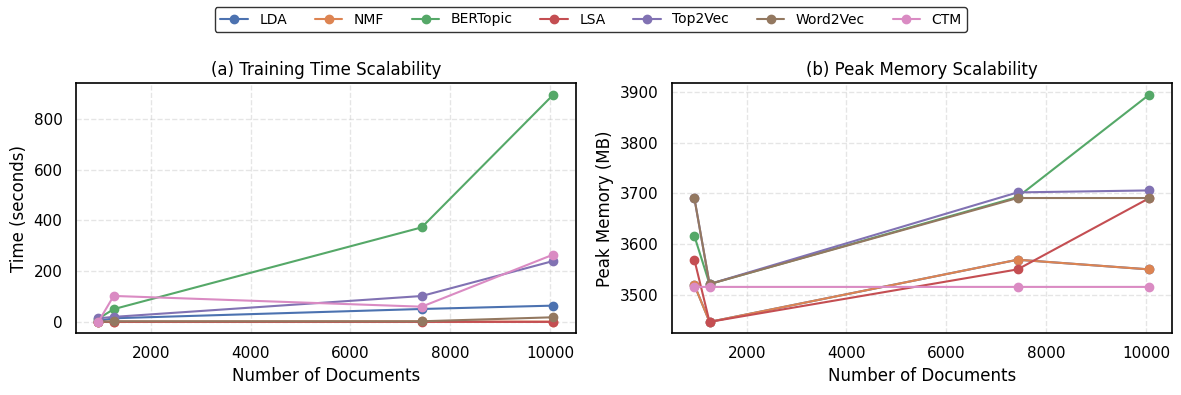

In [ ]:
import matplotlib.pyplot as plt

time_data = {
    "LDA": rearranged_lda_runtimes,
    "NMF": rearranged_nmf_runtimes,
    "BERTopic": rearranged_bert_runtimes,
    "LSA": rearranged_lsa_runtimes,
    "Top2Vec": rearranged_top2vec_runtimes,
    "Word2Vec": rearranged_word2vec_runtimes,
    "CTM": rearranged_ctm_runtimes
}

memory_data = {
  "LDA": rearranged_lda_mem,
    "NMF": rearranged_nmf_mem,
    "BERTopic": rearranged_bert_mem,
    "LSA": rearranged_lsa_mem,
    "Top2Vec": rearranged_top2vec_mem,
    "Word2Vec": rearranged_word2vec_mem,
    "CTM": rearranged_ctm_mem
}
docs=rearranged_doc_size

plt.rcParams.update({
    'text.color': 'black',        # All text
    'axes.labelcolor': 'black',   # X and Y axis labels
    'xtick.color': 'black',       # X tick labels
    'ytick.color': 'black',       # Y tick labels
    'axes.titlecolor': 'black',   # Axes titles
    'legend.edgecolor': 'black',  # Legend box
    'legend.facecolor': 'white',  # Legend background
    'legend.labelcolor': 'black'  # Legend text
})
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# (a) Training Time
for model, values in time_data.items():
    axes[0].plot(docs, values, marker="o", label=model)

axes[0].set_title("(a) Training Time Scalability")
axes[0].set_xlabel("Number of Documents")
axes[0].set_ylabel("Time (seconds)")
axes[0].grid(True, linestyle='--', alpha=0.5)

# (b) Memory Usage
for model, values in memory_data.items():
    axes[1].plot(docs, values, marker="o", label=model)

axes[1].set_title("(b) Peak Memory Scalability")
axes[1].set_xlabel("Number of Documents")
axes[1].set_ylabel("Peak Memory (MB)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# Set black plot boundaries
for ax in axes:
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.2)


# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.9])
#plt.savefig("time_memory_scalability.png", dpi=300, bbox_inches="tight")
plt.savefig("plot.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


# plt.figure(figsize=(9, 6))
# plt.plot(doc_size, rearranged_lda_runtimes, marker="o", label="LDA")
# plt.plot(doc_size, rearranged_nmf_runtimes, marker="o", label="NMF")
# plt.plot(doc_size, rearranged_bert_runtimes, marker="o", label="Bert")
# plt.plot(doc_size, rearranged_lsa_runtimes, marker="o", label="LSA")
# plt.plot(doc_size, rearranged_top2vec_runtimes, marker="o", label="top2vec")
# plt.plot(doc_size, rearranged_word2vec_runtimes, marker="o", label="word2vec")
# plt.plot(doc_size, rearranged_ctm_runtimes, marker="o", label="CTM")
# #plt.xscale("log")
# #plt.yscale("log")
# plt.xlabel("Number of Documents")
# plt.ylabel("Training Time (seconds)")
# plt.title("Scalability of Topic Models")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(9, 6))
# plt.plot(doc_size, rearranged_lda_mem, marker="o", label="LDA")
# plt.plot(doc_size, rearranged_nmf_mem, marker="o", label="NMF")
# plt.plot(doc_size, rearranged_bert_mem, marker="o", label="Bert")
# plt.plot(doc_size, rearranged_lsa_mem, marker="o", label="LSA")
# plt.plot(doc_size, rearranged_top2vec_mem, marker="o", label="top2vec")
# plt.plot(doc_size, rearranged_word2vec_mem, marker="o", label="word2vec")
# plt.plot(doc_size, rearranged_ctm_mem, marker="o", label="CTM")
# #plt.xscale("log")
# #plt.yscale("log")
# plt.xlabel("Number of Documents")
# plt.ylabel("Peak Memory (MB)")
# plt.title("Scalability of Topic Models")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

**15.3 Statistical Testing**

In [ ]:
from scipy.stats import wilcoxon

w_stat, p_value = wilcoxon(ctm_scores, word2vec_scores)

print(f"Wilcoxon signed-rank test:")
print(f"Statistic = {w_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# **Step 16:  Index both datasets and search require data using Whoosh**



**Step 16.1 Install Whoosh**


In [40]:
pip install whoosh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 8.8 MB/s eta 0:00:00


**Step 16.2**

This section of code perform following tasks :
* Imports the required libraries
* Define the Schema for Indexing
 - A schema defines the structure of the index, specifying how each field should be stored and searched
* Create and Populate the Index using RISC-V GNU Toolchain and GCC Mailing List data.
* Initialize indexing by calling functions for creating indexes

In [43]:
import os
import pandas as pd
from whoosh import index, scoring, highlight
from whoosh.fields import Schema, TEXT, ID,DATETIME,KEYWORD
from whoosh.qparser import MultifieldParser
from whoosh.index import open_dir, create_in
from whoosh.analysis import StandardAnalyzer


schema = Schema(
    commit_id=ID(stored=True),
    commit_message=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=2.0),
    author_name=TEXT(stored=True),
    author_date_time=TEXT(stored=True,sortable=True),
    branch=TEXT(stored=True),
    file_name=TEXT(stored=True),
    change_type=TEXT(stored=True),
    patch=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=5.0),
    subject=TEXT(analyzer=StandardAnalyzer(),stored=True,field_boost=2.0),
    author=TEXT(stored=True),
    date=TEXT(stored=True,sortable=True),
    patch_text=TEXT(analyzer=StandardAnalyzer(), stored=True, sortable=True,field_boost=5.0),

)

# Schema definition for the labels dataset
label_schema = Schema(
    label=TEXT(stored=True),
    occurence=TEXT(stored=True)
)
def format_datetime(date_str):

    # Assuming the input is already in the correct format: 'YYYY-MM-DD HH:MM:SS'
    return date_str

def create_index(schema, index_dir, df, df1):
    """ Create an index for the main datasets. """
    if not os.path.exists(index_dir):
        os.mkdir(index_dir)
    ix = create_in(index_dir, schema)
    writer = ix.writer()

    # Index data from df (first dataset)
    for _, row in df.iterrows():
        writer.add_document(
            commit_id=str(row['commit_id']),
            commit_message=row['commit_message'],
            author_name=row['author_name'],
            branch=row['branch'],
            file_name=row['file_name'],
            change_type=row['change_type'],
            patch=row['patch'],
            author_date_time=row['author_date_time'].strftime('%Y-%m-%d %H:%M:%S')


        )
    # Index data from df1 (second dataset)
    for _, row in df1.iterrows():
        writer.add_document(
            subject=row['subject'],
            author=row['author'],
            date=row['date'].strftime('%Y-%m-%d'),
            patch_text=row['patch_text']

        )

    writer.commit()
    print(f"Indexed {len(df) + len(df1)} documents.")

def create_label_index(label_schema, label_index_dir, df_labels):
    """ Create an index for the labels dataset. """
    if not os.path.exists(label_index_dir):
        os.mkdir(label_index_dir)
    ix = create_in(label_index_dir, label_schema)
    writer = ix.writer()

    # Index data from df_labels (third dataset)
    for _, row in labeled_df.iterrows():
        writer.add_document(
            label=row['label'],
            occurence=row['occurence']
        )

    writer.commit()

index_dir = 'whoosh_index'
label_index_dir = 'label_whoosh_index'
create_index(schema, index_dir, df, df1)
create_label_index(label_schema, label_index_dir, labeled_df)

Indexed 20304 documents.


NameError: name 'labeled_df' is not defined

**Step 16.3:  Create search and topic assignment function to search the query and assign topics to documents**

This section of code performs following tasks:
*  Imports the required Python and Whoosh libraries
* Defines Functions for Topic Assignment
 -  Function to calculate an average vector representation of a document using pre-trained Word2Vec models
 - Function to Assign Topics Based on Content (most similar words)
* Search Whoosh Index and Retrieve Documents using BM25F ranking for relevance on  basis of given query.
* Assign Labels to Partial Matches
* Filter Out documents containing Unwanted Terms



In [ ]:

from whoosh import scoring, highlight
from whoosh.qparser import MultifieldParser
from whoosh.index import open_dir
from whoosh.query import Or, And, Term
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Function to get the document vector by averaging word embeddings
def get_document_vector(text, word2vec_model):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return normalize(np.mean(word_vectors, axis=0).reshape(1, -1))
    else:
        return np.zeros((1, word2vec_model.vector_size))  # Ensure 2D array for compatibility

# Function to assign topics dynamically based on document content
def assign_topics_based_on_content(document_text, word2vec_model, num_topic_words=10):
    words = list(word2vec_model.wv.index_to_key)
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Compute document vector
    doc_vector = get_document_vector(document_text, word2vec_model)

    # Identify top N words closest to the document vector
    cosine_similarities = cosine_similarity(doc_vector, word_vectors)[0]
    top_indices = cosine_similarities.argsort()[-num_topic_words:][::-1]

    topic_words = [words[idx] for idx in top_indices]
    #print(f"Topic Words: {topic_words}")
    return topic_words  # Returns the most relevant words representing the topic

# Function to assign labels for partial matches
def assign_labels_for_partial_matches(results_combined, query_tokens, label_searcher):
    token_labels = {token: None for token in query_tokens}
    for token in query_tokens:
        label_results = label_searcher.search(Term("occurence", token), limit=None)
        if label_results:
            for label_hit in label_results:
                token_labels[token] = label_hit['label']
                break

    for result in results_combined:
        concerned_fields = ['commit_message', 'patch'] if result['source'] == 'riscv-gnu-toolchain' else ['subject', 'patch_text']
        result['labels'] = {}

        for token in query_tokens:
            token_present = any(token.lower() in result.get(field, "").lower() for field in concerned_fields)
            if token_present and token_labels[token]:
                # Weight label assignment by token relevance in fields
                relevance_score = sum(
                    result.get(field, "").lower().count(token.lower()) for field in concerned_fields
                )
                result['labels'][token] = (token_labels[token], relevance_score)

    return results_combined

# Main search function with topic assignment after retrieval and unwanted terms filtering
def search_index(query_text, index_dir, label_index_dir, word2vec_models, top_n):
    ix = open_dir(index_dir)
    label_ix = open_dir(label_index_dir)

    df_fields = ["commit_message", "patch"]
    df1_fields = ["subject", "patch_text"]

    results_df_combined = []
    results_df1_combined = []
    query_tokens = query_text.split()

    # Queries for df and df1 datasets
    combined_queries_df = Or([And([Term(field, token) for token in query_tokens]) for field in df_fields])
    combined_queries_df1 = Or([And([Term(field, token) for token in query_tokens]) for field in df1_fields])

    # Search in the main dataset (`df`)
    with ix.searcher(weighting=scoring.BM25F(B=0.3,k1=3.0)) as searcher:
        results_df = searcher.search(combined_queries_df, limit=None)
        results_df.fragmenter = highlight.ContextFragmenter(surround=1000)
        results_df.formatter = highlight.HtmlFormatter()

        seen_ids = set()
        for hit in results_df:
            commit_id = hit['commit_id']
            if commit_id in seen_ids:
                continue
            seen_ids.add(commit_id)

            # Assign topics dynamically after retrieval
            commit_message_topic = assign_topics_based_on_content(hit['commit_message'], word2vec_models['word2vec_modelcm'])
            patch_topic = assign_topics_based_on_content(hit['patch'], word2vec_models['word2vec_model'])

            relevant_document = {
                'source': 'riscv-gnu-toolchain',
                'commit_id': commit_id,
                'commit_message': hit['commit_message'],
                'commit_message_highlight': hit.highlights("commit_message", top=1),
                'author_name': hit['author_name'],
                'author_date_time': hit['author_date_time'],
                'branch': hit['branch'],
                'change_type': hit.get('change_type', 'Not available'),
                'patch': hit['patch'],
                'patch_highlight': hit.highlights("patch", top=1),
                'commit_message Topic': commit_message_topic,
                'patch Topic': patch_topic,
                'score': hit.score,
                'labels': {},
                'file_name': hit.get('file_name', 'Not available')
            }
            results_df_combined.append(relevant_document)

    # Search in the secondary dataset (`df1`)
    with ix.searcher(weighting=scoring.BM25F(B=0.3,k1=3.0)) as searcher:
        results_df1 = searcher.search(combined_queries_df1, limit=None)
        results_df1.fragmenter = highlight.ContextFragmenter(surround=1000)
        results_df1.formatter = highlight.HtmlFormatter()

        seen_patch_texts = set()
        for hit in results_df1:
            patch_text = hit.get('patch_text', None)
            if patch_text in seen_patch_texts:
                continue
            if patch_text:
                seen_patch_texts.add(patch_text)

            # Assign topics dynamically after retrieval
            subject_topic = assign_topics_based_on_content(hit['subject'], word2vec_models['word2vec_model_sub'])
            patch_text_topic = assign_topics_based_on_content(hit['patch_text'], word2vec_models['gcc_word2vec_model'])

            relevant_document = {
                'source': 'mail archive gcc riscv patches',
                'subject': hit['subject'],
                'subject_highlight': hit.highlights("subject", top=1),
                'author': hit['author'],
                'date': hit['date'],
                'patch_text': hit['patch_text'],
                'patch_text_highlight': hit.highlights("patch_text", top=1),
                'subject Topic': subject_topic,
                'patch Topic': patch_text_topic,
                'score': hit.score,
                'labels': {}
            }
            results_df1_combined.append(relevant_document)

    # Assign labels for partial matches
    with label_ix.searcher(weighting=scoring.BM25F()) as label_searcher:
        results_df_combined = assign_labels_for_partial_matches(results_df_combined, query_tokens, label_searcher)
        results_df1_combined = assign_labels_for_partial_matches(results_df1_combined, query_tokens, label_searcher)

    # Filter out unwanted terms
    unwanted_terms = [term.lower() for term in ["testsuite", "testsuites", "testcases", "test cases", "testcase"]]
    relevant_documents_df = []
    relevant_documents_df1 = []
    non_relevant_documents_df = []
    non_relevant_documents_df1 = []

    # Filter `df` results
    for doc in results_df_combined:
        combined_text = (doc.get('commit_message', '') + doc.get('patch', '')).lower()
        if any(term in combined_text for term in unwanted_terms):
            non_relevant_documents_df.append(doc)
        else:
            relevant_documents_df.append(doc)

    # Filter `df1` results
    for doc in results_df1_combined:
        combined_text = (doc.get('subject', '') + doc.get('patch_text', '')).lower()
        if any(term in combined_text for term in unwanted_terms):
            non_relevant_documents_df1.append(doc)
        else:
            relevant_documents_df1.append(doc)

    # Return results as separate lists for `df` and `df1`
    return {
        "relevant_df": relevant_documents_df[:top_n],
        "non_relevant_df": non_relevant_documents_df[:top_n],
        "relevant_df1": relevant_documents_df1[:top_n],
        "non_relevant_df1": non_relevant_documents_df1[:top_n]
    }

# Main execution
if __name__ == "__main__":
    index_dir = 'whoosh_index'
    label_index_dir = 'label_whoosh_index'

    # Load Word2Vec models (replace with actual loading of models)
    word2vec_models = {
        'word2vec_modelcm': word2vec_modelcm,
        'word2vec_model': word2vec_model,
        'gcc_word2vec_model': gcc_word2vec_model,
        'word2vec_model_sub': word2vec_model_sub
    }


**Step 16.4 : Input a query**

In [ ]:
query = "autovec vmerge"
#relevant_docs,non_relevant_docs = search_index(query, index_dir, label_index_dir,top_n=10)
results = search_index(query, index_dir, label_index_dir,word2vec_models,top_n=30)
print(results)

# **Step 17: Display(save)  data retireval results in html and text file**

In [ ]:
import re

# Function to highlight query terms in text using HTML tags
def highlight_query_terms_html(text, query_terms):
    for term in query_terms:
        # Escape special characters in the term for regex
        escaped_term = re.escape(term.lower())
        # Replace the term with a highlighted version (wrap in <mark> tag)
        text = re.sub(rf'(\b{escaped_term}\b)', r'<mark>\1</mark>', text, flags=re.IGNORECASE)
    return text

# Writing search results to an HTML file and TXT file
with open(f'search_results_{query}.html', 'w', encoding='utf-8') as html_file, \
     open(f'search_results_{query}.txt', 'w', encoding='utf-8') as txt_file:

    # Write the initial part of the HTML document
    html_file.write(f"<!DOCTYPE html>\n<html>\n<head>\n<title>Search Results for {query}</title>\n")
    html_file.write(f"<style>\n")
    html_file.write(f"    body {{ background-color: white; color: black; font-family: Arial, sans-serif; font-size: 18px; }}\n")  # Increased font size
    html_file.write(f"    mark {{ background-color: yellow; color: black; }}\n")
    html_file.write(f"    h1, h2 {{ color: #00ff00; font-size: 24px; }}\n")  # Green color for headers with bigger font size
    html_file.write(f"    p {{ font-size: 18px; }}\n")  # Increased font size for paragraphs
    html_file.write(f"</style>\n</head>\n<body>\n")
    html_file.write(f"<h1>Search Results for: {query}</h1>\n")
    html_file.write("=" * 80 + "\n")

    txt_file.write(f"Search Results for: {query}\n")
    txt_file.write("=" * 80 + "\n")

    idx = 0
    for result_item in results['relevant_df1']:  # Iterate over each dictionary in the list
        idx += 1
        html_file.write(f"<h2>Result {idx}:</h2>\n")
        txt_file.write(f"Result {idx}:\n")

        # Write the source of the dataset
        html_file.write(f"<p><strong>Source:</strong> {result_item['source']}</p>\n")
        txt_file.write(f"Source: {result_item['source']}\n")

        # Check if result_item has 'commit_id'
        if 'commit_id' in result_item:  # Check for 'commit_id' in result_item
            # Access the labels
            labels = result_item.get('labels', {})
            if labels:  # If there are labels
                labels_str = ', '.join(f"{key}: {value}" for key, value in labels.items())  # Create a string of labels
            else:
                labels_str = 'N/A'  # If no labels, set to 'N/A'

            html_file.write(f"<p><strong>Label:</strong> {labels_str}</p>\n")
            txt_file.write(f"Label: {labels_str}\n")
            html_file.write(f"<p><strong>Commit ID:</strong> {result_item['commit_id']}</p>\n")
            txt_file.write(f"Commit ID: {result_item['commit_id']}\n")
            html_file.write(f"<p><strong>Author:</strong> {result_item['author_name']}</p>\n")
            txt_file.write(f"Author: {result_item['author_name']}\n")
            html_file.write(f"<p><strong>Date:</strong> {result_item['author_date_time']}</p>\n")
            txt_file.write(f"Date: {result_item['author_date_time']}\n")
            html_file.write(f"<p><strong>Branch:</strong> {result_item['branch']}</p>\n")
            txt_file.write(f"Branch: {result_item['branch']}\n")
            html_file.write(f"<p><strong>File Name:</strong> {result_item['file_name']}</p>\n")
            txt_file.write(f"File Name: {result_item['file_name']}\n")
            html_file.write(f"<p><strong>Change Type:</strong> {result_item['change_type']}</p>\n")
            txt_file.write(f"Change Type: {result_item['change_type']}\n")

            # Highlight the commit message
            highlighted_commit_message = highlight_query_terms_html(result_item['commit_message'], query.split())
            html_file.write(f"<p><strong>Commit Message:</strong> {highlighted_commit_message}</p>\n")
            txt_file.write(f"Commit Message: {highlighted_commit_message}\n")

            # Combine commit message topic number and terms
            html_file.write(f"<p><strong>Commit Message Topic:</strong> {result_item['commit_message Topic']}</p>\n")
            txt_file.write(f"Commit Message Topic: {result_item['commit_message Topic']}\n")
            html_file.write(f"<p><strong>Patch Topic:</strong> {result_item['patch Topic']}</p>\n")
            txt_file.write(f"Patch Topic: {result_item['patch Topic']}\n")

            # Highlight the patch text
            highlighted_patch = highlight_query_terms_html(result_item['patch'], query.split())  # Highlighting the patch field
            html_file.write(f"<p><strong>Highlighted Patch:</strong><br>{highlighted_patch}</p>\n")
            txt_file.write(f"Patch Text: {highlighted_patch}\n")

        else:
            # Access the labels in the same way
            labels = result_item.get('labels', {})
            if labels:  # If there are labels
                labels_str = ', '.join(f"{key}: {value}" for key, value in labels.items())  # Create a string of labels
            else:
                labels_str = 'N/A'  # If no labels, set to 'N/A'

            html_file.write(f"<p><strong>Label:</strong> {labels_str}</p>\n")
            txt_file.write(f"Label: {labels_str}\n")
            html_file.write(f"<p><strong>Date:</strong> {result_item['date']}</p>\n")
            txt_file.write(f"Date: {result_item['date']}\n")

            # Highlight the subject

            highlighted_subject = highlight_query_terms_html(result_item['subject'], query.split())
            html_file.write(f"<p><strong>Subject:</strong> {highlighted_subject}</p>\n")
            txt_file.write(f"Subject: {highlighted_subject}\n")

            # Combine subject topic number and terms
            html_file.write(f"<p><strong>Subject Topic:</strong> {result_item['subject Topic']}</p>\n")
            txt_file.write(f"Subject Topic: {result_item['subject Topic']}\n")
            html_file.write(f"<p><strong>Patch Text Topic:</strong> {result_item['patch Topic']}</p>\n")
            txt_file.write(f"Patch Text Topic: {result_item['patch Topic']}\n")

            # Highlight the patch text
            highlighted_patch_text = highlight_query_terms_html(result_item['patch_text'], query.split())
            html_file.write(f"<p><strong>Patch Text:</strong><br>{highlighted_patch_text}</p>\n")
            txt_file.write(f"Patch Text: {highlighted_patch_text}\n")

        # Write the score
        html_file.write(f"<p><strong>Score:</strong> {result_item['score']}</p>\n")
        txt_file.write(f"Score: {result_item['score']}\n")

        html_file.write("<hr>\n")
        txt_file.write("-" * 80 + "\n")

    # Close the HTML tags
    html_file.write("</body>\n</html>\n")

